<a href="https://colab.research.google.com/github/pratikgujral/Machine-Learning-Scientist-With-Python/blob/master/Supervised_Learning_With_Scikit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Description
Machine learning is the field that teaches machines and computers to learn from existing data to make predictions on new data: Will a tumor be benign or malignant? Which of your customers will take their business elsewhere? Is a particular email spam? In this course, you'll learn how to use Python to perform supervised learning, an essential component of machine learning. You'll learn how to build predictive models, tune their parameters, and determine how well they will perform with unseen data—all while using real world datasets. You'll be using scikit-learn, one of the most popular and user-friendly machine learning libraries for Python.

# Datatsets
- [Automobile Miles Per Gallon](https://assets.datacamp.com/production/repositories/628/datasets/3781d588cf7b04b1e376c7e9dda489b3e6c7465b/auto.csv)
- [Boston Housing](https://assets.datacamp.com/production/repositories/628/datasets/021d4b9e98d0f9941e7bfc932a5787b362fafe3b/boston.csv)
- [Diabetes](https://assets.datacamp.com/production/repositories/628/datasets/444cdbf175d5fbf564b564bd36ac21740627a834/diabetes.csv)
- [Gapminder](https://assets.datacamp.com/production/repositories/628/datasets/a7e65287ebb197b1267b5042955f27502ec65f31/gm_2008_region.csv)
- [US Congressional Voting Records (1984)](https://assets.datacamp.com/production/repositories/628/datasets/35a8c54b79d559145bbeb5582de7a6169c703136/house-votes-84.csv)
- [White Wine Quality](https://assets.datacamp.com/production/repositories/628/datasets/2d9076606fb074c66420a36e06d7c7bc605459d4/white-wine.csv)
- [Red Wine Quality](https://assets.datacamp.com/production/repositories/628/datasets/013936d2700e2d00207ec42100d448c23692eb6f/winequality-red.csv)

In [107]:
!wget --no-check-certificate -q "https://assets.datacamp.com/production/repositories/628/datasets/3781d588cf7b04b1e376c7e9dda489b3e6c7465b/auto.csv" -O /tmp/auto.csv
!wget --no-check-certificate -q "https://assets.datacamp.com/production/repositories/628/datasets/021d4b9e98d0f9941e7bfc932a5787b362fafe3b/boston.csv" -O /tmp/boston.csv
!wget --no-check-certificate -q "https://assets.datacamp.com/production/repositories/628/datasets/444cdbf175d5fbf564b564bd36ac21740627a834/diabetes.csv" -O /tmp/diabetes.csv
!wget --no-check-certificate -q "https://assets.datacamp.com/production/repositories/628/datasets/a7e65287ebb197b1267b5042955f27502ec65f31/gm_2008_region.csv" -O /tmp/gm_2008_region.csv
!wget --no-check-certificate -q "https://assets.datacamp.com/production/repositories/628/datasets/35a8c54b79d559145bbeb5582de7a6169c703136/house-votes-84.csv" -O /tmp/house-votes-84.csv
!wget --no-check-certificate -q "https://assets.datacamp.com/production/repositories/628/datasets/2d9076606fb074c66420a36e06d7c7bc605459d4/white-wine.csv" -O /tmp/white-wine.csv
!wget --no-check-certificate -q "https://assets.datacamp.com/production/repositories/628/datasets/013936d2700e2d00207ec42100d448c23692eb6f/winequality-red.csv" -O /tmp/winequality-red.csv

# Part 1: Classification
[Link to slides](https://s3.amazonaws.com/assets.datacamp.com/production/course_1939/slides/chapter1.pdf)

[VIDEO](https://videos.datacamp.com/transcoded/1939_supervised_learning_w_scikit_learn/v9/hls-1939_ch1_1.master.m3u8)

## Example dataset

In [108]:
# Iris Dataset
from sklearn import datasets

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Loading the iris dataset

In [109]:
iris = datasets.load_iris()

In [110]:
# Printing datatype of iris
print("Type:", type(iris)) # Bunch (similar to a dictionary and has key-value pairs)

# Printing the keys
print(iris.keys())

Type: <class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [111]:
# Printing the shape
iris.data.shape

(150, 4)

So we have 150 rows and 4 columns. This is same as saying we have 150 **samples** and 4 **features**. These 4 features are petal length and width, and sepal length and width.

Seeing the class encodings of the target variable...

In [112]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

This means that our target variable would have

- `0` denoting `setosa`
- `1` denoting `versicolor`
- `2` denoting `virginica`

Exploratory Data Analysis (EDA) on dataset

In [113]:
X = iris.data
y = iris.target

In [114]:
df = pd.DataFrame(data=X, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Making a scatter-matrix to have a quick visual EDA

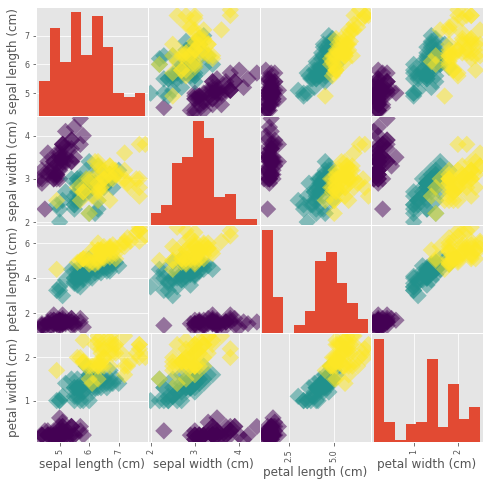

In [115]:
_ = pd.plotting.scatter_matrix(df, c=y, figsize=[8,8], marker='D', s=150) # 'c' parameter is for color. This ensures different color for different species.

There is a lot of information in the scatter matrix. 
The diagonal elements represent the **histograms** and the non-diagonal elements represent **scatter plots** colored by the target variable. 

Note for example, from the scatter plot between `petal length (cm)` and `petal width (cm)` we can observe that the these two features are highly correlated.

---

## Exploratory Data Analysis
[VIDEO](https://videos.datacamp.com/transcoded/1939_supervised_learning_w_scikit_learn/v9/hls-1939_ch1_2.master.m3u8)

## Numerical EDA
In this chapter, you'll be working with a dataset obtained from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records) consisting of votes made by US House of Representatives Congressmen. Your goal will be to predict their party affiliation ('Democrat' or 'Republican') based on how they voted on certain key issues. Here, it's worth noting that we have preprocessed this dataset to deal with missing values. This is so that your focus can be directed towards understanding how to train and evaluate supervised learning models. Once you have mastered these fundamentals, you will be introduced to preprocessing techniques in Chapter 4 and have the chance to apply them there yourself - including on this very same dataset!

In [116]:
df = {'party': {0: 'republican', 1: 'republican', 2: 'democrat', 3: 'democrat', 4: 'democrat', 5: 'democrat', 6: 'democrat', 7: 'republican', 8: 'republican', 9: 'democrat', 10: 'republican', 11: 'republican', 12: 'democrat', 13: 'democrat', 14: 'republican', 15: 'republican', 16: 'democrat', 17: 'democrat', 18: 'republican', 19: 'democrat', 20: 'democrat', 21: 'democrat', 22: 'democrat', 23: 'democrat', 24: 'democrat', 25: 'democrat', 26: 'democrat', 27: 'democrat', 28: 'republican', 29: 'democrat', 30: 'republican', 31: 'democrat', 32: 'democrat', 33: 'republican', 34: 'democrat', 35: 'republican', 36: 'republican', 37: 'republican', 38: 'republican', 39: 'democrat', 40: 'democrat', 41: 'democrat', 42: 'democrat', 43: 'democrat', 44: 'democrat', 45: 'democrat', 46: 'democrat', 47: 'democrat', 48: 'democrat', 49: 'republican', 50: 'democrat', 51: 'republican', 52: 'democrat', 53: 'republican', 54: 'democrat', 55: 'republican', 56: 'republican', 57: 'republican', 58: 'republican', 59: 'republican', 60: 'democrat', 61: 'republican', 62: 'democrat', 63: 'democrat', 64: 'democrat', 65: 'republican', 66: 'republican', 67: 'republican', 68: 'democrat', 69: 'democrat', 70: 'democrat', 71: 'republican', 72: 'democrat', 73: 'republican', 74: 'democrat', 75: 'democrat', 76: 'democrat', 77: 'democrat', 78: 'democrat', 79: 'republican', 80: 'democrat', 81: 'democrat', 82: 'republican', 83: 'republican', 84: 'republican', 85: 'democrat', 86: 'republican', 87: 'republican', 88: 'democrat', 89: 'republican', 90: 'democrat', 91: 'democrat', 92: 'democrat', 93: 'democrat', 94: 'democrat', 95: 'democrat', 96: 'democrat', 97: 'democrat', 98: 'democrat', 99: 'republican', 100: 'democrat', 101: 'democrat', 102: 'democrat', 103: 'democrat', 104: 'democrat', 105: 'democrat', 106: 'republican', 107: 'republican', 108: 'democrat', 109: 'democrat', 110: 'democrat', 111: 'republican', 112: 'democrat', 113: 'republican', 114: 'democrat', 115: 'democrat', 116: 'democrat', 117: 'republican', 118: 'democrat', 119: 'republican', 120: 'republican', 121: 'republican', 122: 'republican', 123: 'republican', 124: 'democrat', 125: 'republican', 126: 'republican', 127: 'democrat', 128: 'democrat', 129: 'democrat', 130: 'democrat', 131: 'democrat', 132: 'republican', 133: 'republican', 134: 'republican', 135: 'republican', 136: 'republican', 137: 'democrat', 138: 'democrat', 139: 'democrat', 140: 'republican', 141: 'republican', 142: 'republican', 143: 'democrat', 144: 'democrat', 145: 'democrat', 146: 'republican', 147: 'democrat', 148: 'republican', 149: 'democrat', 150: 'republican', 151: 'democrat', 152: 'democrat', 153: 'democrat', 154: 'republican', 155: 'republican', 156: 'republican', 157: 'democrat', 158: 'republican', 159: 'democrat', 160: 'democrat', 161: 'democrat', 162: 'democrat', 163: 'republican', 164: 'democrat', 165: 'democrat', 166: 'republican', 167: 'republican', 168: 'democrat', 169: 'democrat', 170: 'democrat', 171: 'republican', 172: 'democrat', 173: 'democrat', 174: 'democrat', 175: 'democrat', 176: 'republican', 177: 'democrat', 178: 'democrat', 179: 'democrat', 180: 'democrat', 181: 'democrat', 182: 'democrat', 183: 'democrat', 184: 'democrat', 185: 'democrat', 186: 'democrat', 187: 'democrat', 188: 'republican', 189: 'democrat', 190: 'republican', 191: 'republican', 192: 'democrat', 193: 'democrat', 194: 'democrat', 195: 'republican', 196: 'democrat', 197: 'republican', 198: 'democrat', 199: 'democrat', 200: 'democrat', 201: 'democrat', 202: 'democrat', 203: 'democrat', 204: 'republican', 205: 'democrat', 206: 'republican', 207: 'republican', 208: 'democrat', 209: 'democrat', 210: 'democrat', 211: 'republican', 212: 'democrat', 213: 'democrat', 214: 'republican', 215: 'democrat', 216: 'democrat', 217: 'republican', 218: 'democrat', 219: 'democrat', 220: 'democrat', 221: 'democrat', 222: 'democrat', 223: 'republican', 224: 'republican', 225: 'republican', 226: 'democrat', 227: 'democrat', 228: 'republican', 229: 'republican', 230: 'republican', 231: 'republican', 232: 'democrat', 233: 'republican', 234: 'democrat', 235: 'republican', 236: 'democrat', 237: 'democrat', 238: 'democrat', 239: 'republican', 240: 'republican', 241: 'democrat', 242: 'republican', 243: 'democrat', 244: 'democrat', 245: 'democrat', 246: 'democrat', 247: 'republican', 248: 'republican', 249: 'democrat', 250: 'republican', 251: 'republican', 252: 'democrat', 253: 'republican', 254: 'democrat', 255: 'democrat', 256: 'republican', 257: 'republican', 258: 'democrat', 259: 'democrat', 260: 'democrat', 261: 'democrat', 262: 'democrat', 263: 'democrat', 264: 'democrat', 265: 'democrat', 266: 'republican', 267: 'republican', 268: 'democrat', 269: 'democrat', 270: 'democrat', 271: 'democrat', 272: 'democrat', 273: 'republican', 274: 'republican', 275: 'democrat', 276: 'republican', 277: 'republican', 278: 'republican', 279: 'republican', 280: 'democrat', 281: 'republican', 282: 'republican', 283: 'republican', 284: 'democrat', 285: 'democrat', 286: 'democrat', 287: 'democrat', 288: 'democrat', 289: 'democrat', 290: 'democrat', 291: 'democrat', 292: 'democrat', 293: 'democrat', 294: 'democrat', 295: 'republican', 296: 'republican', 297: 'democrat', 298: 'democrat', 299: 'democrat', 300: 'republican', 301: 'democrat', 302: 'republican', 303: 'republican', 304: 'republican', 305: 'republican', 306: 'republican', 307: 'democrat', 308: 'republican', 309: 'democrat', 310: 'republican', 311: 'democrat', 312: 'democrat', 313: 'republican', 314: 'republican', 315: 'republican', 316: 'democrat', 317: 'democrat', 318: 'democrat', 319: 'democrat', 320: 'democrat', 321: 'democrat', 322: 'democrat', 323: 'democrat', 324: 'republican', 325: 'democrat', 326: 'democrat', 327: 'republican', 328: 'democrat', 329: 'democrat', 330: 'republican', 331: 'democrat', 332: 'democrat', 333: 'democrat', 334: 'democrat', 335: 'republican', 336: 'democrat', 337: 'democrat', 338: 'democrat', 339: 'republican', 340: 'republican', 341: 'democrat', 342: 'democrat', 343: 'republican', 344: 'democrat', 345: 'republican', 346: 'republican', 347: 'republican', 348: 'democrat', 349: 'republican', 350: 'democrat', 351: 'republican', 352: 'democrat', 353: 'republican', 354: 'democrat', 355: 'republican', 356: 'republican', 357: 'republican', 358: 'democrat', 359: 'republican', 360: 'democrat', 361: 'democrat', 362: 'democrat', 363: 'republican', 364: 'republican', 365: 'democrat', 366: 'democrat', 367: 'democrat', 368: 'democrat', 369: 'republican', 370: 'democrat', 371: 'democrat', 372: 'democrat', 373: 'democrat', 374: 'republican', 375: 'democrat', 376: 'democrat', 377: 'republican', 378: 'republican', 379: 'republican', 380: 'democrat', 381: 'democrat', 382: 'democrat', 383: 'democrat', 384: 'democrat', 385: 'democrat', 386: 'democrat', 387: 'democrat', 388: 'democrat', 389: 'democrat', 390: 'democrat', 391: 'democrat', 392: 'republican', 393: 'republican', 394: 'democrat', 395: 'democrat', 396: 'democrat', 397: 'democrat', 398: 'democrat', 399: 'republican', 400: 'republican', 401: 'republican', 402: 'republican', 403: 'republican', 404: 'republican', 405: 'republican', 406: 'democrat', 407: 'democrat', 408: 'democrat', 409: 'republican', 410: 'republican', 411: 'democrat', 412: 'republican', 413: 'republican', 414: 'democrat', 415: 'democrat', 416: 'republican', 417: 'democrat', 418: 'democrat', 419: 'democrat', 420: 'republican', 421: 'democrat', 422: 'democrat', 423: 'democrat', 424: 'democrat', 425: 'democrat', 426: 'democrat', 427: 'republican', 428: 'democrat', 429: 'democrat', 430: 'republican', 431: 'democrat', 432: 'republican', 433: 'republican', 434: 'republican'}, 'infants': {0: 0, 1: 0, 2: 0, 3: 0, 4: 1, 5: 0, 6: 0, 7: 0, 8: 0, 9: 1, 10: 0, 11: 0, 12: 0, 13: 1, 14: 0, 15: 0, 16: 1, 17: 1, 18: 0, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 0, 31: 1, 32: 1, 33: 0, 34: 1, 35: 0, 36: 1, 37: 1, 38: 0, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 0, 50: 1, 51: 0, 52: 1, 53: 1, 54: 1, 55: 0, 56: 0, 57: 0, 58: 0, 59: 0, 60: 1, 61: 0, 62: 1, 63: 1, 64: 1, 65: 1, 66: 0, 67: 0, 68: 1, 69: 1, 70: 1, 71: 1, 72: 1, 73: 1, 74: 1, 75: 0, 76: 0, 77: 0, 78: 1, 79: 0, 80: 1, 81: 1, 82: 0, 83: 0, 84: 0, 85: 0, 86: 0, 87: 0, 88: 0, 89: 0, 90: 1, 91: 1, 92: 1, 93: 1, 94: 1, 95: 1, 96: 0, 97: 1, 98: 1, 99: 0, 100: 1, 101: 1, 102: 1, 103: 1, 104: 0, 105: 1, 106: 0, 107: 0, 108: 1, 109: 1, 110: 0, 111: 0, 112: 0, 113: 0, 114: 1, 115: 0, 116: 1, 117: 1, 118: 0, 119: 0, 120: 0, 121: 0, 122: 0, 123: 1, 124: 0, 125: 0, 126: 0, 127: 0, 128: 0, 129: 0, 130: 1, 131: 0, 132: 0, 133: 0, 134: 0, 135: 0, 136: 0, 137: 0, 138: 0, 139: 1, 140: 0, 141: 0, 142: 0, 143: 0, 144: 0, 145: 0, 146: 0, 147: 0, 148: 0, 149: 0, 150: 1, 151: 1, 152: 0, 153: 0, 154: 0, 155: 1, 156: 1, 157: 0, 158: 0, 159: 0, 160: 0, 161: 0, 162: 0, 163: 0, 164: 1, 165: 0, 166: 1, 167: 1, 168: 0, 169: 1, 170: 1, 171: 0, 172: 0, 173: 0, 174: 1, 175: 0, 176: 0, 177: 0, 178: 0, 179: 1, 180: 0, 181: 0, 182: 1, 183: 0, 184: 0, 185: 1, 186: 0, 187: 1, 188: 1, 189: 1, 190: 0, 191: 0, 192: 0, 193: 0, 194: 0, 195: 0, 196: 0, 197: 0, 198: 0, 199: 1, 200: 0, 201: 1, 202: 1, 203: 1, 204: 0, 205: 0, 206: 0, 207: 1, 208: 0, 209: 1, 210: 0, 211: 0, 212: 0, 213: 0, 214: 1, 215: 0, 216: 1, 217: 0, 218: 1, 219: 0, 220: 0, 221: 0, 222: 1, 223: 0, 224: 0, 225: 0, 226: 0, 227: 1, 228: 0, 229: 0, 230: 0, 231: 0, 232: 0, 233: 0, 234: 0, 235: 0, 236: 0, 237: 1, 238: 1, 239: 0, 240: 0, 241: 1, 242: 0, 243: 0, 244: 1, 245: 1, 246: 0, 247: 0, 248: 0, 249: 1, 250: 0, 251: 0, 252: 1, 253: 0, 254: 1, 255: 1, 256: 0, 257: 0, 258: 0, 259: 1, 260: 1, 261: 1, 262: 1, 263: 1, 264: 1, 265: 1, 266: 0, 267: 1, 268: 1, 269: 1, 270: 1, 271: 0, 272: 1, 273: 0, 274: 1, 275: 0, 276: 0, 277: 0, 278: 0, 279: 0, 280: 0, 281: 1, 282: 1, 283: 0, 284: 0, 285: 0, 286: 0, 287: 1, 288: 1, 289: 1, 290: 1, 291: 1, 292: 1, 293: 1, 294: 0, 295: 0, 296: 0, 297: 1, 298: 0, 299: 0, 300: 0, 301: 0, 302: 0, 303: 0, 304: 0, 305: 0, 306: 0, 307: 1, 308: 0, 309: 1, 310: 0, 311: 0, 312: 1, 313: 0, 314: 0, 315: 0, 316: 0, 317: 1, 318: 0, 319: 1, 320: 0, 321: 1, 322: 1, 323: 1, 324: 0, 325: 0, 326: 1, 327: 0, 328: 1, 329: 1, 330: 0, 331: 1, 332: 1, 333: 0, 334: 0, 335: 0, 336: 0, 337: 1, 338: 1, 339: 1, 340: 0, 341: 0, 342: 0, 343: 0, 344: 0, 345: 0, 346: 0, 347: 1, 348: 1, 349: 0, 350: 0, 351: 0, 352: 0, 353: 0, 354: 0, 355: 1, 356: 0, 357: 0, 358: 1, 359: 0, 360: 1, 361: 1, 362: 1, 363: 1, 364: 1, 365: 0, 366: 1, 367: 1, 368: 0, 369: 0, 370: 1, 371: 1, 372: 0, 373: 0, 374: 0, 375: 0, 376: 1, 377: 0, 378: 0, 379: 0, 380: 1, 381: 1, 382: 1, 383: 1, 384: 1, 385: 1, 386: 0, 387: 1, 388: 0, 389: 1, 390: 0, 391: 1, 392: 1, 393: 0, 394: 1, 395: 1, 396: 1, 397: 1, 398: 0, 399: 0, 400: 0, 401: 0, 402: 0, 403: 0, 404: 1, 405: 0, 406: 1, 407: 0, 408: 1, 409: 0, 410: 0, 411: 1, 412: 0, 413: 1, 414: 1, 415: 0, 416: 1, 417: 1, 418: 1, 419: 1, 420: 1, 421: 0, 422: 0, 423: 0, 424: 0, 425: 0, 426: 1, 427: 0, 428: 0, 429: 1, 430: 0, 431: 0, 432: 0, 433: 0, 434: 0}, 'water': {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 0, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 0, 25: 0, 26: 0, 27: 1, 28: 0, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 0, 40: 1, 41: 1, 42: 0, 43: 0, 44: 1, 45: 1, 46: 1, 47: 0, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 1, 63: 1, 64: 1, 65: 1, 66: 1, 67: 1, 68: 1, 69: 1, 70: 0, 71: 1, 72: 1, 73: 0, 74: 0, 75: 1, 76: 1, 77: 1, 78: 1, 79: 0, 80: 0, 81: 0, 82: 0, 83: 0, 84: 1, 85: 0, 86: 0, 87: 0, 88: 1, 89: 0, 90: 0, 91: 0, 92: 1, 93: 0, 94: 0, 95: 0, 96: 0, 97: 0, 98: 1, 99: 0, 100: 0, 101: 0, 102: 0, 103: 0, 104: 1, 105: 1, 106: 1, 107: 1, 108: 1, 109: 1, 110: 0, 111: 1, 112: 1, 113: 1, 114: 1, 115: 1, 116: 0, 117: 1, 118: 1, 119: 0, 120: 1, 121: 1, 122: 0, 123: 1, 124: 1, 125: 1, 126: 1, 127: 1, 128: 1, 129: 1, 130: 1, 131: 0, 132: 0, 133: 0, 134: 0, 135: 0, 136: 1, 137: 1, 138: 0, 139: 0, 140: 0, 141: 0, 142: 0, 143: 1, 144: 1, 145: 0, 146: 1, 147: 0, 148: 1, 149: 0, 150: 1, 151: 1, 152: 1, 153: 0, 154: 1, 155: 1, 156: 1, 157: 1, 158: 1, 159: 1, 160: 1, 161: 0, 162: 1, 163: 1, 164: 1, 165: 1, 166: 0, 167: 0, 168: 0, 169: 0, 170: 0, 171: 1, 172: 1, 173: 0, 174: 1, 175: 1, 176: 0, 177: 0, 178: 0, 179: 0, 180: 1, 181: 0, 182: 1, 183: 1, 184: 0, 185: 0, 186: 1, 187: 0, 188: 1, 189: 0, 190: 1, 191: 1, 192: 0, 193: 0, 194: 0, 195: 0, 196: 0, 197: 1, 198: 0, 199: 1, 200: 0, 201: 1, 202: 0, 203: 0, 204: 0, 205: 0, 206: 0, 207: 1, 208: 0, 209: 1, 210: 0, 211: 1, 212: 0, 213: 1, 214: 1, 215: 1, 216: 1, 217: 1, 218: 1, 219: 1, 220: 0, 221: 1, 222: 0, 223: 0, 224: 1, 225: 1, 226: 0, 227: 0, 228: 1, 229: 1, 230: 1, 231: 1, 232: 1, 233: 1, 234: 0, 235: 0, 236: 0, 237: 0, 238: 1, 239: 0, 240: 0, 241: 0, 242: 0, 243: 1, 244: 0, 245: 0, 246: 0, 247: 1, 248: 1, 249: 0, 250: 1, 251: 1, 252: 1, 253: 1, 254: 0, 255: 0, 256: 0, 257: 0, 258: 0, 259: 0, 260: 0, 261: 0, 262: 0, 263: 0, 264: 0, 265: 0, 266: 0, 267: 0, 268: 0, 269: 0, 270: 1, 271: 1, 272: 0, 273: 0, 274: 0, 275: 0, 276: 0, 277: 0, 278: 0, 279: 0, 280: 0, 281: 0, 282: 0, 283: 0, 284: 0, 285: 0, 286: 0, 287: 1, 288: 1, 289: 1, 290: 0, 291: 0, 292: 0, 293: 1, 294: 1, 295: 1, 296: 0, 297: 1, 298: 1, 299: 1, 300: 0, 301: 0, 302: 0, 303: 0, 304: 1, 305: 0, 306: 0, 307: 0, 308: 0, 309: 0, 310: 0, 311: 0, 312: 1, 313: 1, 314: 1, 315: 1, 316: 0, 317: 0, 318: 0, 319: 0, 320: 1, 321: 1, 322: 1, 323: 1, 324: 1, 325: 1, 326: 1, 327: 1, 328: 1, 329: 1, 330: 1, 331: 1, 332: 0, 333: 0, 334: 1, 335: 0, 336: 0, 337: 0, 338: 0, 339: 0, 340: 0, 341: 1, 342: 1, 343: 0, 344: 0, 345: 0, 346: 0, 347: 0, 348: 0, 349: 1, 350: 1, 351: 0, 352: 1, 353: 0, 354: 1, 355: 0, 356: 0, 357: 0, 358: 1, 359: 0, 360: 0, 361: 0, 362: 1, 363: 1, 364: 1, 365: 1, 366: 0, 367: 1, 368: 1, 369: 1, 370: 1, 371: 1, 372: 1, 373: 1, 374: 1, 375: 1, 376: 1, 377: 1, 378: 0, 379: 0, 380: 1, 381: 1, 382: 1, 383: 1, 384: 1, 385: 1, 386: 1, 387: 1, 388: 1, 389: 0, 390: 1, 391: 1, 392: 1, 393: 1, 394: 1, 395: 1, 396: 1, 397: 1, 398: 1, 399: 1, 400: 1, 401: 1, 402: 0, 403: 1, 404: 1, 405: 0, 406: 0, 407: 0, 408: 0, 409: 0, 410: 0, 411: 0, 412: 0, 413: 1, 414: 1, 415: 1, 416: 1, 417: 1, 418: 1, 419: 1, 420: 1, 421: 1, 422: 0, 423: 1, 424: 1, 425: 0, 426: 0, 427: 0, 428: 1, 429: 0, 430: 0, 431: 0, 432: 1, 433: 0, 434: 1}, 'budget': {0: 0, 1: 0, 2: 1, 3: 1, 4: 1, 5: 1, 6: 0, 7: 0, 8: 0, 9: 1, 10: 0, 11: 0, 12: 1, 13: 1, 14: 0, 15: 0, 16: 1, 17: 1, 18: 0, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 0, 29: 1, 30: 0, 31: 1, 32: 1, 33: 0, 34: 1, 35: 0, 36: 0, 37: 0, 38: 0, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 0, 50: 1, 51: 0, 52: 1, 53: 0, 54: 1, 55: 0, 56: 0, 57: 0, 58: 0, 59: 0, 60: 1, 61: 0, 62: 1, 63: 1, 64: 1, 65: 0, 66: 0, 67: 0, 68: 1, 69: 1, 70: 1, 71: 1, 72: 1, 73: 1, 74: 1, 75: 1, 76: 1, 77: 1, 78: 1, 79: 0, 80: 1, 81: 1, 82: 0, 83: 0, 84: 0, 85: 1, 86: 0, 87: 0, 88: 1, 89: 0, 90: 1, 91: 1, 92: 1, 93: 1, 94: 1, 95: 1, 96: 1, 97: 0, 98: 1, 99: 0, 100: 0, 101: 1, 102: 1, 103: 0, 104: 1, 105: 1, 106: 0, 107: 1, 108: 1, 109: 1, 110: 1, 111: 0, 112: 1, 113: 0, 114: 1, 115: 1, 116: 1, 117: 1, 118: 1, 119: 0, 120: 1, 121: 0, 122: 0, 123: 0, 124: 1, 125: 0, 126: 0, 127: 1, 128: 1, 129: 1, 130: 1, 131: 1, 132: 0, 133: 0, 134: 0, 135: 0, 136: 0, 137: 1, 138: 1, 139: 1, 140: 0, 141: 0, 142: 0, 143: 0, 144: 0, 145: 1, 146: 0, 147: 0, 148: 0, 149: 1, 150: 0, 151: 1, 152: 1, 153: 1, 154: 0, 155: 0, 156: 0, 157: 1, 158: 0, 159: 1, 160: 0, 161: 0, 162: 1, 163: 0, 164: 0, 165: 1, 166: 1, 167: 1, 168: 1, 169: 1, 170: 1, 171: 0, 172: 1, 173: 0, 174: 1, 175: 1, 176: 1, 177: 1, 178: 1, 179: 1, 180: 1, 181: 1, 182: 1, 183: 1, 184: 1, 185: 1, 186: 1, 187: 1, 188: 0, 189: 1, 190: 0, 191: 0, 192: 0, 193: 1, 194: 1, 195: 0, 196: 1, 197: 1, 198: 1, 199: 0, 200: 1, 201: 1, 202: 1, 203: 1, 204: 1, 205: 1, 206: 0, 207: 0, 208: 1, 209: 1, 210: 1, 211: 0, 212: 1, 213: 1, 214: 0, 215: 1, 216: 1, 217: 0, 218: 1, 219: 1, 220: 1, 221: 1, 222: 1, 223: 0, 224: 0, 225: 0, 226: 1, 227: 1, 228: 0, 229: 1, 230: 0, 231: 0, 232: 1, 233: 0, 234: 1, 235: 0, 236: 1, 237: 1, 238: 1, 239: 0, 240: 0, 241: 1, 242: 0, 243: 1, 244: 1, 245: 1, 246: 1, 247: 0, 248: 1, 249: 1, 250: 0, 251: 0, 252: 1, 253: 0, 254: 1, 255: 1, 256: 0, 257: 0, 258: 1, 259: 1, 260: 1, 261: 1, 262: 1, 263: 1, 264: 1, 265: 1, 266: 0, 267: 0, 268: 1, 269: 1, 270: 1, 271: 1, 272: 1, 273: 0, 274: 0, 275: 1, 276: 0, 277: 1, 278: 0, 279: 0, 280: 1, 281: 1, 282: 0, 283: 0, 284: 1, 285: 1, 286: 1, 287: 1, 288: 1, 289: 1, 290: 1, 291: 1, 292: 1, 293: 1, 294: 1, 295: 0, 296: 1, 297: 1, 298: 0, 299: 1, 300: 0, 301: 1, 302: 0, 303: 0, 304: 0, 305: 0, 306: 0, 307: 1, 308: 0, 309: 0, 310: 0, 311: 1, 312: 1, 313: 1, 314: 0, 315: 1, 316: 0, 317: 0, 318: 1, 319: 1, 320: 1, 321: 1, 322: 1, 323: 1, 324: 0, 325: 0, 326: 0, 327: 0, 328: 1, 329: 1, 330: 0, 331: 1, 332: 1, 333: 1, 334: 1, 335: 0, 336: 1, 337: 1, 338: 1, 339: 0, 340: 0, 341: 1, 342: 1, 343: 0, 344: 1, 345: 0, 346: 0, 347: 0, 348: 1, 349: 1, 350: 0, 351: 1, 352: 0, 353: 1, 354: 1, 355: 1, 356: 0, 357: 0, 358: 1, 359: 0, 360: 1, 361: 1, 362: 1, 363: 0, 364: 0, 365: 0, 366: 1, 367: 1, 368: 1, 369: 0, 370: 1, 371: 1, 372: 1, 373: 1, 374: 0, 375: 0, 376: 1, 377: 0, 378: 0, 379: 0, 380: 1, 381: 1, 382: 0, 383: 1, 384: 1, 385: 0, 386: 1, 387: 1, 388: 1, 389: 1, 390: 0, 391: 0, 392: 0, 393: 1, 394: 1, 395: 1, 396: 1, 397: 0, 398: 1, 399: 0, 400: 0, 401: 0, 402: 1, 403: 0, 404: 0, 405: 0, 406: 1, 407: 0, 408: 1, 409: 0, 410: 0, 411: 1, 412: 0, 413: 1, 414: 1, 415: 1, 416: 0, 417: 1, 418: 1, 419: 1, 420: 1, 421: 1, 422: 1, 423: 1, 424: 1, 425: 1, 426: 1, 427: 0, 428: 1, 429: 1, 430: 1, 431: 1, 432: 0, 433: 0, 434: 0}, 'physician': {0: 1, 1: 1, 2: 0, 3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1, 9: 0, 10: 1, 11: 1, 12: 0, 13: 0, 14: 1, 15: 1, 16: 0, 17: 0, 18: 1, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 1, 29: 0, 30: 1, 31: 0, 32: 0, 33: 1, 34: 0, 35: 1, 36: 1, 37: 1, 38: 1, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 1, 50: 0, 51: 1, 52: 0, 53: 1, 54: 0, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 0, 61: 1, 62: 0, 63: 0, 64: 0, 65: 1, 66: 1, 67: 1, 68: 0, 69: 0, 70: 0, 71: 1, 72: 0, 73: 1, 74: 0, 75: 1, 76: 0, 77: 1, 78: 0, 79: 1, 80: 0, 81: 0, 82: 1, 83: 1, 84: 1, 85: 0, 86: 1, 87: 1, 88: 0, 89: 1, 90: 0, 91: 0, 92: 0, 93: 0, 94: 0, 95: 0, 96: 0, 97: 0, 98: 0, 99: 1, 100: 0, 101: 0, 102: 0, 103: 0, 104: 0, 105: 0, 106: 1, 107: 0, 108: 0, 109: 0, 110: 0, 111: 1, 112: 0, 113: 1, 114: 0, 115: 0, 116: 0, 117: 1, 118: 0, 119: 1, 120: 1, 121: 1, 122: 1, 123: 1, 124: 0, 125: 1, 126: 1, 127: 0, 128: 0, 129: 0, 130: 0, 131: 0, 132: 1, 133: 1, 134: 1, 135: 1, 136: 1, 137: 0, 138: 0, 139: 0, 140: 1, 141: 1, 142: 1, 143: 0, 144: 0, 145: 0, 146: 1, 147: 0, 148: 1, 149: 0, 150: 1, 151: 1, 152: 0, 153: 0, 154: 1, 155: 1, 156: 1, 157: 0, 158: 1, 159: 0, 160: 0, 161: 0, 162: 0, 163: 1, 164: 0, 165: 0, 166: 1, 167: 1, 168: 1, 169: 0, 170: 0, 171: 1, 172: 0, 173: 0, 174: 0, 175: 0, 176: 1, 177: 0, 178: 0, 179: 0, 180: 0, 181: 0, 182: 0, 183: 0, 184: 0, 185: 0, 186: 0, 187: 0, 188: 1, 189: 0, 190: 1, 191: 1, 192: 0, 193: 0, 194: 0, 195: 1, 196: 0, 197: 1, 198: 0, 199: 0, 200: 0, 201: 0, 202: 0, 203: 0, 204: 1, 205: 0, 206: 1, 207: 1, 208: 0, 209: 0, 210: 0, 211: 1, 212: 0, 213: 0, 214: 1, 215: 1, 216: 0, 217: 1, 218: 0, 219: 0, 220: 0, 221: 0, 222: 0, 223: 1, 224: 1, 225: 1, 226: 0, 227: 0, 228: 1, 229: 1, 230: 1, 231: 1, 232: 0, 233: 1, 234: 0, 235: 1, 236: 0, 237: 0, 238: 0, 239: 1, 240: 1, 241: 0, 242: 0, 243: 0, 244: 0, 245: 0, 246: 0, 247: 1, 248: 0, 249: 0, 250: 1, 251: 1, 252: 0, 253: 1, 254: 0, 255: 0, 256: 1, 257: 1, 258: 0, 259: 0, 260: 0, 261: 0, 262: 0, 263: 0, 264: 0, 265: 0, 266: 1, 267: 0, 268: 0, 269: 0, 270: 0, 271: 0, 272: 0, 273: 1, 274: 1, 275: 0, 276: 1, 277: 1, 278: 1, 279: 1, 280: 0, 281: 1, 282: 1, 283: 1, 284: 0, 285: 0, 286: 0, 287: 0, 288: 0, 289: 0, 290: 0, 291: 0, 292: 0, 293: 0, 294: 0, 295: 1, 296: 1, 297: 0, 298: 0, 299: 0, 300: 1, 301: 0, 302: 1, 303: 1, 304: 1, 305: 1, 306: 1, 307: 0, 308: 1, 309: 0, 310: 1, 311: 0, 312: 0, 313: 1, 314: 1, 315: 1, 316: 0, 317: 0, 318: 0, 319: 0, 320: 0, 321: 0, 322: 0, 323: 0, 324: 1, 325: 0, 326: 1, 327: 1, 328: 0, 329: 0, 330: 1, 331: 0, 332: 0, 333: 0, 334: 0, 335: 1, 336: 0, 337: 0, 338: 0, 339: 1, 340: 1, 341: 0, 342: 0, 343: 1, 344: 0, 345: 1, 346: 1, 347: 1, 348: 0, 349: 1, 350: 0, 351: 1, 352: 1, 353: 1, 354: 0, 355: 1, 356: 1, 357: 1, 358: 0, 359: 1, 360: 0, 361: 0, 362: 0, 363: 1, 364: 1, 365: 0, 366: 0, 367: 0, 368: 0, 369: 1, 370: 0, 371: 0, 372: 1, 373: 0, 374: 1, 375: 1, 376: 0, 377: 1, 378: 1, 379: 1, 380: 0, 381: 0, 382: 1, 383: 0, 384: 1, 385: 0, 386: 0, 387: 0, 388: 1, 389: 0, 390: 0, 391: 0, 392: 1, 393: 0, 394: 0, 395: 0, 396: 0, 397: 0, 398: 0, 399: 1, 400: 1, 401: 1, 402: 1, 403: 1, 404: 1, 405: 1, 406: 0, 407: 1, 408: 0, 409: 1, 410: 1, 411: 0, 412: 1, 413: 1, 414: 0, 415: 0, 416: 1, 417: 0, 418: 0, 419: 0, 420: 1, 421: 0, 422: 0, 423: 0, 424: 0, 425: 0, 426: 0, 427: 1, 428: 0, 429: 0, 430: 1, 431: 0, 432: 1, 433: 1, 434: 1}, 'salvador': {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 0, 10: 1, 11: 1, 12: 0, 13: 0, 14: 1, 15: 1, 16: 0, 17: 0, 18: 1, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 1, 29: 0, 30: 1, 31: 0, 32: 0, 33: 1, 34: 0, 35: 1, 36: 1, 37: 1, 38: 1, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 1, 50: 0, 51: 1, 52: 0, 53: 1, 54: 0, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 0, 61: 1, 62: 0, 63: 0, 64: 0, 65: 1, 66: 1, 67: 1, 68: 0, 69: 0, 70: 0, 71: 0, 72: 0, 73: 1, 74: 0, 75: 1, 76: 1, 77: 1, 78: 1, 79: 1, 80: 0, 81: 0, 82: 1, 83: 1, 84: 1, 85: 1, 86: 1, 87: 1, 88: 1, 89: 1, 90: 0, 91: 0, 92: 0, 93: 0, 94: 1, 95: 1, 96: 1, 97: 1, 98: 0, 99: 1, 100: 1, 101: 1, 102: 1, 103: 1, 104: 0, 105: 0, 106: 1, 107: 1, 108: 0, 109: 0, 110: 0, 111: 1, 112: 0, 113: 1, 114: 0, 115: 1, 116: 0, 117: 1, 118: 0, 119: 1, 120: 1, 121: 1, 122: 1, 123: 1, 124: 0, 125: 1, 126: 1, 127: 0, 128: 0, 129: 0, 130: 1, 131: 0, 132: 1, 133: 1, 134: 1, 135: 1, 136: 1, 137: 0, 138: 0, 139: 0, 140: 0, 141: 1, 142: 1, 143: 0, 144: 0, 145: 0, 146: 1, 147: 0, 148: 1, 149: 0, 150: 1, 151: 1, 152: 0, 153: 0, 154: 1, 155: 1, 156: 1, 157: 0, 158: 1, 159: 1, 160: 1, 161: 1, 162: 1, 163: 1, 164: 1, 165: 0, 166: 1, 167: 1, 168: 1, 169: 0, 170: 0, 171: 1, 172: 0, 173: 1, 174: 0, 175: 0, 176: 0, 177: 0, 178: 0, 179: 0, 180: 0, 181: 0, 182: 0, 183: 1, 184: 0, 185: 0, 186: 0, 187: 0, 188: 1, 189: 0, 190: 1, 191: 1, 192: 0, 193: 0, 194: 0, 195: 1, 196: 0, 197: 1, 198: 0, 199: 0, 200: 0, 201: 0, 202: 0, 203: 0, 204: 1, 205: 0, 206: 1, 207: 1, 208: 0, 209: 0, 210: 0, 211: 1, 212: 0, 213: 0, 214: 1, 215: 1, 216: 1, 217: 1, 218: 0, 219: 0, 220: 0, 221: 1, 222: 0, 223: 1, 224: 1, 225: 1, 226: 0, 227: 0, 228: 1, 229: 1, 230: 1, 231: 1, 232: 0, 233: 1, 234: 0, 235: 1, 236: 0, 237: 0, 238: 0, 239: 1, 240: 0, 241: 0, 242: 1, 243: 0, 244: 0, 245: 0, 246: 1, 247: 1, 248: 1, 249: 0, 250: 1, 251: 1, 252: 0, 253: 1, 254: 0, 255: 0, 256: 1, 257: 1, 258: 0, 259: 0, 260: 0, 261: 0, 262: 0, 263: 0, 264: 0, 265: 0, 266: 1, 267: 0, 268: 0, 269: 0, 270: 0, 271: 0, 272: 0, 273: 1, 274: 1, 275: 1, 276: 1, 277: 1, 278: 1, 279: 1, 280: 0, 281: 1, 282: 1, 283: 1, 284: 0, 285: 0, 286: 0, 287: 0, 288: 1, 289: 1, 290: 1, 291: 0, 292: 0, 293: 0, 294: 0, 295: 1, 296: 1, 297: 0, 298: 0, 299: 0, 300: 1, 301: 0, 302: 1, 303: 1, 304: 1, 305: 1, 306: 1, 307: 0, 308: 1, 309: 0, 310: 1, 311: 0, 312: 0, 313: 1, 314: 1, 315: 1, 316: 0, 317: 0, 318: 0, 319: 0, 320: 0, 321: 0, 322: 1, 323: 1, 324: 1, 325: 1, 326: 0, 327: 1, 328: 0, 329: 0, 330: 1, 331: 0, 332: 0, 333: 0, 334: 0, 335: 1, 336: 0, 337: 0, 338: 0, 339: 1, 340: 1, 341: 0, 342: 1, 343: 1, 344: 0, 345: 1, 346: 1, 347: 1, 348: 0, 349: 1, 350: 0, 351: 1, 352: 0, 353: 1, 354: 0, 355: 0, 356: 1, 357: 1, 358: 0, 359: 1, 360: 0, 361: 1, 362: 0, 363: 1, 364: 1, 365: 1, 366: 0, 367: 1, 368: 0, 369: 1, 370: 1, 371: 1, 372: 1, 373: 1, 374: 1, 375: 1, 376: 0, 377: 1, 378: 1, 379: 1, 380: 0, 381: 1, 382: 1, 383: 1, 384: 1, 385: 1, 386: 1, 387: 1, 388: 1, 389: 0, 390: 1, 391: 0, 392: 1, 393: 0, 394: 1, 395: 0, 396: 1, 397: 1, 398: 1, 399: 1, 400: 1, 401: 1, 402: 0, 403: 1, 404: 1, 405: 1, 406: 1, 407: 1, 408: 0, 409: 1, 410: 1, 411: 0, 412: 1, 413: 1, 414: 0, 415: 0, 416: 1, 417: 0, 418: 0, 419: 0, 420: 1, 421: 1, 422: 0, 423: 0, 424: 0, 425: 0, 426: 0, 427: 1, 428: 0, 429: 1, 430: 1, 431: 0, 432: 1, 433: 1, 434: 1}, 'religious': {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 0, 10: 0, 11: 1, 12: 0, 13: 1, 14: 1, 15: 1, 16: 1, 17: 0, 18: 1, 19: 0, 20: 1, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 1, 31: 0, 32: 0, 33: 1, 34: 0, 35: 1, 36: 1, 37: 1, 38: 1, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 1, 50: 0, 51: 1, 52: 0, 53: 1, 54: 1, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 0, 63: 0, 64: 0, 65: 1, 66: 1, 67: 1, 68: 0, 69: 0, 70: 0, 71: 0, 72: 0, 73: 0, 74: 1, 75: 1, 76: 1, 77: 1, 78: 1, 79: 0, 80: 1, 81: 0, 82: 1, 83: 1, 84: 1, 85: 1, 86: 1, 87: 1, 88: 1, 89: 1, 90: 0, 91: 0, 92: 0, 93: 0, 94: 1, 95: 1, 96: 1, 97: 1, 98: 1, 99: 1, 100: 1, 101: 1, 102: 1, 103: 1, 104: 1, 105: 0, 106: 1, 107: 1, 108: 0, 109: 0, 110: 0, 111: 1, 112: 1, 113: 1, 114: 0, 115: 1, 116: 0, 117: 0, 118: 0, 119: 1, 120: 1, 121: 1, 122: 1, 123: 1, 124: 0, 125: 1, 126: 1, 127: 0, 128: 1, 129: 0, 130: 1, 131: 1, 132: 1, 133: 1, 134: 1, 135: 1, 136: 1, 137: 1, 138: 1, 139: 1, 140: 0, 141: 1, 142: 1, 143: 0, 144: 1, 145: 1, 146: 1, 147: 0, 148: 1, 149: 0, 150: 1, 151: 1, 152: 1, 153: 1, 154: 1, 155: 1, 156: 1, 157: 1, 158: 1, 159: 1, 160: 1, 161: 1, 162: 1, 163: 1, 164: 1, 165: 1, 166: 1, 167: 1, 168: 1, 169: 0, 170: 0, 171: 1, 172: 0, 173: 1, 174: 0, 175: 0, 176: 0, 177: 0, 178: 0, 179: 0, 180: 0, 181: 0, 182: 0, 183: 1, 184: 0, 185: 0, 186: 0, 187: 0, 188: 1, 189: 0, 190: 1, 191: 1, 192: 1, 193: 0, 194: 1, 195: 1, 196: 1, 197: 1, 198: 0, 199: 0, 200: 0, 201: 0, 202: 1, 203: 0, 204: 1, 205: 1, 206: 1, 207: 1, 208: 0, 209: 0, 210: 1, 211: 1, 212: 0, 213: 1, 214: 1, 215: 1, 216: 1, 217: 1, 218: 0, 219: 0, 220: 0, 221: 1, 222: 0, 223: 0, 224: 1, 225: 1, 226: 1, 227: 0, 228: 1, 229: 1, 230: 1, 231: 1, 232: 0, 233: 1, 234: 1, 235: 1, 236: 0, 237: 1, 238: 0, 239: 1, 240: 1, 241: 0, 242: 1, 243: 0, 244: 0, 245: 0, 246: 0, 247: 1, 248: 1, 249: 0, 250: 1, 251: 1, 252: 1, 253: 1, 254: 0, 255: 0, 256: 0, 257: 0, 258: 0, 259: 0, 260: 0, 261: 1, 262: 0, 263: 0, 264: 0, 265: 0, 266: 1, 267: 0, 268: 0, 269: 0, 270: 0, 271: 1, 272: 0, 273: 0, 274: 0, 275: 1, 276: 1, 277: 1, 278: 1, 279: 1, 280: 0, 281: 1, 282: 1, 283: 1, 284: 1, 285: 1, 286: 1, 287: 1, 288: 1, 289: 1, 290: 1, 291: 1, 292: 1, 293: 1, 294: 1, 295: 1, 296: 1, 297: 1, 298: 0, 299: 1, 300: 0, 301: 1, 302: 1, 303: 1, 304: 1, 305: 1, 306: 1, 307: 1, 308: 1, 309: 1, 310: 1, 311: 1, 312: 0, 313: 1, 314: 1, 315: 1, 316: 1, 317: 0, 318: 0, 319: 0, 320: 1, 321: 0, 322: 1, 323: 1, 324: 1, 325: 1, 326: 0, 327: 1, 328: 0, 329: 1, 330: 1, 331: 0, 332: 0, 333: 0, 334: 1, 335: 1, 336: 1, 337: 0, 338: 0, 339: 1, 340: 1, 341: 1, 342: 1, 343: 0, 344: 0, 345: 1, 346: 1, 347: 1, 348: 0, 349: 1, 350: 1, 351: 1, 352: 1, 353: 1, 354: 1, 355: 0, 356: 1, 357: 1, 358: 1, 359: 1, 360: 1, 361: 1, 362: 1, 363: 1, 364: 1, 365: 1, 366: 0, 367: 1, 368: 1, 369: 1, 370: 1, 371: 0, 372: 1, 373: 1, 374: 1, 375: 1, 376: 0, 377: 1, 378: 1, 379: 1, 380: 1, 381: 1, 382: 1, 383: 1, 384: 1, 385: 1, 386: 1, 387: 1, 388: 1, 389: 0, 390: 1, 391: 0, 392: 1, 393: 1, 394: 1, 395: 0, 396: 1, 397: 1, 398: 1, 399: 1, 400: 1, 401: 1, 402: 1, 403: 1, 404: 1, 405: 1, 406: 1, 407: 1, 408: 1, 409: 1, 410: 1, 411: 1, 412: 1, 413: 1, 414: 0, 415: 1, 416: 1, 417: 0, 418: 0, 419: 0, 420: 1, 421: 1, 422: 1, 423: 1, 424: 1, 425: 0, 426: 0, 427: 1, 428: 0, 429: 0, 430: 1, 431: 0, 432: 1, 433: 1, 434: 1}, 'satellite': {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 1, 10: 0, 11: 0, 12: 1, 13: 1, 14: 0, 15: 0, 16: 0, 17: 1, 18: 0, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 0, 31: 1, 32: 1, 33: 0, 34: 1, 35: 0, 36: 0, 37: 0, 38: 0, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 0, 50: 1, 51: 0, 52: 1, 53: 0, 54: 1, 55: 0, 56: 0, 57: 0, 58: 0, 59: 0, 60: 1, 61: 0, 62: 1, 63: 1, 64: 1, 65: 1, 66: 1, 67: 0, 68: 1, 69: 1, 70: 1, 71: 1, 72: 1, 73: 1, 74: 1, 75: 0, 76: 0, 77: 0, 78: 0, 79: 0, 80: 1, 81: 1, 82: 0, 83: 0, 84: 0, 85: 0, 86: 0, 87: 0, 88: 1, 89: 0, 90: 1, 91: 1, 92: 1, 93: 1, 94: 0, 95: 0, 96: 0, 97: 1, 98: 1, 99: 0, 100: 0, 101: 1, 102: 1, 103: 1, 104: 1, 105: 0, 106: 0, 107: 1, 108: 1, 109: 1, 110: 1, 111: 0, 112: 1, 113: 0, 114: 1, 115: 1, 116: 1, 117: 1, 118: 0, 119: 0, 120: 0, 121: 0, 122: 0, 123: 0, 124: 1, 125: 0, 126: 0, 127: 1, 128: 0, 129: 1, 130: 1, 131: 0, 132: 0, 133: 0, 134: 0, 135: 0, 136: 0, 137: 1, 138: 1, 139: 1, 140: 1, 141: 1, 142: 1, 143: 1, 144: 1, 145: 1, 146: 0, 147: 1, 148: 0, 149: 1, 150: 0, 151: 0, 152: 0, 153: 1, 154: 0, 155: 0, 156: 1, 157: 0, 158: 0, 159: 1, 160: 0, 161: 1, 162: 1, 163: 1, 164: 0, 165: 1, 166: 1, 167: 1, 168: 0, 169: 1, 170: 1, 171: 0, 172: 1, 173: 0, 174: 1, 175: 1, 176: 1, 177: 1, 178: 1, 179: 1, 180: 1, 181: 1, 182: 1, 183: 1, 184: 1, 185: 1, 186: 1, 187: 1, 188: 1, 189: 1, 190: 0, 191: 0, 192: 1, 193: 1, 194: 1, 195: 0, 196: 1, 197: 0, 198: 1, 199: 1, 200: 1, 201: 1, 202: 1, 203: 1, 204: 1, 205: 1, 206: 0, 207: 1, 208: 1, 209: 1, 210: 1, 211: 0, 212: 1, 213: 0, 214: 0, 215: 0, 216: 0, 217: 0, 218: 1, 219: 0, 220: 1, 221: 0, 222: 1, 223: 0, 224: 0, 225: 0, 226: 1, 227: 1, 228: 0, 229: 1, 230: 0, 231: 0, 232: 1, 233: 0, 234: 1, 235: 0, 236: 1, 237: 1, 238: 1, 239: 1, 240: 1, 241: 1, 242: 1, 243: 1, 244: 0, 245: 1, 246: 1, 247: 1, 248: 1, 249: 1, 250: 0, 251: 0, 252: 1, 253: 0, 254: 1, 255: 1, 256: 0, 257: 0, 258: 1, 259: 1, 260: 1, 261: 1, 262: 1, 263: 1, 264: 1, 265: 1, 266: 0, 267: 1, 268: 1, 269: 1, 270: 1, 271: 1, 272: 1, 273: 1, 274: 1, 275: 0, 276: 0, 277: 1, 278: 0, 279: 0, 280: 1, 281: 1, 282: 0, 283: 0, 284: 1, 285: 1, 286: 1, 287: 1, 288: 0, 289: 0, 290: 1, 291: 1, 292: 1, 293: 1, 294: 1, 295: 1, 296: 0, 297: 1, 298: 1, 299: 1, 300: 1, 301: 1, 302: 1, 303: 0, 304: 0, 305: 0, 306: 0, 307: 1, 308: 0, 309: 1, 310: 0, 311: 1, 312: 1, 313: 0, 314: 1, 315: 1, 316: 0, 317: 1, 318: 1, 319: 1, 320: 0, 321: 1, 322: 0, 323: 0, 324: 0, 325: 0, 326: 1, 327: 0, 328: 1, 329: 1, 330: 0, 331: 1, 332: 1, 333: 1, 334: 1, 335: 0, 336: 1, 337: 1, 338: 1, 339: 0, 340: 0, 341: 1, 342: 1, 343: 1, 344: 1, 345: 1, 346: 0, 347: 0, 348: 1, 349: 1, 350: 1, 351: 1, 352: 1, 353: 1, 354: 1, 355: 0, 356: 0, 357: 0, 358: 1, 359: 0, 360: 1, 361: 1, 362: 1, 363: 0, 364: 0, 365: 0, 366: 1, 367: 1, 368: 1, 369: 0, 370: 1, 371: 1, 372: 0, 373: 0, 374: 0, 375: 0, 376: 1, 377: 1, 378: 0, 379: 0, 380: 1, 381: 1, 382: 0, 383: 0, 384: 0, 385: 0, 386: 0, 387: 0, 388: 0, 389: 1, 390: 1, 391: 0, 392: 0, 393: 0, 394: 0, 395: 0, 396: 0, 397: 0, 398: 0, 399: 0, 400: 0, 401: 0, 402: 1, 403: 0, 404: 0, 405: 0, 406: 0, 407: 0, 408: 1, 409: 0, 410: 0, 411: 1, 412: 0, 413: 1, 414: 1, 415: 1, 416: 0, 417: 1, 418: 1, 419: 1, 420: 1, 421: 1, 422: 1, 423: 1, 424: 1, 425: 1, 426: 1, 427: 1, 428: 1, 429: 1, 430: 0, 431: 1, 432: 0, 433: 1, 434: 0}, 'aid': {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 1, 10: 0, 11: 0, 12: 1, 13: 1, 14: 0, 15: 0, 16: 1, 17: 1, 18: 0, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 0, 31: 1, 32: 1, 33: 0, 34: 1, 35: 0, 36: 0, 37: 0, 38: 0, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 0, 50: 1, 51: 1, 52: 1, 53: 0, 54: 1, 55: 0, 56: 0, 57: 0, 58: 0, 59: 0, 60: 1, 61: 0, 62: 1, 63: 1, 64: 1, 65: 0, 66: 0, 67: 0, 68: 1, 69: 1, 70: 1, 71: 1, 72: 1, 73: 0, 74: 1, 75: 0, 76: 0, 77: 1, 78: 0, 79: 0, 80: 1, 81: 1, 82: 0, 83: 0, 84: 0, 85: 0, 86: 0, 87: 0, 88: 0, 89: 0, 90: 1, 91: 1, 92: 1, 93: 0, 94: 0, 95: 1, 96: 0, 97: 0, 98: 1, 99: 0, 100: 0, 101: 0, 102: 0, 103: 0, 104: 1, 105: 1, 106: 0, 107: 1, 108: 1, 109: 1, 110: 1, 111: 0, 112: 1, 113: 0, 114: 1, 115: 1, 116: 1, 117: 0, 118: 1, 119: 0, 120: 0, 121: 0, 122: 0, 123: 1, 124: 1, 125: 0, 126: 0, 127: 1, 128: 1, 129: 1, 130: 1, 131: 1, 132: 0, 133: 0, 134: 0, 135: 0, 136: 0, 137: 1, 138: 1, 139: 1, 140: 1, 141: 1, 142: 1, 143: 1, 144: 1, 145: 1, 146: 0, 147: 1, 148: 0, 149: 1, 150: 0, 151: 0, 152: 1, 153: 1, 154: 0, 155: 1, 156: 0, 157: 1, 158: 0, 159: 1, 160: 0, 161: 0, 162: 0, 163: 0, 164: 0, 165: 1, 166: 1, 167: 1, 168: 0, 169: 1, 170: 1, 171: 0, 172: 1, 173: 0, 174: 1, 175: 1, 176: 1, 177: 1, 178: 1, 179: 1, 180: 1, 181: 1, 182: 1, 183: 1, 184: 1, 185: 1, 186: 1, 187: 1, 188: 1, 189: 1, 190: 0, 191: 1, 192: 1, 193: 1, 194: 1, 195: 0, 196: 1, 197: 0, 198: 1, 199: 1, 200: 1, 201: 1, 202: 1, 203: 1, 204: 0, 205: 1, 206: 0, 207: 0, 208: 1, 209: 1, 210: 1, 211: 0, 212: 1, 213: 1, 214: 0, 215: 0, 216: 0, 217: 0, 218: 1, 219: 1, 220: 1, 221: 0, 222: 1, 223: 0, 224: 0, 225: 0, 226: 1, 227: 1, 228: 0, 229: 0, 230: 0, 231: 0, 232: 1, 233: 0, 234: 1, 235: 0, 236: 1, 237: 1, 238: 1, 239: 0, 240: 1, 241: 1, 242: 0, 243: 1, 244: 1, 245: 1, 246: 1, 247: 0, 248: 1, 249: 1, 250: 0, 251: 0, 252: 1, 253: 0, 254: 1, 255: 1, 256: 0, 257: 0, 258: 1, 259: 1, 260: 1, 261: 1, 262: 1, 263: 1, 264: 1, 265: 1, 266: 0, 267: 1, 268: 1, 269: 1, 270: 1, 271: 1, 272: 1, 273: 1, 274: 0, 275: 0, 276: 0, 277: 1, 278: 0, 279: 0, 280: 1, 281: 1, 282: 0, 283: 0, 284: 1, 285: 1, 286: 1, 287: 1, 288: 1, 289: 1, 290: 1, 291: 1, 292: 1, 293: 1, 294: 1, 295: 1, 296: 0, 297: 1, 298: 1, 299: 1, 300: 1, 301: 1, 302: 0, 303: 0, 304: 0, 305: 0, 306: 0, 307: 1, 308: 0, 309: 1, 310: 0, 311: 1, 312: 1, 313: 0, 314: 1, 315: 1, 316: 1, 317: 1, 318: 1, 319: 1, 320: 1, 321: 1, 322: 1, 323: 1, 324: 0, 325: 0, 326: 1, 327: 0, 328: 1, 329: 1, 330: 0, 331: 1, 332: 1, 333: 1, 334: 1, 335: 0, 336: 1, 337: 1, 338: 1, 339: 0, 340: 0, 341: 1, 342: 0, 343: 0, 344: 1, 345: 0, 346: 0, 347: 0, 348: 1, 349: 1, 350: 0, 351: 1, 352: 1, 353: 0, 354: 1, 355: 1, 356: 0, 357: 0, 358: 1, 359: 0, 360: 1, 361: 0, 362: 1, 363: 0, 364: 0, 365: 0, 366: 1, 367: 1, 368: 1, 369: 0, 370: 1, 371: 1, 372: 0, 373: 1, 374: 0, 375: 0, 376: 1, 377: 1, 378: 0, 379: 0, 380: 1, 381: 1, 382: 0, 383: 1, 384: 0, 385: 0, 386: 1, 387: 1, 388: 0, 389: 1, 390: 0, 391: 1, 392: 0, 393: 1, 394: 0, 395: 1, 396: 1, 397: 0, 398: 1, 399: 0, 400: 1, 401: 0, 402: 1, 403: 0, 404: 0, 405: 0, 406: 0, 407: 0, 408: 1, 409: 0, 410: 0, 411: 1, 412: 0, 413: 1, 414: 1, 415: 1, 416: 0, 417: 1, 418: 1, 419: 1, 420: 1, 421: 1, 422: 1, 423: 1, 424: 1, 425: 1, 426: 1, 427: 1, 428: 1, 429: 1, 430: 0, 431: 1, 432: 0, 433: 1, 434: 0}, 'missile': {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 1, 10: 0, 11: 0, 12: 1, 13: 1, 14: 0, 15: 0, 16: 1, 17: 1, 18: 0, 19: 1, 20: 0, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 0, 31: 1, 32: 1, 33: 0, 34: 1, 35: 0, 36: 0, 37: 0, 38: 0, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 0, 49: 0, 50: 1, 51: 0, 52: 1, 53: 0, 54: 0, 55: 0, 56: 0, 57: 0, 58: 0, 59: 0, 60: 1, 61: 0, 62: 1, 63: 1, 64: 1, 65: 0, 66: 0, 67: 0, 68: 1, 69: 1, 70: 1, 71: 1, 72: 1, 73: 1, 74: 1, 75: 0, 76: 0, 77: 1, 78: 0, 79: 0, 80: 1, 81: 1, 82: 0, 83: 0, 84: 0, 85: 0, 86: 0, 87: 0, 88: 1, 89: 0, 90: 1, 91: 1, 92: 0, 93: 1, 94: 0, 95: 1, 96: 0, 97: 0, 98: 1, 99: 0, 100: 0, 101: 0, 102: 1, 103: 1, 104: 1, 105: 1, 106: 0, 107: 1, 108: 1, 109: 1, 110: 1, 111: 0, 112: 0, 113: 0, 114: 1, 115: 1, 116: 1, 117: 0, 118: 1, 119: 0, 120: 0, 121: 0, 122: 0, 123: 0, 124: 1, 125: 0, 126: 0, 127: 1, 128: 0, 129: 1, 130: 1, 131: 1, 132: 0, 133: 0, 134: 0, 135: 0, 136: 0, 137: 1, 138: 1, 139: 1, 140: 1, 141: 1, 142: 1, 143: 1, 144: 1, 145: 1, 146: 0, 147: 1, 148: 0, 149: 1, 150: 0, 151: 1, 152: 1, 153: 1, 154: 0, 155: 0, 156: 0, 157: 1, 158: 0, 159: 1, 160: 0, 161: 0, 162: 0, 163: 0, 164: 0, 165: 1, 166: 0, 167: 0, 168: 1, 169: 1, 170: 1, 171: 0, 172: 1, 173: 0, 174: 1, 175: 1, 176: 1, 177: 1, 178: 1, 179: 1, 180: 1, 181: 1, 182: 1, 183: 1, 184: 1, 185: 1, 186: 1, 187: 1, 188: 0, 189: 1, 190: 0, 191: 0, 192: 1, 193: 1, 194: 1, 195: 0, 196: 1, 197: 0, 198: 1, 199: 1, 200: 1, 201: 1, 202: 1, 203: 1, 204: 0, 205: 1, 206: 0, 207: 0, 208: 1, 209: 1, 210: 1, 211: 0, 212: 1, 213: 1, 214: 0, 215: 0, 216: 1, 217: 0, 218: 1, 219: 1, 220: 1, 221: 0, 222: 1, 223: 0, 224: 0, 225: 0, 226: 1, 227: 1, 228: 0, 229: 1, 230: 0, 231: 1, 232: 0, 233: 0, 234: 1, 235: 0, 236: 1, 237: 0, 238: 1, 239: 0, 240: 1, 241: 1, 242: 0, 243: 1, 244: 1, 245: 1, 246: 1, 247: 0, 248: 1, 249: 1, 250: 0, 251: 0, 252: 1, 253: 0, 254: 1, 255: 1, 256: 0, 257: 0, 258: 1, 259: 1, 260: 1, 261: 1, 262: 1, 263: 1, 264: 1, 265: 1, 266: 0, 267: 1, 268: 1, 269: 1, 270: 1, 271: 1, 272: 1, 273: 0, 274: 0, 275: 0, 276: 0, 277: 0, 278: 0, 279: 0, 280: 1, 281: 0, 282: 0, 283: 0, 284: 1, 285: 1, 286: 1, 287: 1, 288: 0, 289: 0, 290: 1, 291: 1, 292: 0, 293: 1, 294: 0, 295: 0, 296: 0, 297: 1, 298: 1, 299: 1, 300: 1, 301: 1, 302: 0, 303: 0, 304: 0, 305: 0, 306: 0, 307: 1, 308: 0, 309: 1, 310: 0, 311: 1, 312: 1, 313: 0, 314: 0, 315: 0, 316: 1, 317: 1, 318: 1, 319: 1, 320: 1, 321: 1, 322: 0, 323: 1, 324: 0, 325: 1, 326: 1, 327: 0, 328: 1, 329: 1, 330: 0, 331: 1, 332: 1, 333: 1, 334: 1, 335: 0, 336: 0, 337: 1, 338: 1, 339: 0, 340: 0, 341: 1, 342: 0, 343: 1, 344: 1, 345: 0, 346: 0, 347: 0, 348: 1, 349: 1, 350: 1, 351: 1, 352: 1, 353: 0, 354: 1, 355: 1, 356: 0, 357: 0, 358: 1, 359: 0, 360: 1, 361: 1, 362: 1, 363: 0, 364: 0, 365: 0, 366: 0, 367: 0, 368: 0, 369: 0, 370: 0, 371: 1, 372: 0, 373: 0, 374: 0, 375: 0, 376: 1, 377: 0, 378: 0, 379: 0, 380: 1, 381: 1, 382: 0, 383: 1, 384: 0, 385: 0, 386: 0, 387: 1, 388: 0, 389: 1, 390: 0, 391: 1, 392: 0, 393: 1, 394: 0, 395: 0, 396: 0, 397: 0, 398: 0, 399: 0, 400: 0, 401: 0, 402: 1, 403: 0, 404: 0, 405: 0, 406: 1, 407: 0, 408: 1, 409: 0, 410: 0, 411: 1, 412: 0, 413: 0, 414: 1, 415: 1, 416: 0, 417: 1, 418: 0, 419: 1, 420: 0, 421: 0, 422: 1, 423: 1, 424: 1, 425: 0, 426: 1, 427: 0, 428: 1, 429: 1, 430: 1, 431: 1, 432: 0, 433: 1, 434: 0}, 'immigration': {0: 1, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 1, 14: 0, 15: 1, 16: 1, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 1, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 1, 33: 0, 34: 0, 35: 0, 36: 1, 37: 0, 38: 1, 39: 1, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 0, 50: 0, 51: 0, 52: 0, 53: 1, 54: 0, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 0, 62: 0, 63: 0, 64: 0, 65: 0, 66: 0, 67: 1, 68: 0, 69: 0, 70: 0, 71: 1, 72: 0, 73: 1, 74: 1, 75: 1, 76: 1, 77: 1, 78: 1, 79: 1, 80: 1, 81: 1, 82: 1, 83: 0, 84: 1, 85: 1, 86: 1, 87: 0, 88: 1, 89: 1, 90: 1, 91: 1, 92: 1, 93: 1, 94: 0, 95: 0, 96: 0, 97: 1, 98: 1, 99: 1, 100: 0, 101: 0, 102: 0, 103: 0, 104: 1, 105: 0, 106: 0, 107: 1, 108: 0, 109: 0, 110: 1, 111: 1, 112: 1, 113: 1, 114: 0, 115: 1, 116: 0, 117: 0, 118: 1, 119: 0, 120: 1, 121: 1, 122: 1, 123: 0, 124: 0, 125: 1, 126: 0, 127: 1, 128: 1, 129: 0, 130: 0, 131: 1, 132: 1, 133: 1, 134: 0, 135: 1, 136: 1, 137: 1, 138: 1, 139: 0, 140: 1, 141: 1, 142: 1, 143: 1, 144: 1, 145: 1, 146: 0, 147: 1, 148: 1, 149: 1, 150: 1, 151: 0, 152: 1, 153: 1, 154: 0, 155: 0, 156: 0, 157: 0, 158: 1, 159: 1, 160: 0, 161: 0, 162: 0, 163: 0, 164: 1, 165: 1, 166: 1, 167: 1, 168: 0, 169: 1, 170: 1, 171: 1, 172: 1, 173: 1, 174: 0, 175: 1, 176: 1, 177: 1, 178: 1, 179: 1, 180: 1, 181: 1, 182: 0, 183: 1, 184: 1, 185: 1, 186: 1, 187: 0, 188: 0, 189: 0, 190: 0, 191: 1, 192: 0, 193: 0, 194: 1, 195: 0, 196: 0, 197: 1, 198: 1, 199: 0, 200: 0, 201: 0, 202: 1, 203: 1, 204: 0, 205: 1, 206: 1, 207: 1, 208: 0, 209: 1, 210: 0, 211: 1, 212: 0, 213: 0, 214: 1, 215: 1, 216: 1, 217: 1, 218: 0, 219: 0, 220: 0, 221: 0, 222: 0, 223: 0, 224: 1, 225: 0, 226: 0, 227: 0, 228: 0, 229: 1, 230: 0, 231: 1, 232: 0, 233: 1, 234: 1, 235: 1, 236: 0, 237: 0, 238: 1, 239: 1, 240: 0, 241: 1, 242: 0, 243: 1, 244: 1, 245: 1, 246: 0, 247: 0, 248: 1, 249: 0, 250: 0, 251: 0, 252: 0, 253: 0, 254: 1, 255: 1, 256: 0, 257: 0, 258: 0, 259: 0, 260: 1, 261: 0, 262: 1, 263: 0, 264: 0, 265: 1, 266: 1, 267: 1, 268: 0, 269: 0, 270: 0, 271: 0, 272: 1, 273: 1, 274: 1, 275: 0, 276: 0, 277: 1, 278: 0, 279: 1, 280: 1, 281: 0, 282: 1, 283: 0, 284: 1, 285: 1, 286: 1, 287: 0, 288: 1, 289: 1, 290: 1, 291: 1, 292: 1, 293: 1, 294: 1, 295: 1, 296: 1, 297: 1, 298: 1, 299: 1, 300: 1, 301: 0, 302: 1, 303: 0, 304: 1, 305: 1, 306: 0, 307: 0, 308: 1, 309: 1, 310: 1, 311: 1, 312: 1, 313: 1, 314: 0, 315: 0, 316: 0, 317: 1, 318: 0, 319: 0, 320: 1, 321: 1, 322: 0, 323: 1, 324: 0, 325: 0, 326: 0, 327: 0, 328: 0, 329: 1, 330: 1, 331: 0, 332: 0, 333: 0, 334: 0, 335: 1, 336: 0, 337: 0, 338: 1, 339: 0, 340: 1, 341: 1, 342: 1, 343: 1, 344: 1, 345: 1, 346: 1, 347: 1, 348: 1, 349: 0, 350: 0, 351: 1, 352: 0, 353: 1, 354: 1, 355: 1, 356: 0, 357: 0, 358: 1, 359: 1, 360: 1, 361: 1, 362: 1, 363: 1, 364: 0, 365: 1, 366: 1, 367: 1, 368: 1, 369: 0, 370: 1, 371: 1, 372: 0, 373: 1, 374: 0, 375: 0, 376: 0, 377: 0, 378: 0, 379: 0, 380: 0, 381: 1, 382: 0, 383: 1, 384: 0, 385: 0, 386: 0, 387: 0, 388: 0, 389: 1, 390: 0, 391: 0, 392: 0, 393: 0, 394: 0, 395: 0, 396: 0, 397: 0, 398: 0, 399: 1, 400: 0, 401: 1, 402: 1, 403: 1, 404: 1, 405: 0, 406: 1, 407: 0, 408: 0, 409: 0, 410: 0, 411: 1, 412: 1, 413: 1, 414: 0, 415: 1, 416: 1, 417: 1, 418: 1, 419: 0, 420: 1, 421: 0, 422: 0, 423: 0, 424: 1, 425: 1, 426: 1, 427: 1, 428: 1, 429: 1, 430: 1, 431: 1, 432: 0, 433: 1, 434: 1}, 'synfuels': {0: 0, 1: 0, 2: 1, 3: 1, 4: 1, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 1, 12: 0, 13: 1, 14: 0, 15: 0, 16: 1, 17: 0, 18: 0, 19: 1, 20: 1, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 1, 27: 1, 28: 0, 29: 1, 30: 0, 31: 1, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 1, 40: 0, 41: 0, 42: 0, 43: 0, 44: 1, 45: 1, 46: 0, 47: 0, 48: 0, 49: 0, 50: 1, 51: 0, 52: 0, 53: 0, 54: 1, 55: 1, 56: 1, 57: 0, 58: 0, 59: 0, 60: 0, 61: 0, 62: 0, 63: 1, 64: 1, 65: 0, 66: 1, 67: 0, 68: 0, 69: 0, 70: 0, 71: 1, 72: 1, 73: 0, 74: 1, 75: 1, 76: 1, 77: 1, 78: 1, 79: 0, 80: 0, 81: 1, 82: 0, 83: 0, 84: 0, 85: 1, 86: 0, 87: 0, 88: 1, 89: 0, 90: 0, 91: 1, 92: 1, 93: 1, 94: 0, 95: 1, 96: 1, 97: 1, 98: 0, 99: 0, 100: 1, 101: 1, 102: 1, 103: 0, 104: 0, 105: 1, 106: 0, 107: 0, 108: 0, 109: 0, 110: 0, 111: 0, 112: 0, 113: 0, 114: 0, 115: 0, 116: 1, 117: 0, 118: 1, 119: 0, 120: 0, 121: 0, 122: 0, 123: 0, 124: 0, 125: 0, 126: 0, 127: 1, 128: 1, 129: 0, 130: 0, 131: 0, 132: 0, 133: 0, 134: 0, 135: 0, 136: 1, 137: 0, 138: 0, 139: 0, 140: 0, 141: 0, 142: 0, 143: 1, 144: 0, 145: 0, 146: 0, 147: 0, 148: 1, 149: 0, 150: 0, 151: 1, 152: 1, 153: 1, 154: 0, 155: 1, 156: 0, 157: 1, 158: 0, 159: 1, 160: 0, 161: 0, 162: 1, 163: 0, 164: 1, 165: 1, 166: 0, 167: 1, 168: 0, 169: 1, 170: 0, 171: 0, 172: 0, 173: 1, 174: 0, 175: 0, 176: 0, 177: 1, 178: 1, 179: 0, 180: 0, 181: 1, 182: 0, 183: 0, 184: 1, 185: 0, 186: 1, 187: 0, 188: 0, 189: 0, 190: 0, 191: 0, 192: 1, 193: 0, 194: 1, 195: 0, 196: 1, 197: 0, 198: 1, 199: 1, 200: 0, 201: 0, 202: 1, 203: 0, 204: 0, 205: 0, 206: 0, 207: 0, 208: 0, 209: 1, 210: 0, 211: 0, 212: 1, 213: 1, 214: 0, 215: 1, 216: 0, 217: 0, 218: 0, 219: 1, 220: 0, 221: 1, 222: 1, 223: 0, 224: 0, 225: 0, 226: 1, 227: 0, 228: 0, 229: 0, 230: 0, 231: 0, 232: 1, 233: 0, 234: 0, 235: 0, 236: 0, 237: 0, 238: 0, 239: 0, 240: 0, 241: 1, 242: 0, 243: 0, 244: 0, 245: 1, 246: 0, 247: 0, 248: 0, 249: 1, 250: 0, 251: 0, 252: 0, 253: 0, 254: 0, 255: 0, 256: 0, 257: 0, 258: 1, 259: 0, 260: 0, 261: 0, 262: 0, 263: 0, 264: 0, 265: 0, 266: 0, 267: 0, 268: 0, 269: 0, 270: 0, 271: 0, 272: 0, 273: 0, 274: 0, 275: 0, 276: 0, 277: 0, 278: 0, 279: 0, 280: 0, 281: 0, 282: 0, 283: 0, 284: 1, 285: 1, 286: 1, 287: 1, 288: 1, 289: 1, 290: 0, 291: 0, 292: 1, 293: 1, 294: 1, 295: 0, 296: 0, 297: 0, 298: 1, 299: 0, 300: 0, 301: 0, 302: 0, 303: 0, 304: 0, 305: 0, 306: 0, 307: 0, 308: 0, 309: 0, 310: 0, 311: 0, 312: 0, 313: 0, 314: 1, 315: 0, 316: 1, 317: 0, 318: 0, 319: 0, 320: 0, 321: 0, 322: 1, 323: 0, 324: 1, 325: 0, 326: 1, 327: 0, 328: 1, 329: 0, 330: 0, 331: 0, 332: 1, 333: 0, 334: 1, 335: 1, 336: 1, 337: 0, 338: 0, 339: 1, 340: 1, 341: 1, 342: 1, 343: 0, 344: 1, 345: 0, 346: 0, 347: 0, 348: 0, 349: 0, 350: 1, 351: 0, 352: 1, 353: 1, 354: 0, 355: 0, 356: 0, 357: 0, 358: 1, 359: 0, 360: 0, 361: 0, 362: 1, 363: 1, 364: 1, 365: 1, 366: 1, 367: 1, 368: 0, 369: 0, 370: 0, 371: 0, 372: 1, 373: 0, 374: 0, 375: 1, 376: 1, 377: 0, 378: 0, 379: 0, 380: 1, 381: 1, 382: 1, 383: 1, 384: 1, 385: 1, 386: 1, 387: 1, 388: 0, 389: 1, 390: 1, 391: 1, 392: 1, 393: 0, 394: 1, 395: 1, 396: 1, 397: 1, 398: 0, 399: 0, 400: 0, 401: 1, 402: 0, 403: 0, 404: 0, 405: 0, 406: 0, 407: 1, 408: 0, 409: 0, 410: 1, 411: 1, 412: 0, 413: 0, 414: 0, 415: 0, 416: 0, 417: 1, 418: 0, 419: 0, 420: 0, 421: 1, 422: 1, 423: 1, 424: 1, 425: 1, 426: 0, 427: 0, 428: 0, 429: 0, 430: 0, 431: 0, 432: 1, 433: 0, 434: 0}, 'education': {0: 1, 1: 1, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 1, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 1, 15: 1, 16: 1, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 1, 29: 0, 30: 1, 31: 0, 32: 0, 33: 1, 34: 0, 35: 1, 36: 1, 37: 0, 38: 1, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 1, 50: 0, 51: 1, 52: 0, 53: 1, 54: 1, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 0, 61: 1, 62: 0, 63: 0, 64: 0, 65: 1, 66: 1, 67: 1, 68: 0, 69: 0, 70: 0, 71: 0, 72: 0, 73: 0, 74: 0, 75: 0, 76: 1, 77: 1, 78: 0, 79: 1, 80: 1, 81: 1, 82: 1, 83: 1, 84: 1, 85: 1, 86: 1, 87: 1, 88: 0, 89: 0, 90: 0, 91: 0, 92: 0, 93: 0, 94: 0, 95: 0, 96: 1, 97: 0, 98: 0, 99: 1, 100: 1, 101: 0, 102: 0, 103: 0, 104: 0, 105: 0, 106: 1, 107: 0, 108: 0, 109: 0, 110: 0, 111: 1, 112: 0, 113: 1, 114: 0, 115: 0, 116: 0, 117: 1, 118: 0, 119: 1, 120: 1, 121: 1, 122: 1, 123: 1, 124: 0, 125: 1, 126: 1, 127: 0, 128: 0, 129: 0, 130: 0, 131: 0, 132: 1, 133: 1, 134: 1, 135: 1, 136: 1, 137: 0, 138: 0, 139: 0, 140: 0, 141: 1, 142: 1, 143: 0, 144: 0, 145: 0, 146: 1, 147: 1, 148: 1, 149: 0, 150: 1, 151: 0, 152: 0, 153: 0, 154: 1, 155: 1, 156: 1, 157: 0, 158: 1, 159: 0, 160: 1, 161: 1, 162: 1, 163: 1, 164: 1, 165: 0, 166: 1, 167: 1, 168: 0, 169: 0, 170: 0, 171: 1, 172: 0, 173: 1, 174: 0, 175: 0, 176: 0, 177: 0, 178: 0, 179: 0, 180: 0, 181: 0, 182: 0, 183: 0, 184: 0, 185: 0, 186: 0, 187: 0, 188: 1, 189: 0, 190: 1, 191: 1, 192: 0, 193: 0, 194: 0, 195: 1, 196: 1, 197: 0, 198: 0, 199: 0, 200: 0, 201: 0, 202: 0, 203: 0, 204: 1, 205: 1, 206: 1, 207: 1, 208: 0, 209: 0, 210: 0, 211: 1, 212: 0, 213: 0, 214: 1, 215: 1, 216: 0, 217: 1, 218: 0, 219: 0, 220: 0, 221: 0, 222: 0, 223: 1, 224: 0, 225: 1, 226: 0, 227: 0, 228: 1, 229: 1, 230: 1, 231: 1, 232: 0, 233: 1, 234: 1, 235: 1, 236: 0, 237: 1, 238: 0, 239: 0, 240: 1, 241: 0, 242: 0, 243: 0, 244: 0, 245: 0, 246: 0, 247: 0, 248: 0, 249: 0, 250: 1, 251: 1, 252: 0, 253: 1, 254: 0, 255: 0, 256: 1, 257: 1, 258: 0, 259: 0, 260: 0, 261: 0, 262: 0, 263: 0, 264: 0, 265: 0, 266: 1, 267: 0, 268: 0, 269: 0, 270: 0, 271: 0, 272: 0, 273: 1, 274: 0, 275: 0, 276: 1, 277: 0, 278: 1, 279: 1, 280: 0, 281: 0, 282: 0, 283: 1, 284: 0, 285: 0, 286: 1, 287: 0, 288: 0, 289: 0, 290: 0, 291: 0, 292: 0, 293: 0, 294: 0, 295: 1, 296: 1, 297: 0, 298: 0, 299: 0, 300: 1, 301: 0, 302: 1, 303: 1, 304: 1, 305: 1, 306: 1, 307: 0, 308: 1, 309: 0, 310: 1, 311: 0, 312: 0, 313: 1, 314: 1, 315: 0, 316: 1, 317: 0, 318: 0, 319: 0, 320: 0, 321: 0, 322: 0, 323: 0, 324: 1, 325: 1, 326: 0, 327: 1, 328: 0, 329: 0, 330: 1, 331: 0, 332: 0, 333: 0, 334: 1, 335: 1, 336: 0, 337: 0, 338: 0, 339: 1, 340: 1, 341: 0, 342: 0, 343: 0, 344: 0, 345: 1, 346: 1, 347: 1, 348: 1, 349: 1, 350: 0, 351: 1, 352: 0, 353: 1, 354: 0, 355: 0, 356: 1, 357: 1, 358: 1, 359: 1, 360: 0, 361: 0, 362: 1, 363: 0, 364: 0, 365: 0, 366: 0, 367: 0, 368: 0, 369: 0, 370: 0, 371: 0, 372: 1, 373: 0, 374: 1, 375: 1, 376: 0, 377: 0, 378: 1, 379: 1, 380: 0, 381: 0, 382: 0, 383: 0, 384: 1, 385: 1, 386: 0, 387: 0, 388: 1, 389: 0, 390: 1, 391: 0, 392: 1, 393: 1, 394: 0, 395: 0, 396: 0, 397: 0, 398: 0, 399: 1, 400: 0, 401: 1, 402: 1, 403: 1, 404: 1, 405: 1, 406: 0, 407: 1, 408: 1, 409: 1, 410: 1, 411: 0, 412: 1, 413: 0, 414: 0, 415: 0, 416: 0, 417: 0, 418: 0, 419: 0, 420: 0, 421: 0, 422: 0, 423: 0, 424: 0, 425: 0, 426: 0, 427: 1, 428: 0, 429: 1, 430: 1, 431: 0, 432: 1, 433: 1, 434: 1}, 'superfund': {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 0, 10: 1, 11: 1, 12: 1, 13: 0, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 0, 20: 0, 21: 1, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 1, 29: 0, 30: 1, 31: 0, 32: 1, 33: 1, 34: 0, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 1, 50: 0, 51: 1, 52: 0, 53: 1, 54: 0, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 0, 61: 1, 62: 0, 63: 0, 64: 0, 65: 1, 66: 1, 67: 1, 68: 1, 69: 0, 70: 1, 71: 0, 72: 0, 73: 1, 74: 0, 75: 1, 76: 1, 77: 1, 78: 1, 79: 1, 80: 0, 81: 0, 82: 1, 83: 1, 84: 1, 85: 1, 86: 1, 87: 1, 88: 1, 89: 1, 90: 0, 91: 0, 92: 0, 93: 0, 94: 0, 95: 1, 96: 1, 97: 0, 98: 0, 99: 1, 100: 0, 101: 0, 102: 1, 103: 0, 104: 1, 105: 0, 106: 1, 107: 1, 108: 0, 109: 0, 110: 0, 111: 1, 112: 0, 113: 1, 114: 0, 115: 0, 116: 0, 117: 1, 118: 0, 119: 1, 120: 1, 121: 1, 122: 0, 123: 1, 124: 0, 125: 1, 126: 1, 127: 0, 128: 0, 129: 1, 130: 0, 131: 0, 132: 1, 133: 1, 134: 1, 135: 1, 136: 1, 137: 0, 138: 0, 139: 0, 140: 1, 141: 1, 142: 1, 143: 0, 144: 0, 145: 0, 146: 1, 147: 1, 148: 1, 149: 1, 150: 1, 151: 1, 152: 1, 153: 1, 154: 1, 155: 1, 156: 1, 157: 1, 158: 1, 159: 0, 160: 1, 161: 1, 162: 1, 163: 1, 164: 1, 165: 1, 166: 0, 167: 0, 168: 1, 169: 0, 170: 0, 171: 1, 172: 1, 173: 1, 174: 0, 175: 0, 176: 0, 177: 0, 178: 0, 179: 0, 180: 0, 181: 0, 182: 0, 183: 1, 184: 0, 185: 0, 186: 0, 187: 0, 188: 1, 189: 0, 190: 1, 191: 1, 192: 0, 193: 0, 194: 0, 195: 1, 196: 0, 197: 0, 198: 1, 199: 0, 200: 0, 201: 0, 202: 0, 203: 0, 204: 1, 205: 0, 206: 0, 207: 1, 208: 0, 209: 0, 210: 0, 211: 1, 212: 0, 213: 1, 214: 1, 215: 1, 216: 0, 217: 1, 218: 0, 219: 0, 220: 0, 221: 0, 222: 0, 223: 1, 224: 1, 225: 1, 226: 0, 227: 0, 228: 1, 229: 1, 230: 1, 231: 1, 232: 0, 233: 1, 234: 0, 235: 0, 236: 0, 237: 1, 238: 0, 239: 0, 240: 1, 241: 0, 242: 0, 243: 1, 244: 0, 245: 0, 246: 0, 247: 1, 248: 1, 249: 0, 250: 1, 251: 1, 252: 0, 253: 1, 254: 0, 255: 0, 256: 0, 257: 0, 258: 0, 259: 0, 260: 0, 261: 0, 262: 1, 263: 0, 264: 0, 265: 0, 266: 0, 267: 0, 268: 0, 269: 0, 270: 0, 271: 0, 272: 0, 273: 1, 274: 0, 275: 1, 276: 1, 277: 0, 278: 1, 279: 1, 280: 0, 281: 0, 282: 1, 283: 1, 284: 0, 285: 0, 286: 0, 287: 1, 288: 1, 289: 1, 290: 1, 291: 0, 292: 1, 293: 1, 294: 1, 295: 1, 296: 1, 297: 1, 298: 0, 299: 1, 300: 1, 301: 0, 302: 1, 303: 1, 304: 1, 305: 1, 306: 1, 307: 0, 308: 1, 309: 0, 310: 1, 311: 1, 312: 0, 313: 1, 314: 1, 315: 1, 316: 1, 317: 0, 318: 0, 319: 0, 320: 1, 321: 1, 322: 1, 323: 1, 324: 1, 325: 1, 326: 0, 327: 1, 328: 0, 329: 0, 330: 1, 331: 0, 332: 0, 333: 0, 334: 0, 335: 1, 336: 0, 337: 0, 338: 0, 339: 1, 340: 0, 341: 1, 342: 1, 343: 0, 344: 0, 345: 0, 346: 1, 347: 1, 348: 0, 349: 1, 350: 0, 351: 1, 352: 1, 353: 1, 354: 0, 355: 0, 356: 1, 357: 1, 358: 1, 359: 1, 360: 1, 361: 1, 362: 1, 363: 1, 364: 1, 365: 1, 366: 0, 367: 0, 368: 0, 369: 1, 370: 0, 371: 0, 372: 1, 373: 1, 374: 1, 375: 0, 376: 0, 377: 1, 378: 1, 379: 1, 380: 1, 381: 1, 382: 1, 383: 0, 384: 1, 385: 1, 386: 0, 387: 0, 388: 1, 389: 0, 390: 0, 391: 0, 392: 1, 393: 1, 394: 1, 395: 0, 396: 1, 397: 1, 398: 0, 399: 1, 400: 1, 401: 1, 402: 0, 403: 1, 404: 1, 405: 1, 406: 1, 407: 1, 408: 1, 409: 1, 410: 1, 411: 0, 412: 1, 413: 1, 414: 0, 415: 0, 416: 1, 417: 1, 418: 0, 419: 0, 420: 1, 421: 1, 422: 0, 423: 0, 424: 1, 425: 0, 426: 0, 427: 1, 428: 1, 429: 0, 430: 1, 431: 0, 432: 1, 433: 1, 434: 1}, 'crime': {0: 1, 1: 1, 2: 1, 3: 0, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 0, 10: 1, 11: 1, 12: 0, 13: 0, 14: 1, 15: 1, 16: 0, 17: 0, 18: 1, 19: 0, 20: 0, 21: 1, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 1, 29: 0, 30: 1, 31: 0, 32: 0, 33: 1, 34: 0, 35: 1, 36: 1, 37: 1, 38: 1, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 1, 49: 1, 50: 0, 51: 1, 52: 0, 53: 1, 54: 1, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 0, 61: 1, 62: 0, 63: 0, 64: 0, 65: 1, 66: 1, 67: 1, 68: 0, 69: 0, 70: 0, 71: 1, 72: 0, 73: 1, 74: 1, 75: 1, 76: 1, 77: 1, 78: 1, 79: 1, 80: 1, 81: 1, 82: 1, 83: 1, 84: 1, 85: 1, 86: 1, 87: 1, 88: 1, 89: 1, 90: 0, 91: 0, 92: 1, 93: 0, 94: 0, 95: 1, 96: 1, 97: 1, 98: 0, 99: 1, 100: 1, 101: 1, 102: 1, 103: 1, 104: 1, 105: 0, 106: 1, 107: 1, 108: 0, 109: 0, 110: 0, 111: 1, 112: 0, 113: 1, 114: 0, 115: 0, 116: 0, 117: 1, 118: 0, 119: 1, 120: 1, 121: 1, 122: 1, 123: 1, 124: 0, 125: 1, 126: 1, 127: 1, 128: 0, 129: 1, 130: 0, 131: 1, 132: 1, 133: 1, 134: 1, 135: 1, 136: 0, 137: 1, 138: 1, 139: 0, 140: 1, 141: 1, 142: 1, 143: 1, 144: 1, 145: 1, 146: 1, 147: 1, 148: 1, 149: 0, 150: 1, 151: 1, 152: 0, 153: 1, 154: 1, 155: 1, 156: 1, 157: 1, 158: 1, 159: 1, 160: 1, 161: 1, 162: 1, 163: 1, 164: 1, 165: 0, 166: 1, 167: 1, 168: 1, 169: 1, 170: 0, 171: 1, 172: 0, 173: 1, 174: 0, 175: 0, 176: 1, 177: 0, 178: 0, 179: 0, 180: 0, 181: 0, 182: 0, 183: 1, 184: 0, 185: 0, 186: 0, 187: 0, 188: 1, 189: 0, 190: 1, 191: 1, 192: 1, 193: 0, 194: 0, 195: 1, 196: 1, 197: 1, 198: 0, 199: 0, 200: 1, 201: 0, 202: 0, 203: 0, 204: 1, 205: 0, 206: 1, 207: 1, 208: 0, 209: 0, 210: 0, 211: 1, 212: 0, 213: 0, 214: 1, 215: 1, 216: 1, 217: 1, 218: 0, 219: 1, 220: 0, 221: 0, 222: 0, 223: 1, 224: 1, 225: 1, 226: 1, 227: 0, 228: 1, 229: 1, 230: 1, 231: 1, 232: 0, 233: 1, 234: 1, 235: 1, 236: 0, 237: 0, 238: 0, 239: 1, 240: 1, 241: 1, 242: 1, 243: 0, 244: 0, 245: 0, 246: 1, 247: 1, 248: 1, 249: 0, 250: 1, 251: 1, 252: 0, 253: 1, 254: 0, 255: 1, 256: 1, 257: 1, 258: 0, 259: 0, 260: 0, 261: 1, 262: 0, 263: 0, 264: 0, 265: 0, 266: 1, 267: 1, 268: 0, 269: 0, 270: 0, 271: 0, 272: 0, 273: 1, 274: 1, 275: 1, 276: 1, 277: 1, 278: 1, 279: 1, 280: 1, 281: 1, 282: 1, 283: 1, 284: 0, 285: 0, 286: 1, 287: 0, 288: 1, 289: 1, 290: 1, 291: 1, 292: 1, 293: 1, 294: 1, 295: 1, 296: 1, 297: 0, 298: 0, 299: 1, 300: 1, 301: 0, 302: 1, 303: 1, 304: 1, 305: 1, 306: 1, 307: 1, 308: 1, 309: 1, 310: 1, 311: 0, 312: 0, 313: 1, 314: 1, 315: 1, 316: 1, 317: 0, 318: 0, 319: 0, 320: 1, 321: 0, 322: 1, 323: 1, 324: 1, 325: 1, 326: 1, 327: 1, 328: 0, 329: 0, 330: 1, 331: 0, 332: 0, 333: 0, 334: 0, 335: 1, 336: 1, 337: 0, 338: 1, 339: 1, 340: 1, 341: 1, 342: 0, 343: 1, 344: 0, 345: 1, 346: 1, 347: 1, 348: 0, 349: 1, 350: 0, 351: 1, 352: 0, 353: 1, 354: 0, 355: 1, 356: 1, 357: 1, 358: 1, 359: 1, 360: 0, 361: 1, 362: 0, 363: 0, 364: 1, 365: 1, 366: 0, 367: 0, 368: 0, 369: 1, 370: 0, 371: 0, 372: 1, 373: 1, 374: 1, 375: 1, 376: 0, 377: 1, 378: 1, 379: 1, 380: 0, 381: 1, 382: 1, 383: 0, 384: 1, 385: 1, 386: 0, 387: 1, 388: 1, 389: 0, 390: 1, 391: 0, 392: 1, 393: 0, 394: 0, 395: 0, 396: 0, 397: 1, 398: 0, 399: 1, 400: 1, 401: 1, 402: 1, 403: 1, 404: 1, 405: 1, 406: 1, 407: 1, 408: 1, 409: 1, 410: 1, 411: 0, 412: 1, 413: 1, 414: 0, 415: 0, 416: 1, 417: 0, 418: 0, 419: 0, 420: 1, 421: 0, 422: 0, 423: 1, 424: 1, 425: 0, 426: 0, 427: 1, 428: 0, 429: 1, 430: 1, 431: 0, 432: 1, 433: 1, 434: 1}, 'duty_free_exports': {0: 0, 1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 1, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 1, 14: 0, 15: 0, 16: 0, 17: 1, 18: 0, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 0, 29: 1, 30: 0, 31: 1, 32: 1, 33: 0, 34: 1, 35: 0, 36: 0, 37: 0, 38: 0, 39: 1, 40: 0, 41: 1, 42: 0, 43: 1, 44: 0, 45: 1, 46: 0, 47: 0, 48: 0, 49: 0, 50: 1, 51: 0, 52: 0, 53: 0, 54: 0, 55: 0, 56: 0, 57: 0, 58: 0, 59: 0, 60: 1, 61: 0, 62: 0, 63: 0, 64: 0, 65: 0, 66: 0, 67: 0, 68: 1, 69: 1, 70: 1, 71: 0, 72: 1, 73: 0, 74: 1, 75: 0, 76: 0, 77: 0, 78: 0, 79: 0, 80: 0, 81: 0, 82: 0, 83: 0, 84: 0, 85: 0, 86: 0, 87: 0, 88: 0, 89: 0, 90: 1, 91: 1, 92: 1, 93: 1, 94: 0, 95: 1, 96: 0, 97: 0, 98: 0, 99: 0, 100: 0, 101: 0, 102: 1, 103: 0, 104: 0, 105: 1, 106: 0, 107: 0, 108: 1, 109: 1, 110: 1, 111: 0, 112: 1, 113: 0, 114: 1, 115: 1, 116: 1, 117: 0, 118: 1, 119: 0, 120: 0, 121: 0, 122: 0, 123: 0, 124: 1, 125: 0, 126: 0, 127: 1, 128: 1, 129: 0, 130: 1, 131: 0, 132: 0, 133: 0, 134: 0, 135: 0, 136: 0, 137: 1, 138: 0, 139: 1, 140: 0, 141: 0, 142: 0, 143: 1, 144: 0, 145: 0, 146: 0, 147: 1, 148: 0, 149: 1, 150: 0, 151: 0, 152: 1, 153: 0, 154: 0, 155: 0, 156: 0, 157: 0, 158: 0, 159: 0, 160: 1, 161: 0, 162: 0, 163: 0, 164: 0, 165: 1, 166: 1, 167: 1, 168: 1, 169: 0, 170: 1, 171: 0, 172: 1, 173: 0, 174: 1, 175: 1, 176: 1, 177: 1, 178: 1, 179: 1, 180: 0, 181: 1, 182: 1, 183: 0, 184: 1, 185: 1, 186: 1, 187: 1, 188: 0, 189: 1, 190: 0, 191: 0, 192: 1, 193: 1, 194: 1, 195: 0, 196: 1, 197: 0, 198: 1, 199: 1, 200: 1, 201: 1, 202: 1, 203: 1, 204: 0, 205: 0, 206: 0, 207: 0, 208: 1, 209: 0, 210: 1, 211: 0, 212: 1, 213: 1, 214: 0, 215: 1, 216: 1, 217: 0, 218: 1, 219: 1, 220: 1, 221: 1, 222: 1, 223: 0, 224: 0, 225: 0, 226: 1, 227: 0, 228: 0, 229: 0, 230: 0, 231: 0, 232: 1, 233: 0, 234: 1, 235: 0, 236: 1, 237: 0, 238: 1, 239: 1, 240: 0, 241: 1, 242: 1, 243: 1, 244: 1, 245: 1, 246: 0, 247: 0, 248: 0, 249: 1, 250: 0, 251: 0, 252: 1, 253: 0, 254: 0, 255: 1, 256: 0, 257: 0, 258: 1, 259: 0, 260: 0, 261: 0, 262: 1, 263: 1, 264: 1, 265: 0, 266: 0, 267: 0, 268: 1, 269: 0, 270: 1, 271: 0, 272: 1, 273: 0, 274: 1, 275: 0, 276: 1, 277: 0, 278: 0, 279: 0, 280: 0, 281: 0, 282: 0, 283: 0, 284: 0, 285: 1, 286: 1, 287: 0, 288: 1, 289: 0, 290: 0, 291: 0, 292: 1, 293: 1, 294: 0, 295: 0, 296: 1, 297: 1, 298: 1, 299: 1, 300: 0, 301: 1, 302: 0, 303: 0, 304: 0, 305: 0, 306: 0, 307: 0, 308: 0, 309: 1, 310: 1, 311: 0, 312: 1, 313: 0, 314: 1, 315: 1, 316: 1, 317: 1, 318: 1, 319: 1, 320: 0, 321: 0, 322: 0, 323: 0, 324: 0, 325: 0, 326: 0, 327: 0, 328: 0, 329: 1, 330: 0, 331: 1, 332: 1, 333: 1, 334: 1, 335: 0, 336: 0, 337: 1, 338: 1, 339: 0, 340: 0, 341: 1, 342: 1, 343: 0, 344: 1, 345: 1, 346: 0, 347: 0, 348: 1, 349: 0, 350: 1, 351: 1, 352: 1, 353: 0, 354: 1, 355: 1, 356: 0, 357: 0, 358: 0, 359: 0, 360: 0, 361: 0, 362: 0, 363: 0, 364: 0, 365: 0, 366: 0, 367: 1, 368: 1, 369: 0, 370: 1, 371: 1, 372: 0, 373: 0, 374: 0, 375: 0, 376: 1, 377: 0, 378: 0, 379: 0, 380: 1, 381: 0, 382: 0, 383: 0, 384: 0, 385: 1, 386: 0, 387: 0, 388: 0, 389: 1, 390: 0, 391: 1, 392: 0, 393: 0, 394: 0, 395: 1, 396: 1, 397: 0, 398: 0, 399: 0, 400: 0, 401: 0, 402: 0, 403: 0, 404: 0, 405: 0, 406: 0, 407: 0, 408: 1, 409: 0, 410: 0, 411: 0, 412: 0, 413: 0, 414: 0, 415: 0, 416: 0, 417: 0, 418: 0, 419: 0, 420: 0, 421: 1, 422: 1, 423: 1, 424: 1, 425: 1, 426: 1, 427: 0, 428: 1, 429: 1, 430: 0, 431: 0, 432: 0, 433: 0, 434: 0}, 'eaa_rsa': {0: 1, 1: 1, 2: 0, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 0, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 0, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 0, 31: 1, 32: 1, 33: 1, 34: 1, 35: 0, 36: 1, 37: 1, 38: 0, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 0, 50: 1, 51: 1, 52: 1, 53: 0, 54: 1, 55: 0, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 0, 62: 1, 63: 1, 64: 1, 65: 1, 66: 1, 67: 0, 68: 1, 69: 1, 70: 1, 71: 1, 72: 1, 73: 1, 74: 1, 75: 0, 76: 1, 77: 1, 78: 1, 79: 0, 80: 1, 81: 1, 82: 1, 83: 0, 84: 0, 85: 1, 86: 0, 87: 0, 88: 1, 89: 1, 90: 1, 91: 1, 92: 1, 93: 1, 94: 1, 95: 1, 96: 1, 97: 1, 98: 1, 99: 0, 100: 1, 101: 1, 102: 1, 103: 0, 104: 1, 105: 1, 106: 1, 107: 1, 108: 1, 109: 1, 110: 1, 111: 1, 112: 1, 113: 0, 114: 1, 115: 1, 116: 1, 117: 1, 118: 1, 119: 0, 120: 1, 121: 1, 122: 1, 123: 1, 124: 1, 125: 1, 126: 0, 127: 1, 128: 1, 129: 1, 130: 1, 131: 1, 132: 1, 133: 1, 134: 1, 135: 0, 136: 1, 137: 1, 138: 1, 139: 1, 140: 1, 141: 1, 142: 1, 143: 1, 144: 1, 145: 1, 146: 1, 147: 1, 148: 1, 149: 1, 150: 1, 151: 0, 152: 1, 153: 1, 154: 0, 155: 0, 156: 0, 157: 1, 158: 0, 159: 1, 160: 1, 161: 1, 162: 1, 163: 1, 164: 1, 165: 1, 166: 1, 167: 1, 168: 1, 169: 1, 170: 1, 171: 1, 172: 1, 173: 1, 174: 1, 175: 1, 176: 1, 177: 1, 178: 1, 179: 1, 180: 1, 181: 1, 182: 1, 183: 1, 184: 1, 185: 1, 186: 1, 187: 1, 188: 1, 189: 1, 190: 1, 191: 1, 192: 1, 193: 1, 194: 1, 195: 1, 196: 1, 197: 1, 198: 1, 199: 1, 200: 1, 201: 1, 202: 1, 203: 1, 204: 1, 205: 1, 206: 1, 207: 1, 208: 1, 209: 1, 210: 1, 211: 1, 212: 1, 213: 1, 214: 1, 215: 1, 216: 1, 217: 0, 218: 1, 219: 1, 220: 1, 221: 1, 222: 1, 223: 1, 224: 0, 225: 1, 226: 1, 227: 1, 228: 1, 229: 1, 230: 1, 231: 1, 232: 1, 233: 1, 234: 1, 235: 1, 236: 1, 237: 1, 238: 1, 239: 1, 240: 1, 241: 1, 242: 1, 243: 1, 244: 1, 245: 1, 246: 1, 247: 0, 248: 1, 249: 1, 250: 0, 251: 0, 252: 1, 253: 1, 254: 1, 255: 1, 256: 0, 257: 1, 258: 1, 259: 1, 260: 1, 261: 1, 262: 1, 263: 1, 264: 1, 265: 1, 266: 1, 267: 1, 268: 1, 269: 1, 270: 1, 271: 1, 272: 1, 273: 1, 274: 1, 275: 0, 276: 0, 277: 1, 278: 1, 279: 0, 280: 1, 281: 1, 282: 0, 283: 1, 284: 1, 285: 1, 286: 1, 287: 1, 288: 1, 289: 1, 290: 1, 291: 1, 292: 1, 293: 1, 294: 1, 295: 1, 296: 1, 297: 1, 298: 1, 299: 1, 300: 1, 301: 1, 302: 1, 303: 0, 304: 1, 305: 0, 306: 0, 307: 1, 308: 0, 309: 1, 310: 0, 311: 1, 312: 1, 313: 1, 314: 1, 315: 1, 316: 0, 317: 1, 318: 1, 319: 1, 320: 1, 321: 1, 322: 1, 323: 1, 324: 0, 325: 1, 326: 1, 327: 1, 328: 1, 329: 1, 330: 0, 331: 1, 332: 1, 333: 1, 334: 1, 335: 1, 336: 1, 337: 1, 338: 1, 339: 0, 340: 1, 341: 1, 342: 1, 343: 1, 344: 1, 345: 1, 346: 1, 347: 0, 348: 1, 349: 1, 350: 1, 351: 1, 352: 1, 353: 1, 354: 1, 355: 1, 356: 0, 357: 0, 358: 1, 359: 1, 360: 1, 361: 1, 362: 1, 363: 0, 364: 1, 365: 0, 366: 1, 367: 1, 368: 1, 369: 1, 370: 1, 371: 1, 372: 0, 373: 1, 374: 1, 375: 0, 376: 1, 377: 1, 378: 1, 379: 1, 380: 1, 381: 1, 382: 1, 383: 1, 384: 1, 385: 0, 386: 1, 387: 1, 388: 1, 389: 1, 390: 1, 391: 0, 392: 1, 393: 1, 394: 1, 395: 1, 396: 1, 397: 1, 398: 1, 399: 0, 400: 1, 401: 0, 402: 1, 403: 0, 404: 1, 405: 1, 406: 1, 407: 0, 408: 1, 409: 0, 410: 1, 411: 1, 412: 1, 413: 1, 414: 1, 415: 1, 416: 1, 417: 1, 418: 1, 419: 1, 420: 1, 421: 1, 422: 1, 423: 1, 424: 1, 425: 1, 426: 1, 427: 1, 428: 1, 429: 1, 430: 1, 431: 1, 432: 1, 433: 1, 434: 0}}
df = pd.DataFrame.from_dict(df)

df.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
2,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


## Visual EDA
Visual EDA will give us a better understanding of the data. As all the features in this dataset are binary; that is, they are either 0 or 1, so a different type of plot would be more useful here, such as Seaborn's `countplot` instead of plotting a satter matrix.

Plotting a `countplot` of the 'education' bill...

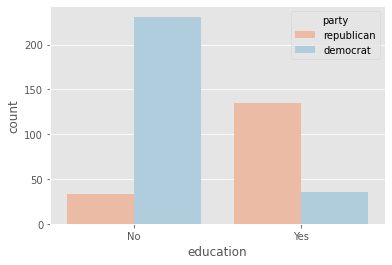

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
sns.countplot(x='education', hue='party', data=df,  palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

It seems like Democrats voted resoundingly against this bill, compared to Republicans. This is the kind of information that our machine learning model will seek to learn when we try to predict party affiliation solely based on voting behavior. 

Similarly exploring the voting behavior further by generating countplots for the `satellite` and `missile` bills, and answer the following question: Of these two bills, for which ones do Democrats vote resoundingly in favor of, compared to Republicans?

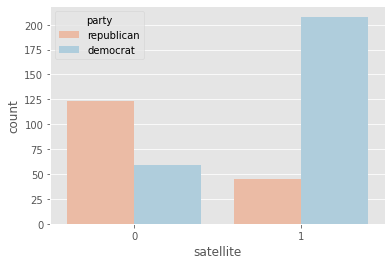

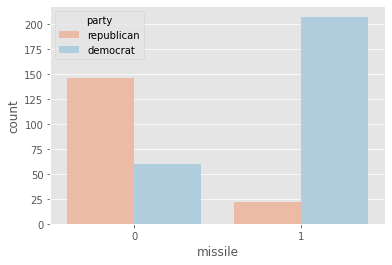

In [118]:
plt.figure()
sns.countplot(x='satellite', data=df, hue='party',  palette='RdBu')
plt.show()

plt.figure()
sns.countplot(x='missile', data=df, hue='party', palette='RdBu')
plt.show()

Democrats voted in favor of both 'satellite' and 'missile'

---

## The classification challenge
[VIDEO]('https://videos.datacamp.com/transcoded/1939_supervised_learning_w_scikit_learn/v9/hls-1939_ch1_3.master.m3u8')

### KNN on handritten digits dataset

In [119]:
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [120]:
X, y = load_digits(n_class=10, return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    stratify=y)

knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, y_train)

labels = knn.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, labels))

Accuracy:  0.975925925925926


ACTUAL: 9 :: PREDICTED: 9
ACTUAL: 1 :: PREDICTED: 1
ACTUAL: 2 :: PREDICTED: 2
ACTUAL: 7 :: PREDICTED: 7
ACTUAL: 0 :: PREDICTED: 0
ACTUAL: 7 :: PREDICTED: 7
ACTUAL: 7 :: PREDICTED: 7
ACTUAL: 5 :: PREDICTED: 5
ACTUAL: 3 :: PREDICTED: 3
ACTUAL: 8 :: PREDICTED: 8


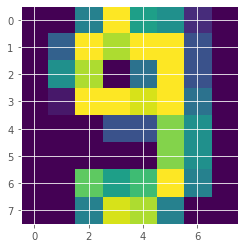

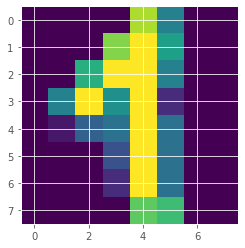

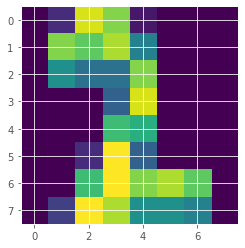

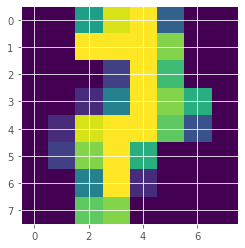

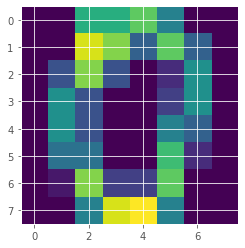

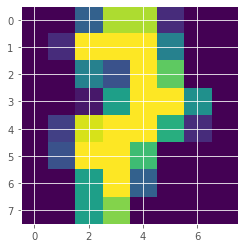

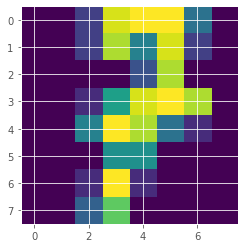

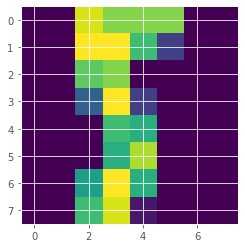

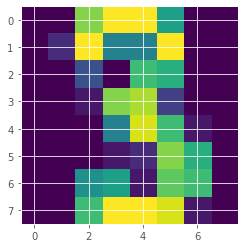

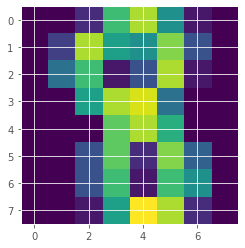

In [121]:
for i in np.random.randint(0, 200, 10):
  print('ACTUAL: {} :: PREDICTED: {}'.format(y_test[i], labels[i]))
  plt.figure()
  plt.imshow(X_test[i].reshape(8,8))

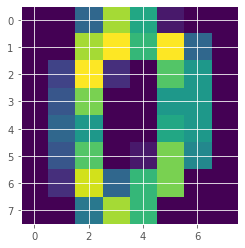

In [122]:
plt.imshow(X[0].reshape(8,8))

---
## Overfitting and underfitting

In [123]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [124]:
X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    stratify=y)

n_neighbors = np.arange(1, 10)
n_neighbors

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

Initializing two empty arrays to store train accuracy and test accuracy for different values of `n_neighbors`.

In [125]:
train_accuracy = np.empty(len(n_neighbors))
test_accuracy = np.empty(len(n_neighbors))

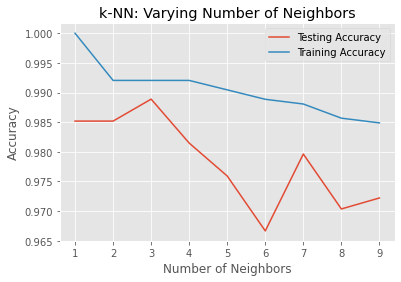

In [126]:
for i, k in enumerate(n_neighbors):
  knn = KNeighborsClassifier(n_neighbors=k)

  knn.fit(X_train, y_train)

  train_accuracy[i] = knn.score(X_train, y_train)
  test_accuracy[i] = knn.score(X_test, y_test)


# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(n_neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(n_neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

It looks like the test accuracy is highest when using 3 and 5 neighbors. Using 8, 9 neighbors or more seems to result in a simple model that underfits the data

---
---

# Part 2: Regression
[SLIDES](https://s3.amazonaws.com/assets.datacamp.com/production/course_1939/slides/chapter2.pdf)

## Introduction to regression
[VIDEO](https://videos.datacamp.com/transcoded/1939_supervised_learning_w_scikit_learn/v9/hls-1939_ch2_1.master.m3u8)

In [127]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import numpy as np

In [128]:
boston = load_boston()

print(type(boston)) # sklearn Bunch type, acts like a Dictionary
print(boston.keys())

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [129]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [130]:
X = boston.data
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

In [131]:
lr = LinearRegression()

lr.fit(X_train, y_train)

pred = lr.predict(X_test)

# Linear Regression uses R square as a metric to evaluate the performance of the model
lr.score(X_test, y_test)

0.7112260057484974

---

## Regression on `Gapminder` dataset
We'll predict life expectancy from the other features. Since the goal is to predict life expectancy, the target variable here is `life`

In [132]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

gapminder = pd.read_csv('/tmp/gm_2008_region.csv')
gapminder.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


Exploring the data, checking out if any correlation exists between fertility and life expectancy.

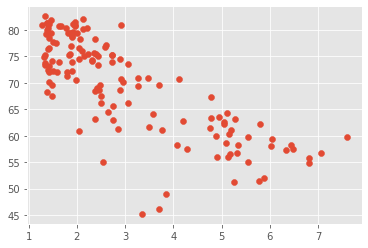

In [133]:
plt.scatter(gapminder['fertility'], gapminder['life'])

There is a strongly negative correlation, so a linear regression should be able to capture this trend. We'll fit a linear regression and then predict the life expectancy, overlaying these predicted values on the plot to generate a regression line. We will also compute and print the $R^2$ score using sckit-learn's `.score()` method.

0.6192442167740035


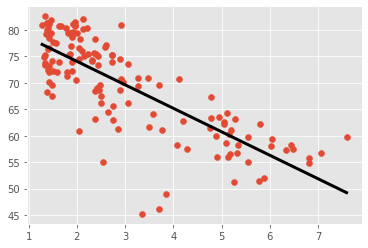

In [134]:
X_fertility = gapminder['fertility'].values.reshape(-1,1)
y = gapminder['life'].values

# Creating the regressor
reg = LinearRegression()

# Set up the prediction space to range from the minimum to the maximum of X_fertility
prediction_space = np.linspace(np.min(X_fertility), np.max(X_fertility)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_fertility, y)

# Predict for values in the prrediction_space
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(X_fertility, y))

# Plot regression line
plt.scatter(X_fertility, y)
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()

The performance is quite decent for this basic regression model with only one feature!

### Regression on `Gapminder` dataset again, this time with all the features and using RMSE as a metric to evaluate the model performance

In [135]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [136]:
gapminder = pd.read_csv('/tmp/gm_2008_region.csv')
gapminder.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [137]:
# Dropping Region as it is the only categorical column in the data. Also, `life` is the target
X = gapminder.drop(['Region', 'life'], axis=1)
y = gapminder['life']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

# Performing Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Prediction on test space
y_pred = lr.predict(X_test)

# R^2 and RMSE to evalutae model perfomance
print("R^2: {}".format(lr.score(X_test, y_test)))

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: {}'.format(rmse))

R^2: 0.838046873142936
RMSE: 3.2476010800377217


## Cross validation
VIDEO

### Motivation for cross validation
- If we simply use training and testing sets and evaluate model performance on test sets using metrics such as $R^2$, model performance can vary based on how the training and testing data was split
- Cross validation ensures model's ability to generalize

### K-Fold cross validation
- Data is split across k folds, each one reserved for testing, while the rest of them are used for training the model
- More folds = more computationally expensive, as we are fitting and predicting more number of times

In [138]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

In [139]:
X, y = load_boston(return_X_y=True)

lr = LinearRegression()

# 5 fold cross validation. Using cross_val_score because this is a regression problem
cv_results = cross_val_score(estimator=lr, X=X, y=y, cv=5)
print(cv_results)

[ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]


We get an array of 5 different values. We received 5 different values because we performed a 5-fold cross validation. Each value represents $R^2$ value, as this is the default metric of evaluation with `LinearRegression`.

To come up with a single value of model evaulation metric, we can compute the mean over the 5 values we received.

In [140]:
print(np.mean(cv_results))

0.35327592439588484


Performing 3-fold and 10-fold cross validation as well on the same dataset

In [141]:
cv_results_3 = cross_val_score(lr, X, y, cv=3)
print('3-fold cross validation score:', np.mean(cv_results_3))

cv_results_10 = cross_val_score(lr, X, y, cv=10)
print('10-fold cross validation score:', np.mean(cv_results_10))

3-fold cross validation score: -1.584198522099707
10-fold cross validation score: 0.20252899006055863


## Regularized regression
VIDEO

### Why regularize?
- Linear Regression uses minimizes a loss function to find the values of the coefficient for each feature variable
- If we allow the coefficients to be super large, it can lead to overfitting of the model

### Ridge Regression (L2 regularization)
- Loss function  = OLS + ${\alpha} * \sum_{i=1}^{n} a_i^{2}$  
  - $\alpha$: hyperparameter that decides upon the weightage to be given to regularization
  - $\alpha = 0$: We get back to OLS, and there is no regularization
  - High $\alpha$: May lead to underfitting of the model

In [142]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

In [143]:
X, y = load_boston(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

ridge = Ridge(alpha=0.1, fit_intercept=True, normalize=True)
ridge.fit(X_train, y_train)

ridge_pred = ridge.predict(X_test)

print(ridge.score(X_test, y_test))

0.6996938275127313


### Lasso Regularization (L1 regularization)
- Loss function  = OLS + ${\alpha} * \sum_{i=1}^{n} |a_i|$  
  - $\alpha$: hyperparameter that decides upon the weightage to be given to regularization

In [144]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston

In [145]:
X, y = load_boston(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

lasso = Lasso(alpha=0.1, fit_intercept=True, normalize=True)
lasso.fit(X_train, y_train)

ridge_pred = lasso.predict(X_test)

print(lasso.score(X_test, y_test))

0.595022953532855


## Lasso Regression for feature selection
- In addition to regularization, Lasso regression is used commonly for the purpose of feature selection
- It shrinks the coefficients of less important coefficients to exactly 0
- So, the features whose coefficient is not reduced to 0 are 'selected' by the Lasso algorithm


In [146]:
from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston
import pandas as pd

boston = pd.read_csv('/tmp/boston.csv')
boston.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [147]:
X, y = load_boston(return_X_y=True)

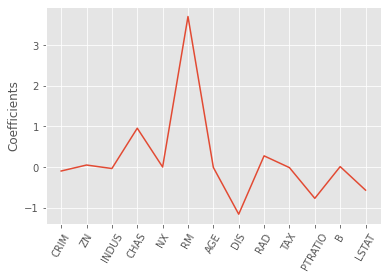

In [148]:
names = boston.drop('MEDV', axis=1).columns

# Instantiating the regressor
lasso = Lasso(alpha=0.1)

# Fit regressor to the data and extract the coeffecients
lasso_coeff = lasso.fit(X, y).coef_

# plotting the coefficients
plt.plot(range(len(names)), lasso_coeff)
plt.xticks(range(len(names)), names, rotation=60)
plt.ylabel('Coefficients')
plt.show()

As expected, the most important predictor for housing price the number of rooms feature, which is denoted by `RM` column.

### Lasso regression on `Gapminder` dataset to determine important features

In [149]:
import pandas as pd
from sklearn.linear_model import Lasso

gapminder = pd.read_csv('/tmp/gm_2008_region.csv')
gapminder.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


[-0.         -0.         -0.          0.          0.          0.
 -0.         -0.07087587]


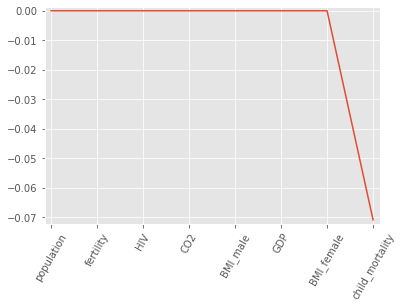

In [150]:
X = gapminder.drop(['Region', 'life'], axis=1)
y = gapminder['life']

lasso = Lasso(alpha=0.4, normalize=True)
lasso_coeff = lasso.fit(X, y).coef_
print(lasso_coeff)

X_columns = X.columns

# Plot the coefficients
plt.plot(range(len(X_columns)), lasso_coeff)
plt.xticks(range(len(X_columns)), X_columns.values, rotation=60)
plt.margins(0.02)
plt.show()

According to the lasso algorithm, it seems like `child_mortality` is the most important feature when predicting life expectancy.

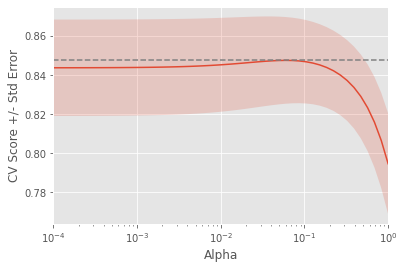

In [151]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

    
# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)

Notice how the cross-validation scores change with different alphas.

---
---

# Part 3: Fine tuning a model
[SLIDES](https://s3.amazonaws.com/assets.datacamp.com/production/course_1939/slides/chapter3.pdf)

## How good is your model
VIDEO

- Accuracy is not the only metric to measure the performance of a classification model
 - Eg. An email spam classification model in which 99% of the emails are real and only 1% are spam
 - We can build a model that classifies all emails as real, and our model accuracy will be 99%, which sounds great, but in reality is a horrible spam classification model as it never predicts spam at all
- Situations of class imbalancen require more nuance metrics than just accuracy to assess the performance of a model

## Diagnosing classification problems
### Confusion Matrix
![alt](https://ml8ygptwlcsq.i.optimole.com/fMKjlhs.f8AX~1c8f3/w:768/h:378/q:auto/https://www.unite.ai/wp-content/uploads/2019/12/Preventive_Medicine-e1576294312614.png)

In our example, emails that are correctly labelled as spam are categorized under **'True positives'**, and the emails correctly labelled as 'not spam' are categorized under **'True negatives'**.
- **False negatives:** Actual: Spam ; Predicted: Not Spam
- **False positives:** Actual: Not Spam; Predicted: Spam

#### Metrics from the confusion matrix
- $Accuracy = \frac{t_p + t_n}{t_p + t_n + f_p + f_n}$

- $Precision = \frac{t_p}{t_p + f_p}$
  - **Precision** is also called as **Positive Predictive Value (PPV)**
  - Number of correctly labelled spam emails, out of all emails categorized as spam
  - Of all the emails categorized as spam, what fraction of emails were actually spam
  - High precision means that our classifier has a low false positive rate, that is, not many real emails were classified as spam

- $Recall = \frac{t_p}{t_p + t_n}$  
  - Also called as **Sensitivity**, **Hit Rate** and **True Positive Rate (TPR)**
  - Number of correctly labelled spam emails out of emails that were actually spam  
  - High recall means that classifier predicted most spam emails correctly as spam

- $F1 score = 2 - \frac{precision * recall}{precision + recall}$
  - Harmonic mean of precision and recall


In [152]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

In [153]:
X, y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                     stratify=y)

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

Computing the Confusion Matrix

In [154]:
print(confusion_matrix(y_test, y_pred))

[[ 58   6]
 [  3 104]]


Computing the Classification Report

In [155]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        64
           1       0.95      0.97      0.96       107

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



## Applying the metrics to `PIMA Indians Diabetes` dataset

In [156]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

diabetes = pd.read_csv('/tmp/diabetes.csv')
diabetes.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [157]:
X = diabetes.drop('diabetes', axis=1)
y = diabetes['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

Computing confusion matrix

In [158]:
print(confusion_matrix(y_test, y_pred))

[[119  33]
 [ 32  47]]


Computing classification report

In [159]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.78      0.79       152
           1       0.59      0.59      0.59        79

    accuracy                           0.72       231
   macro avg       0.69      0.69      0.69       231
weighted avg       0.72      0.72      0.72       231



By analyzing the confusion matrix and classification report, you can get a much better understanding of your classifier's performance.

---

## Logistic regression and the ROC curve
VIDEO

- Logistic Regression is used for binary classification problems
- Logisitc Regression produces a linear decision boundary

In [160]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [161]:
voting = {'party': {0: 'republican', 1: 'republican', 2: 'democrat', 3: 'democrat', 4: 'democrat', 5: 'democrat', 6: 'democrat', 7: 'republican', 8: 'republican', 9: 'democrat', 10: 'republican', 11: 'republican', 12: 'democrat', 13: 'democrat', 14: 'republican', 15: 'republican', 16: 'democrat', 17: 'democrat', 18: 'republican', 19: 'democrat', 20: 'democrat', 21: 'democrat', 22: 'democrat', 23: 'democrat', 24: 'democrat', 25: 'democrat', 26: 'democrat', 27: 'democrat', 28: 'republican', 29: 'democrat', 30: 'republican', 31: 'democrat', 32: 'democrat', 33: 'republican', 34: 'democrat', 35: 'republican', 36: 'republican', 37: 'republican', 38: 'republican', 39: 'democrat', 40: 'democrat', 41: 'democrat', 42: 'democrat', 43: 'democrat', 44: 'democrat', 45: 'democrat', 46: 'democrat', 47: 'democrat', 48: 'democrat', 49: 'republican', 50: 'democrat', 51: 'republican', 52: 'democrat', 53: 'republican', 54: 'democrat', 55: 'republican', 56: 'republican', 57: 'republican', 58: 'republican', 59: 'republican', 60: 'democrat', 61: 'republican', 62: 'democrat', 63: 'democrat', 64: 'democrat', 65: 'republican', 66: 'republican', 67: 'republican', 68: 'democrat', 69: 'democrat', 70: 'democrat', 71: 'republican', 72: 'democrat', 73: 'republican', 74: 'democrat', 75: 'democrat', 76: 'democrat', 77: 'democrat', 78: 'democrat', 79: 'republican', 80: 'democrat', 81: 'democrat', 82: 'republican', 83: 'republican', 84: 'republican', 85: 'democrat', 86: 'republican', 87: 'republican', 88: 'democrat', 89: 'republican', 90: 'democrat', 91: 'democrat', 92: 'democrat', 93: 'democrat', 94: 'democrat', 95: 'democrat', 96: 'democrat', 97: 'democrat', 98: 'democrat', 99: 'republican', 100: 'democrat', 101: 'democrat', 102: 'democrat', 103: 'democrat', 104: 'democrat', 105: 'democrat', 106: 'republican', 107: 'republican', 108: 'democrat', 109: 'democrat', 110: 'democrat', 111: 'republican', 112: 'democrat', 113: 'republican', 114: 'democrat', 115: 'democrat', 116: 'democrat', 117: 'republican', 118: 'democrat', 119: 'republican', 120: 'republican', 121: 'republican', 122: 'republican', 123: 'republican', 124: 'democrat', 125: 'republican', 126: 'republican', 127: 'democrat', 128: 'democrat', 129: 'democrat', 130: 'democrat', 131: 'democrat', 132: 'republican', 133: 'republican', 134: 'republican', 135: 'republican', 136: 'republican', 137: 'democrat', 138: 'democrat', 139: 'democrat', 140: 'republican', 141: 'republican', 142: 'republican', 143: 'democrat', 144: 'democrat', 145: 'democrat', 146: 'republican', 147: 'democrat', 148: 'republican', 149: 'democrat', 150: 'republican', 151: 'democrat', 152: 'democrat', 153: 'democrat', 154: 'republican', 155: 'republican', 156: 'republican', 157: 'democrat', 158: 'republican', 159: 'democrat', 160: 'democrat', 161: 'democrat', 162: 'democrat', 163: 'republican', 164: 'democrat', 165: 'democrat', 166: 'republican', 167: 'republican', 168: 'democrat', 169: 'democrat', 170: 'democrat', 171: 'republican', 172: 'democrat', 173: 'democrat', 174: 'democrat', 175: 'democrat', 176: 'republican', 177: 'democrat', 178: 'democrat', 179: 'democrat', 180: 'democrat', 181: 'democrat', 182: 'democrat', 183: 'democrat', 184: 'democrat', 185: 'democrat', 186: 'democrat', 187: 'democrat', 188: 'republican', 189: 'democrat', 190: 'republican', 191: 'republican', 192: 'democrat', 193: 'democrat', 194: 'democrat', 195: 'republican', 196: 'democrat', 197: 'republican', 198: 'democrat', 199: 'democrat', 200: 'democrat', 201: 'democrat', 202: 'democrat', 203: 'democrat', 204: 'republican', 205: 'democrat', 206: 'republican', 207: 'republican', 208: 'democrat', 209: 'democrat', 210: 'democrat', 211: 'republican', 212: 'democrat', 213: 'democrat', 214: 'republican', 215: 'democrat', 216: 'democrat', 217: 'republican', 218: 'democrat', 219: 'democrat', 220: 'democrat', 221: 'democrat', 222: 'democrat', 223: 'republican', 224: 'republican', 225: 'republican', 226: 'democrat', 227: 'democrat', 228: 'republican', 229: 'republican', 230: 'republican', 231: 'republican', 232: 'democrat', 233: 'republican', 234: 'democrat', 235: 'republican', 236: 'democrat', 237: 'democrat', 238: 'democrat', 239: 'republican', 240: 'republican', 241: 'democrat', 242: 'republican', 243: 'democrat', 244: 'democrat', 245: 'democrat', 246: 'democrat', 247: 'republican', 248: 'republican', 249: 'democrat', 250: 'republican', 251: 'republican', 252: 'democrat', 253: 'republican', 254: 'democrat', 255: 'democrat', 256: 'republican', 257: 'republican', 258: 'democrat', 259: 'democrat', 260: 'democrat', 261: 'democrat', 262: 'democrat', 263: 'democrat', 264: 'democrat', 265: 'democrat', 266: 'republican', 267: 'republican', 268: 'democrat', 269: 'democrat', 270: 'democrat', 271: 'democrat', 272: 'democrat', 273: 'republican', 274: 'republican', 275: 'democrat', 276: 'republican', 277: 'republican', 278: 'republican', 279: 'republican', 280: 'democrat', 281: 'republican', 282: 'republican', 283: 'republican', 284: 'democrat', 285: 'democrat', 286: 'democrat', 287: 'democrat', 288: 'democrat', 289: 'democrat', 290: 'democrat', 291: 'democrat', 292: 'democrat', 293: 'democrat', 294: 'democrat', 295: 'republican', 296: 'republican', 297: 'democrat', 298: 'democrat', 299: 'democrat', 300: 'republican', 301: 'democrat', 302: 'republican', 303: 'republican', 304: 'republican', 305: 'republican', 306: 'republican', 307: 'democrat', 308: 'republican', 309: 'democrat', 310: 'republican', 311: 'democrat', 312: 'democrat', 313: 'republican', 314: 'republican', 315: 'republican', 316: 'democrat', 317: 'democrat', 318: 'democrat', 319: 'democrat', 320: 'democrat', 321: 'democrat', 322: 'democrat', 323: 'democrat', 324: 'republican', 325: 'democrat', 326: 'democrat', 327: 'republican', 328: 'democrat', 329: 'democrat', 330: 'republican', 331: 'democrat', 332: 'democrat', 333: 'democrat', 334: 'democrat', 335: 'republican', 336: 'democrat', 337: 'democrat', 338: 'democrat', 339: 'republican', 340: 'republican', 341: 'democrat', 342: 'democrat', 343: 'republican', 344: 'democrat', 345: 'republican', 346: 'republican', 347: 'republican', 348: 'democrat', 349: 'republican', 350: 'democrat', 351: 'republican', 352: 'democrat', 353: 'republican', 354: 'democrat', 355: 'republican', 356: 'republican', 357: 'republican', 358: 'democrat', 359: 'republican', 360: 'democrat', 361: 'democrat', 362: 'democrat', 363: 'republican', 364: 'republican', 365: 'democrat', 366: 'democrat', 367: 'democrat', 368: 'democrat', 369: 'republican', 370: 'democrat', 371: 'democrat', 372: 'democrat', 373: 'democrat', 374: 'republican', 375: 'democrat', 376: 'democrat', 377: 'republican', 378: 'republican', 379: 'republican', 380: 'democrat', 381: 'democrat', 382: 'democrat', 383: 'democrat', 384: 'democrat', 385: 'democrat', 386: 'democrat', 387: 'democrat', 388: 'democrat', 389: 'democrat', 390: 'democrat', 391: 'democrat', 392: 'republican', 393: 'republican', 394: 'democrat', 395: 'democrat', 396: 'democrat', 397: 'democrat', 398: 'democrat', 399: 'republican', 400: 'republican', 401: 'republican', 402: 'republican', 403: 'republican', 404: 'republican', 405: 'republican', 406: 'democrat', 407: 'democrat', 408: 'democrat', 409: 'republican', 410: 'republican', 411: 'democrat', 412: 'republican', 413: 'republican', 414: 'democrat', 415: 'democrat', 416: 'republican', 417: 'democrat', 418: 'democrat', 419: 'democrat', 420: 'republican', 421: 'democrat', 422: 'democrat', 423: 'democrat', 424: 'democrat', 425: 'democrat', 426: 'democrat', 427: 'republican', 428: 'democrat', 429: 'democrat', 430: 'republican', 431: 'democrat', 432: 'republican', 433: 'republican', 434: 'republican'}, 'infants': {0: 0, 1: 0, 2: 0, 3: 0, 4: 1, 5: 0, 6: 0, 7: 0, 8: 0, 9: 1, 10: 0, 11: 0, 12: 0, 13: 1, 14: 0, 15: 0, 16: 1, 17: 1, 18: 0, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 0, 31: 1, 32: 1, 33: 0, 34: 1, 35: 0, 36: 1, 37: 1, 38: 0, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 0, 50: 1, 51: 0, 52: 1, 53: 1, 54: 1, 55: 0, 56: 0, 57: 0, 58: 0, 59: 0, 60: 1, 61: 0, 62: 1, 63: 1, 64: 1, 65: 1, 66: 0, 67: 0, 68: 1, 69: 1, 70: 1, 71: 1, 72: 1, 73: 1, 74: 1, 75: 0, 76: 0, 77: 0, 78: 1, 79: 0, 80: 1, 81: 1, 82: 0, 83: 0, 84: 0, 85: 0, 86: 0, 87: 0, 88: 0, 89: 0, 90: 1, 91: 1, 92: 1, 93: 1, 94: 1, 95: 1, 96: 0, 97: 1, 98: 1, 99: 0, 100: 1, 101: 1, 102: 1, 103: 1, 104: 0, 105: 1, 106: 0, 107: 0, 108: 1, 109: 1, 110: 0, 111: 0, 112: 0, 113: 0, 114: 1, 115: 0, 116: 1, 117: 1, 118: 0, 119: 0, 120: 0, 121: 0, 122: 0, 123: 1, 124: 0, 125: 0, 126: 0, 127: 0, 128: 0, 129: 0, 130: 1, 131: 0, 132: 0, 133: 0, 134: 0, 135: 0, 136: 0, 137: 0, 138: 0, 139: 1, 140: 0, 141: 0, 142: 0, 143: 0, 144: 0, 145: 0, 146: 0, 147: 0, 148: 0, 149: 0, 150: 1, 151: 1, 152: 0, 153: 0, 154: 0, 155: 1, 156: 1, 157: 0, 158: 0, 159: 0, 160: 0, 161: 0, 162: 0, 163: 0, 164: 1, 165: 0, 166: 1, 167: 1, 168: 0, 169: 1, 170: 1, 171: 0, 172: 0, 173: 0, 174: 1, 175: 0, 176: 0, 177: 0, 178: 0, 179: 1, 180: 0, 181: 0, 182: 1, 183: 0, 184: 0, 185: 1, 186: 0, 187: 1, 188: 1, 189: 1, 190: 0, 191: 0, 192: 0, 193: 0, 194: 0, 195: 0, 196: 0, 197: 0, 198: 0, 199: 1, 200: 0, 201: 1, 202: 1, 203: 1, 204: 0, 205: 0, 206: 0, 207: 1, 208: 0, 209: 1, 210: 0, 211: 0, 212: 0, 213: 0, 214: 1, 215: 0, 216: 1, 217: 0, 218: 1, 219: 0, 220: 0, 221: 0, 222: 1, 223: 0, 224: 0, 225: 0, 226: 0, 227: 1, 228: 0, 229: 0, 230: 0, 231: 0, 232: 0, 233: 0, 234: 0, 235: 0, 236: 0, 237: 1, 238: 1, 239: 0, 240: 0, 241: 1, 242: 0, 243: 0, 244: 1, 245: 1, 246: 0, 247: 0, 248: 0, 249: 1, 250: 0, 251: 0, 252: 1, 253: 0, 254: 1, 255: 1, 256: 0, 257: 0, 258: 0, 259: 1, 260: 1, 261: 1, 262: 1, 263: 1, 264: 1, 265: 1, 266: 0, 267: 1, 268: 1, 269: 1, 270: 1, 271: 0, 272: 1, 273: 0, 274: 1, 275: 0, 276: 0, 277: 0, 278: 0, 279: 0, 280: 0, 281: 1, 282: 1, 283: 0, 284: 0, 285: 0, 286: 0, 287: 1, 288: 1, 289: 1, 290: 1, 291: 1, 292: 1, 293: 1, 294: 0, 295: 0, 296: 0, 297: 1, 298: 0, 299: 0, 300: 0, 301: 0, 302: 0, 303: 0, 304: 0, 305: 0, 306: 0, 307: 1, 308: 0, 309: 1, 310: 0, 311: 0, 312: 1, 313: 0, 314: 0, 315: 0, 316: 0, 317: 1, 318: 0, 319: 1, 320: 0, 321: 1, 322: 1, 323: 1, 324: 0, 325: 0, 326: 1, 327: 0, 328: 1, 329: 1, 330: 0, 331: 1, 332: 1, 333: 0, 334: 0, 335: 0, 336: 0, 337: 1, 338: 1, 339: 1, 340: 0, 341: 0, 342: 0, 343: 0, 344: 0, 345: 0, 346: 0, 347: 1, 348: 1, 349: 0, 350: 0, 351: 0, 352: 0, 353: 0, 354: 0, 355: 1, 356: 0, 357: 0, 358: 1, 359: 0, 360: 1, 361: 1, 362: 1, 363: 1, 364: 1, 365: 0, 366: 1, 367: 1, 368: 0, 369: 0, 370: 1, 371: 1, 372: 0, 373: 0, 374: 0, 375: 0, 376: 1, 377: 0, 378: 0, 379: 0, 380: 1, 381: 1, 382: 1, 383: 1, 384: 1, 385: 1, 386: 0, 387: 1, 388: 0, 389: 1, 390: 0, 391: 1, 392: 1, 393: 0, 394: 1, 395: 1, 396: 1, 397: 1, 398: 0, 399: 0, 400: 0, 401: 0, 402: 0, 403: 0, 404: 1, 405: 0, 406: 1, 407: 0, 408: 1, 409: 0, 410: 0, 411: 1, 412: 0, 413: 1, 414: 1, 415: 0, 416: 1, 417: 1, 418: 1, 419: 1, 420: 1, 421: 0, 422: 0, 423: 0, 424: 0, 425: 0, 426: 1, 427: 0, 428: 0, 429: 1, 430: 0, 431: 0, 432: 0, 433: 0, 434: 0}, 'water': {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 0, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 0, 25: 0, 26: 0, 27: 1, 28: 0, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 0, 40: 1, 41: 1, 42: 0, 43: 0, 44: 1, 45: 1, 46: 1, 47: 0, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 1, 63: 1, 64: 1, 65: 1, 66: 1, 67: 1, 68: 1, 69: 1, 70: 0, 71: 1, 72: 1, 73: 0, 74: 0, 75: 1, 76: 1, 77: 1, 78: 1, 79: 0, 80: 0, 81: 0, 82: 0, 83: 0, 84: 1, 85: 0, 86: 0, 87: 0, 88: 1, 89: 0, 90: 0, 91: 0, 92: 1, 93: 0, 94: 0, 95: 0, 96: 0, 97: 0, 98: 1, 99: 0, 100: 0, 101: 0, 102: 0, 103: 0, 104: 1, 105: 1, 106: 1, 107: 1, 108: 1, 109: 1, 110: 0, 111: 1, 112: 1, 113: 1, 114: 1, 115: 1, 116: 0, 117: 1, 118: 1, 119: 0, 120: 1, 121: 1, 122: 0, 123: 1, 124: 1, 125: 1, 126: 1, 127: 1, 128: 1, 129: 1, 130: 1, 131: 0, 132: 0, 133: 0, 134: 0, 135: 0, 136: 1, 137: 1, 138: 0, 139: 0, 140: 0, 141: 0, 142: 0, 143: 1, 144: 1, 145: 0, 146: 1, 147: 0, 148: 1, 149: 0, 150: 1, 151: 1, 152: 1, 153: 0, 154: 1, 155: 1, 156: 1, 157: 1, 158: 1, 159: 1, 160: 1, 161: 0, 162: 1, 163: 1, 164: 1, 165: 1, 166: 0, 167: 0, 168: 0, 169: 0, 170: 0, 171: 1, 172: 1, 173: 0, 174: 1, 175: 1, 176: 0, 177: 0, 178: 0, 179: 0, 180: 1, 181: 0, 182: 1, 183: 1, 184: 0, 185: 0, 186: 1, 187: 0, 188: 1, 189: 0, 190: 1, 191: 1, 192: 0, 193: 0, 194: 0, 195: 0, 196: 0, 197: 1, 198: 0, 199: 1, 200: 0, 201: 1, 202: 0, 203: 0, 204: 0, 205: 0, 206: 0, 207: 1, 208: 0, 209: 1, 210: 0, 211: 1, 212: 0, 213: 1, 214: 1, 215: 1, 216: 1, 217: 1, 218: 1, 219: 1, 220: 0, 221: 1, 222: 0, 223: 0, 224: 1, 225: 1, 226: 0, 227: 0, 228: 1, 229: 1, 230: 1, 231: 1, 232: 1, 233: 1, 234: 0, 235: 0, 236: 0, 237: 0, 238: 1, 239: 0, 240: 0, 241: 0, 242: 0, 243: 1, 244: 0, 245: 0, 246: 0, 247: 1, 248: 1, 249: 0, 250: 1, 251: 1, 252: 1, 253: 1, 254: 0, 255: 0, 256: 0, 257: 0, 258: 0, 259: 0, 260: 0, 261: 0, 262: 0, 263: 0, 264: 0, 265: 0, 266: 0, 267: 0, 268: 0, 269: 0, 270: 1, 271: 1, 272: 0, 273: 0, 274: 0, 275: 0, 276: 0, 277: 0, 278: 0, 279: 0, 280: 0, 281: 0, 282: 0, 283: 0, 284: 0, 285: 0, 286: 0, 287: 1, 288: 1, 289: 1, 290: 0, 291: 0, 292: 0, 293: 1, 294: 1, 295: 1, 296: 0, 297: 1, 298: 1, 299: 1, 300: 0, 301: 0, 302: 0, 303: 0, 304: 1, 305: 0, 306: 0, 307: 0, 308: 0, 309: 0, 310: 0, 311: 0, 312: 1, 313: 1, 314: 1, 315: 1, 316: 0, 317: 0, 318: 0, 319: 0, 320: 1, 321: 1, 322: 1, 323: 1, 324: 1, 325: 1, 326: 1, 327: 1, 328: 1, 329: 1, 330: 1, 331: 1, 332: 0, 333: 0, 334: 1, 335: 0, 336: 0, 337: 0, 338: 0, 339: 0, 340: 0, 341: 1, 342: 1, 343: 0, 344: 0, 345: 0, 346: 0, 347: 0, 348: 0, 349: 1, 350: 1, 351: 0, 352: 1, 353: 0, 354: 1, 355: 0, 356: 0, 357: 0, 358: 1, 359: 0, 360: 0, 361: 0, 362: 1, 363: 1, 364: 1, 365: 1, 366: 0, 367: 1, 368: 1, 369: 1, 370: 1, 371: 1, 372: 1, 373: 1, 374: 1, 375: 1, 376: 1, 377: 1, 378: 0, 379: 0, 380: 1, 381: 1, 382: 1, 383: 1, 384: 1, 385: 1, 386: 1, 387: 1, 388: 1, 389: 0, 390: 1, 391: 1, 392: 1, 393: 1, 394: 1, 395: 1, 396: 1, 397: 1, 398: 1, 399: 1, 400: 1, 401: 1, 402: 0, 403: 1, 404: 1, 405: 0, 406: 0, 407: 0, 408: 0, 409: 0, 410: 0, 411: 0, 412: 0, 413: 1, 414: 1, 415: 1, 416: 1, 417: 1, 418: 1, 419: 1, 420: 1, 421: 1, 422: 0, 423: 1, 424: 1, 425: 0, 426: 0, 427: 0, 428: 1, 429: 0, 430: 0, 431: 0, 432: 1, 433: 0, 434: 1}, 'budget': {0: 0, 1: 0, 2: 1, 3: 1, 4: 1, 5: 1, 6: 0, 7: 0, 8: 0, 9: 1, 10: 0, 11: 0, 12: 1, 13: 1, 14: 0, 15: 0, 16: 1, 17: 1, 18: 0, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 0, 29: 1, 30: 0, 31: 1, 32: 1, 33: 0, 34: 1, 35: 0, 36: 0, 37: 0, 38: 0, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 0, 50: 1, 51: 0, 52: 1, 53: 0, 54: 1, 55: 0, 56: 0, 57: 0, 58: 0, 59: 0, 60: 1, 61: 0, 62: 1, 63: 1, 64: 1, 65: 0, 66: 0, 67: 0, 68: 1, 69: 1, 70: 1, 71: 1, 72: 1, 73: 1, 74: 1, 75: 1, 76: 1, 77: 1, 78: 1, 79: 0, 80: 1, 81: 1, 82: 0, 83: 0, 84: 0, 85: 1, 86: 0, 87: 0, 88: 1, 89: 0, 90: 1, 91: 1, 92: 1, 93: 1, 94: 1, 95: 1, 96: 1, 97: 0, 98: 1, 99: 0, 100: 0, 101: 1, 102: 1, 103: 0, 104: 1, 105: 1, 106: 0, 107: 1, 108: 1, 109: 1, 110: 1, 111: 0, 112: 1, 113: 0, 114: 1, 115: 1, 116: 1, 117: 1, 118: 1, 119: 0, 120: 1, 121: 0, 122: 0, 123: 0, 124: 1, 125: 0, 126: 0, 127: 1, 128: 1, 129: 1, 130: 1, 131: 1, 132: 0, 133: 0, 134: 0, 135: 0, 136: 0, 137: 1, 138: 1, 139: 1, 140: 0, 141: 0, 142: 0, 143: 0, 144: 0, 145: 1, 146: 0, 147: 0, 148: 0, 149: 1, 150: 0, 151: 1, 152: 1, 153: 1, 154: 0, 155: 0, 156: 0, 157: 1, 158: 0, 159: 1, 160: 0, 161: 0, 162: 1, 163: 0, 164: 0, 165: 1, 166: 1, 167: 1, 168: 1, 169: 1, 170: 1, 171: 0, 172: 1, 173: 0, 174: 1, 175: 1, 176: 1, 177: 1, 178: 1, 179: 1, 180: 1, 181: 1, 182: 1, 183: 1, 184: 1, 185: 1, 186: 1, 187: 1, 188: 0, 189: 1, 190: 0, 191: 0, 192: 0, 193: 1, 194: 1, 195: 0, 196: 1, 197: 1, 198: 1, 199: 0, 200: 1, 201: 1, 202: 1, 203: 1, 204: 1, 205: 1, 206: 0, 207: 0, 208: 1, 209: 1, 210: 1, 211: 0, 212: 1, 213: 1, 214: 0, 215: 1, 216: 1, 217: 0, 218: 1, 219: 1, 220: 1, 221: 1, 222: 1, 223: 0, 224: 0, 225: 0, 226: 1, 227: 1, 228: 0, 229: 1, 230: 0, 231: 0, 232: 1, 233: 0, 234: 1, 235: 0, 236: 1, 237: 1, 238: 1, 239: 0, 240: 0, 241: 1, 242: 0, 243: 1, 244: 1, 245: 1, 246: 1, 247: 0, 248: 1, 249: 1, 250: 0, 251: 0, 252: 1, 253: 0, 254: 1, 255: 1, 256: 0, 257: 0, 258: 1, 259: 1, 260: 1, 261: 1, 262: 1, 263: 1, 264: 1, 265: 1, 266: 0, 267: 0, 268: 1, 269: 1, 270: 1, 271: 1, 272: 1, 273: 0, 274: 0, 275: 1, 276: 0, 277: 1, 278: 0, 279: 0, 280: 1, 281: 1, 282: 0, 283: 0, 284: 1, 285: 1, 286: 1, 287: 1, 288: 1, 289: 1, 290: 1, 291: 1, 292: 1, 293: 1, 294: 1, 295: 0, 296: 1, 297: 1, 298: 0, 299: 1, 300: 0, 301: 1, 302: 0, 303: 0, 304: 0, 305: 0, 306: 0, 307: 1, 308: 0, 309: 0, 310: 0, 311: 1, 312: 1, 313: 1, 314: 0, 315: 1, 316: 0, 317: 0, 318: 1, 319: 1, 320: 1, 321: 1, 322: 1, 323: 1, 324: 0, 325: 0, 326: 0, 327: 0, 328: 1, 329: 1, 330: 0, 331: 1, 332: 1, 333: 1, 334: 1, 335: 0, 336: 1, 337: 1, 338: 1, 339: 0, 340: 0, 341: 1, 342: 1, 343: 0, 344: 1, 345: 0, 346: 0, 347: 0, 348: 1, 349: 1, 350: 0, 351: 1, 352: 0, 353: 1, 354: 1, 355: 1, 356: 0, 357: 0, 358: 1, 359: 0, 360: 1, 361: 1, 362: 1, 363: 0, 364: 0, 365: 0, 366: 1, 367: 1, 368: 1, 369: 0, 370: 1, 371: 1, 372: 1, 373: 1, 374: 0, 375: 0, 376: 1, 377: 0, 378: 0, 379: 0, 380: 1, 381: 1, 382: 0, 383: 1, 384: 1, 385: 0, 386: 1, 387: 1, 388: 1, 389: 1, 390: 0, 391: 0, 392: 0, 393: 1, 394: 1, 395: 1, 396: 1, 397: 0, 398: 1, 399: 0, 400: 0, 401: 0, 402: 1, 403: 0, 404: 0, 405: 0, 406: 1, 407: 0, 408: 1, 409: 0, 410: 0, 411: 1, 412: 0, 413: 1, 414: 1, 415: 1, 416: 0, 417: 1, 418: 1, 419: 1, 420: 1, 421: 1, 422: 1, 423: 1, 424: 1, 425: 1, 426: 1, 427: 0, 428: 1, 429: 1, 430: 1, 431: 1, 432: 0, 433: 0, 434: 0}, 'physician': {0: 1, 1: 1, 2: 0, 3: 0, 4: 0, 5: 0, 6: 1, 7: 1, 8: 1, 9: 0, 10: 1, 11: 1, 12: 0, 13: 0, 14: 1, 15: 1, 16: 0, 17: 0, 18: 1, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 1, 29: 0, 30: 1, 31: 0, 32: 0, 33: 1, 34: 0, 35: 1, 36: 1, 37: 1, 38: 1, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 1, 50: 0, 51: 1, 52: 0, 53: 1, 54: 0, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 0, 61: 1, 62: 0, 63: 0, 64: 0, 65: 1, 66: 1, 67: 1, 68: 0, 69: 0, 70: 0, 71: 1, 72: 0, 73: 1, 74: 0, 75: 1, 76: 0, 77: 1, 78: 0, 79: 1, 80: 0, 81: 0, 82: 1, 83: 1, 84: 1, 85: 0, 86: 1, 87: 1, 88: 0, 89: 1, 90: 0, 91: 0, 92: 0, 93: 0, 94: 0, 95: 0, 96: 0, 97: 0, 98: 0, 99: 1, 100: 0, 101: 0, 102: 0, 103: 0, 104: 0, 105: 0, 106: 1, 107: 0, 108: 0, 109: 0, 110: 0, 111: 1, 112: 0, 113: 1, 114: 0, 115: 0, 116: 0, 117: 1, 118: 0, 119: 1, 120: 1, 121: 1, 122: 1, 123: 1, 124: 0, 125: 1, 126: 1, 127: 0, 128: 0, 129: 0, 130: 0, 131: 0, 132: 1, 133: 1, 134: 1, 135: 1, 136: 1, 137: 0, 138: 0, 139: 0, 140: 1, 141: 1, 142: 1, 143: 0, 144: 0, 145: 0, 146: 1, 147: 0, 148: 1, 149: 0, 150: 1, 151: 1, 152: 0, 153: 0, 154: 1, 155: 1, 156: 1, 157: 0, 158: 1, 159: 0, 160: 0, 161: 0, 162: 0, 163: 1, 164: 0, 165: 0, 166: 1, 167: 1, 168: 1, 169: 0, 170: 0, 171: 1, 172: 0, 173: 0, 174: 0, 175: 0, 176: 1, 177: 0, 178: 0, 179: 0, 180: 0, 181: 0, 182: 0, 183: 0, 184: 0, 185: 0, 186: 0, 187: 0, 188: 1, 189: 0, 190: 1, 191: 1, 192: 0, 193: 0, 194: 0, 195: 1, 196: 0, 197: 1, 198: 0, 199: 0, 200: 0, 201: 0, 202: 0, 203: 0, 204: 1, 205: 0, 206: 1, 207: 1, 208: 0, 209: 0, 210: 0, 211: 1, 212: 0, 213: 0, 214: 1, 215: 1, 216: 0, 217: 1, 218: 0, 219: 0, 220: 0, 221: 0, 222: 0, 223: 1, 224: 1, 225: 1, 226: 0, 227: 0, 228: 1, 229: 1, 230: 1, 231: 1, 232: 0, 233: 1, 234: 0, 235: 1, 236: 0, 237: 0, 238: 0, 239: 1, 240: 1, 241: 0, 242: 0, 243: 0, 244: 0, 245: 0, 246: 0, 247: 1, 248: 0, 249: 0, 250: 1, 251: 1, 252: 0, 253: 1, 254: 0, 255: 0, 256: 1, 257: 1, 258: 0, 259: 0, 260: 0, 261: 0, 262: 0, 263: 0, 264: 0, 265: 0, 266: 1, 267: 0, 268: 0, 269: 0, 270: 0, 271: 0, 272: 0, 273: 1, 274: 1, 275: 0, 276: 1, 277: 1, 278: 1, 279: 1, 280: 0, 281: 1, 282: 1, 283: 1, 284: 0, 285: 0, 286: 0, 287: 0, 288: 0, 289: 0, 290: 0, 291: 0, 292: 0, 293: 0, 294: 0, 295: 1, 296: 1, 297: 0, 298: 0, 299: 0, 300: 1, 301: 0, 302: 1, 303: 1, 304: 1, 305: 1, 306: 1, 307: 0, 308: 1, 309: 0, 310: 1, 311: 0, 312: 0, 313: 1, 314: 1, 315: 1, 316: 0, 317: 0, 318: 0, 319: 0, 320: 0, 321: 0, 322: 0, 323: 0, 324: 1, 325: 0, 326: 1, 327: 1, 328: 0, 329: 0, 330: 1, 331: 0, 332: 0, 333: 0, 334: 0, 335: 1, 336: 0, 337: 0, 338: 0, 339: 1, 340: 1, 341: 0, 342: 0, 343: 1, 344: 0, 345: 1, 346: 1, 347: 1, 348: 0, 349: 1, 350: 0, 351: 1, 352: 1, 353: 1, 354: 0, 355: 1, 356: 1, 357: 1, 358: 0, 359: 1, 360: 0, 361: 0, 362: 0, 363: 1, 364: 1, 365: 0, 366: 0, 367: 0, 368: 0, 369: 1, 370: 0, 371: 0, 372: 1, 373: 0, 374: 1, 375: 1, 376: 0, 377: 1, 378: 1, 379: 1, 380: 0, 381: 0, 382: 1, 383: 0, 384: 1, 385: 0, 386: 0, 387: 0, 388: 1, 389: 0, 390: 0, 391: 0, 392: 1, 393: 0, 394: 0, 395: 0, 396: 0, 397: 0, 398: 0, 399: 1, 400: 1, 401: 1, 402: 1, 403: 1, 404: 1, 405: 1, 406: 0, 407: 1, 408: 0, 409: 1, 410: 1, 411: 0, 412: 1, 413: 1, 414: 0, 415: 0, 416: 1, 417: 0, 418: 0, 419: 0, 420: 1, 421: 0, 422: 0, 423: 0, 424: 0, 425: 0, 426: 0, 427: 1, 428: 0, 429: 0, 430: 1, 431: 0, 432: 1, 433: 1, 434: 1}, 'salvador': {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 0, 10: 1, 11: 1, 12: 0, 13: 0, 14: 1, 15: 1, 16: 0, 17: 0, 18: 1, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 1, 29: 0, 30: 1, 31: 0, 32: 0, 33: 1, 34: 0, 35: 1, 36: 1, 37: 1, 38: 1, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 1, 50: 0, 51: 1, 52: 0, 53: 1, 54: 0, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 0, 61: 1, 62: 0, 63: 0, 64: 0, 65: 1, 66: 1, 67: 1, 68: 0, 69: 0, 70: 0, 71: 0, 72: 0, 73: 1, 74: 0, 75: 1, 76: 1, 77: 1, 78: 1, 79: 1, 80: 0, 81: 0, 82: 1, 83: 1, 84: 1, 85: 1, 86: 1, 87: 1, 88: 1, 89: 1, 90: 0, 91: 0, 92: 0, 93: 0, 94: 1, 95: 1, 96: 1, 97: 1, 98: 0, 99: 1, 100: 1, 101: 1, 102: 1, 103: 1, 104: 0, 105: 0, 106: 1, 107: 1, 108: 0, 109: 0, 110: 0, 111: 1, 112: 0, 113: 1, 114: 0, 115: 1, 116: 0, 117: 1, 118: 0, 119: 1, 120: 1, 121: 1, 122: 1, 123: 1, 124: 0, 125: 1, 126: 1, 127: 0, 128: 0, 129: 0, 130: 1, 131: 0, 132: 1, 133: 1, 134: 1, 135: 1, 136: 1, 137: 0, 138: 0, 139: 0, 140: 0, 141: 1, 142: 1, 143: 0, 144: 0, 145: 0, 146: 1, 147: 0, 148: 1, 149: 0, 150: 1, 151: 1, 152: 0, 153: 0, 154: 1, 155: 1, 156: 1, 157: 0, 158: 1, 159: 1, 160: 1, 161: 1, 162: 1, 163: 1, 164: 1, 165: 0, 166: 1, 167: 1, 168: 1, 169: 0, 170: 0, 171: 1, 172: 0, 173: 1, 174: 0, 175: 0, 176: 0, 177: 0, 178: 0, 179: 0, 180: 0, 181: 0, 182: 0, 183: 1, 184: 0, 185: 0, 186: 0, 187: 0, 188: 1, 189: 0, 190: 1, 191: 1, 192: 0, 193: 0, 194: 0, 195: 1, 196: 0, 197: 1, 198: 0, 199: 0, 200: 0, 201: 0, 202: 0, 203: 0, 204: 1, 205: 0, 206: 1, 207: 1, 208: 0, 209: 0, 210: 0, 211: 1, 212: 0, 213: 0, 214: 1, 215: 1, 216: 1, 217: 1, 218: 0, 219: 0, 220: 0, 221: 1, 222: 0, 223: 1, 224: 1, 225: 1, 226: 0, 227: 0, 228: 1, 229: 1, 230: 1, 231: 1, 232: 0, 233: 1, 234: 0, 235: 1, 236: 0, 237: 0, 238: 0, 239: 1, 240: 0, 241: 0, 242: 1, 243: 0, 244: 0, 245: 0, 246: 1, 247: 1, 248: 1, 249: 0, 250: 1, 251: 1, 252: 0, 253: 1, 254: 0, 255: 0, 256: 1, 257: 1, 258: 0, 259: 0, 260: 0, 261: 0, 262: 0, 263: 0, 264: 0, 265: 0, 266: 1, 267: 0, 268: 0, 269: 0, 270: 0, 271: 0, 272: 0, 273: 1, 274: 1, 275: 1, 276: 1, 277: 1, 278: 1, 279: 1, 280: 0, 281: 1, 282: 1, 283: 1, 284: 0, 285: 0, 286: 0, 287: 0, 288: 1, 289: 1, 290: 1, 291: 0, 292: 0, 293: 0, 294: 0, 295: 1, 296: 1, 297: 0, 298: 0, 299: 0, 300: 1, 301: 0, 302: 1, 303: 1, 304: 1, 305: 1, 306: 1, 307: 0, 308: 1, 309: 0, 310: 1, 311: 0, 312: 0, 313: 1, 314: 1, 315: 1, 316: 0, 317: 0, 318: 0, 319: 0, 320: 0, 321: 0, 322: 1, 323: 1, 324: 1, 325: 1, 326: 0, 327: 1, 328: 0, 329: 0, 330: 1, 331: 0, 332: 0, 333: 0, 334: 0, 335: 1, 336: 0, 337: 0, 338: 0, 339: 1, 340: 1, 341: 0, 342: 1, 343: 1, 344: 0, 345: 1, 346: 1, 347: 1, 348: 0, 349: 1, 350: 0, 351: 1, 352: 0, 353: 1, 354: 0, 355: 0, 356: 1, 357: 1, 358: 0, 359: 1, 360: 0, 361: 1, 362: 0, 363: 1, 364: 1, 365: 1, 366: 0, 367: 1, 368: 0, 369: 1, 370: 1, 371: 1, 372: 1, 373: 1, 374: 1, 375: 1, 376: 0, 377: 1, 378: 1, 379: 1, 380: 0, 381: 1, 382: 1, 383: 1, 384: 1, 385: 1, 386: 1, 387: 1, 388: 1, 389: 0, 390: 1, 391: 0, 392: 1, 393: 0, 394: 1, 395: 0, 396: 1, 397: 1, 398: 1, 399: 1, 400: 1, 401: 1, 402: 0, 403: 1, 404: 1, 405: 1, 406: 1, 407: 1, 408: 0, 409: 1, 410: 1, 411: 0, 412: 1, 413: 1, 414: 0, 415: 0, 416: 1, 417: 0, 418: 0, 419: 0, 420: 1, 421: 1, 422: 0, 423: 0, 424: 0, 425: 0, 426: 0, 427: 1, 428: 0, 429: 1, 430: 1, 431: 0, 432: 1, 433: 1, 434: 1}, 'religious': {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 0, 10: 0, 11: 1, 12: 0, 13: 1, 14: 1, 15: 1, 16: 1, 17: 0, 18: 1, 19: 0, 20: 1, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 1, 31: 0, 32: 0, 33: 1, 34: 0, 35: 1, 36: 1, 37: 1, 38: 1, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 1, 50: 0, 51: 1, 52: 0, 53: 1, 54: 1, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 0, 63: 0, 64: 0, 65: 1, 66: 1, 67: 1, 68: 0, 69: 0, 70: 0, 71: 0, 72: 0, 73: 0, 74: 1, 75: 1, 76: 1, 77: 1, 78: 1, 79: 0, 80: 1, 81: 0, 82: 1, 83: 1, 84: 1, 85: 1, 86: 1, 87: 1, 88: 1, 89: 1, 90: 0, 91: 0, 92: 0, 93: 0, 94: 1, 95: 1, 96: 1, 97: 1, 98: 1, 99: 1, 100: 1, 101: 1, 102: 1, 103: 1, 104: 1, 105: 0, 106: 1, 107: 1, 108: 0, 109: 0, 110: 0, 111: 1, 112: 1, 113: 1, 114: 0, 115: 1, 116: 0, 117: 0, 118: 0, 119: 1, 120: 1, 121: 1, 122: 1, 123: 1, 124: 0, 125: 1, 126: 1, 127: 0, 128: 1, 129: 0, 130: 1, 131: 1, 132: 1, 133: 1, 134: 1, 135: 1, 136: 1, 137: 1, 138: 1, 139: 1, 140: 0, 141: 1, 142: 1, 143: 0, 144: 1, 145: 1, 146: 1, 147: 0, 148: 1, 149: 0, 150: 1, 151: 1, 152: 1, 153: 1, 154: 1, 155: 1, 156: 1, 157: 1, 158: 1, 159: 1, 160: 1, 161: 1, 162: 1, 163: 1, 164: 1, 165: 1, 166: 1, 167: 1, 168: 1, 169: 0, 170: 0, 171: 1, 172: 0, 173: 1, 174: 0, 175: 0, 176: 0, 177: 0, 178: 0, 179: 0, 180: 0, 181: 0, 182: 0, 183: 1, 184: 0, 185: 0, 186: 0, 187: 0, 188: 1, 189: 0, 190: 1, 191: 1, 192: 1, 193: 0, 194: 1, 195: 1, 196: 1, 197: 1, 198: 0, 199: 0, 200: 0, 201: 0, 202: 1, 203: 0, 204: 1, 205: 1, 206: 1, 207: 1, 208: 0, 209: 0, 210: 1, 211: 1, 212: 0, 213: 1, 214: 1, 215: 1, 216: 1, 217: 1, 218: 0, 219: 0, 220: 0, 221: 1, 222: 0, 223: 0, 224: 1, 225: 1, 226: 1, 227: 0, 228: 1, 229: 1, 230: 1, 231: 1, 232: 0, 233: 1, 234: 1, 235: 1, 236: 0, 237: 1, 238: 0, 239: 1, 240: 1, 241: 0, 242: 1, 243: 0, 244: 0, 245: 0, 246: 0, 247: 1, 248: 1, 249: 0, 250: 1, 251: 1, 252: 1, 253: 1, 254: 0, 255: 0, 256: 0, 257: 0, 258: 0, 259: 0, 260: 0, 261: 1, 262: 0, 263: 0, 264: 0, 265: 0, 266: 1, 267: 0, 268: 0, 269: 0, 270: 0, 271: 1, 272: 0, 273: 0, 274: 0, 275: 1, 276: 1, 277: 1, 278: 1, 279: 1, 280: 0, 281: 1, 282: 1, 283: 1, 284: 1, 285: 1, 286: 1, 287: 1, 288: 1, 289: 1, 290: 1, 291: 1, 292: 1, 293: 1, 294: 1, 295: 1, 296: 1, 297: 1, 298: 0, 299: 1, 300: 0, 301: 1, 302: 1, 303: 1, 304: 1, 305: 1, 306: 1, 307: 1, 308: 1, 309: 1, 310: 1, 311: 1, 312: 0, 313: 1, 314: 1, 315: 1, 316: 1, 317: 0, 318: 0, 319: 0, 320: 1, 321: 0, 322: 1, 323: 1, 324: 1, 325: 1, 326: 0, 327: 1, 328: 0, 329: 1, 330: 1, 331: 0, 332: 0, 333: 0, 334: 1, 335: 1, 336: 1, 337: 0, 338: 0, 339: 1, 340: 1, 341: 1, 342: 1, 343: 0, 344: 0, 345: 1, 346: 1, 347: 1, 348: 0, 349: 1, 350: 1, 351: 1, 352: 1, 353: 1, 354: 1, 355: 0, 356: 1, 357: 1, 358: 1, 359: 1, 360: 1, 361: 1, 362: 1, 363: 1, 364: 1, 365: 1, 366: 0, 367: 1, 368: 1, 369: 1, 370: 1, 371: 0, 372: 1, 373: 1, 374: 1, 375: 1, 376: 0, 377: 1, 378: 1, 379: 1, 380: 1, 381: 1, 382: 1, 383: 1, 384: 1, 385: 1, 386: 1, 387: 1, 388: 1, 389: 0, 390: 1, 391: 0, 392: 1, 393: 1, 394: 1, 395: 0, 396: 1, 397: 1, 398: 1, 399: 1, 400: 1, 401: 1, 402: 1, 403: 1, 404: 1, 405: 1, 406: 1, 407: 1, 408: 1, 409: 1, 410: 1, 411: 1, 412: 1, 413: 1, 414: 0, 415: 1, 416: 1, 417: 0, 418: 0, 419: 0, 420: 1, 421: 1, 422: 1, 423: 1, 424: 1, 425: 0, 426: 0, 427: 1, 428: 0, 429: 0, 430: 1, 431: 0, 432: 1, 433: 1, 434: 1}, 'satellite': {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 1, 10: 0, 11: 0, 12: 1, 13: 1, 14: 0, 15: 0, 16: 0, 17: 1, 18: 0, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 0, 31: 1, 32: 1, 33: 0, 34: 1, 35: 0, 36: 0, 37: 0, 38: 0, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 0, 50: 1, 51: 0, 52: 1, 53: 0, 54: 1, 55: 0, 56: 0, 57: 0, 58: 0, 59: 0, 60: 1, 61: 0, 62: 1, 63: 1, 64: 1, 65: 1, 66: 1, 67: 0, 68: 1, 69: 1, 70: 1, 71: 1, 72: 1, 73: 1, 74: 1, 75: 0, 76: 0, 77: 0, 78: 0, 79: 0, 80: 1, 81: 1, 82: 0, 83: 0, 84: 0, 85: 0, 86: 0, 87: 0, 88: 1, 89: 0, 90: 1, 91: 1, 92: 1, 93: 1, 94: 0, 95: 0, 96: 0, 97: 1, 98: 1, 99: 0, 100: 0, 101: 1, 102: 1, 103: 1, 104: 1, 105: 0, 106: 0, 107: 1, 108: 1, 109: 1, 110: 1, 111: 0, 112: 1, 113: 0, 114: 1, 115: 1, 116: 1, 117: 1, 118: 0, 119: 0, 120: 0, 121: 0, 122: 0, 123: 0, 124: 1, 125: 0, 126: 0, 127: 1, 128: 0, 129: 1, 130: 1, 131: 0, 132: 0, 133: 0, 134: 0, 135: 0, 136: 0, 137: 1, 138: 1, 139: 1, 140: 1, 141: 1, 142: 1, 143: 1, 144: 1, 145: 1, 146: 0, 147: 1, 148: 0, 149: 1, 150: 0, 151: 0, 152: 0, 153: 1, 154: 0, 155: 0, 156: 1, 157: 0, 158: 0, 159: 1, 160: 0, 161: 1, 162: 1, 163: 1, 164: 0, 165: 1, 166: 1, 167: 1, 168: 0, 169: 1, 170: 1, 171: 0, 172: 1, 173: 0, 174: 1, 175: 1, 176: 1, 177: 1, 178: 1, 179: 1, 180: 1, 181: 1, 182: 1, 183: 1, 184: 1, 185: 1, 186: 1, 187: 1, 188: 1, 189: 1, 190: 0, 191: 0, 192: 1, 193: 1, 194: 1, 195: 0, 196: 1, 197: 0, 198: 1, 199: 1, 200: 1, 201: 1, 202: 1, 203: 1, 204: 1, 205: 1, 206: 0, 207: 1, 208: 1, 209: 1, 210: 1, 211: 0, 212: 1, 213: 0, 214: 0, 215: 0, 216: 0, 217: 0, 218: 1, 219: 0, 220: 1, 221: 0, 222: 1, 223: 0, 224: 0, 225: 0, 226: 1, 227: 1, 228: 0, 229: 1, 230: 0, 231: 0, 232: 1, 233: 0, 234: 1, 235: 0, 236: 1, 237: 1, 238: 1, 239: 1, 240: 1, 241: 1, 242: 1, 243: 1, 244: 0, 245: 1, 246: 1, 247: 1, 248: 1, 249: 1, 250: 0, 251: 0, 252: 1, 253: 0, 254: 1, 255: 1, 256: 0, 257: 0, 258: 1, 259: 1, 260: 1, 261: 1, 262: 1, 263: 1, 264: 1, 265: 1, 266: 0, 267: 1, 268: 1, 269: 1, 270: 1, 271: 1, 272: 1, 273: 1, 274: 1, 275: 0, 276: 0, 277: 1, 278: 0, 279: 0, 280: 1, 281: 1, 282: 0, 283: 0, 284: 1, 285: 1, 286: 1, 287: 1, 288: 0, 289: 0, 290: 1, 291: 1, 292: 1, 293: 1, 294: 1, 295: 1, 296: 0, 297: 1, 298: 1, 299: 1, 300: 1, 301: 1, 302: 1, 303: 0, 304: 0, 305: 0, 306: 0, 307: 1, 308: 0, 309: 1, 310: 0, 311: 1, 312: 1, 313: 0, 314: 1, 315: 1, 316: 0, 317: 1, 318: 1, 319: 1, 320: 0, 321: 1, 322: 0, 323: 0, 324: 0, 325: 0, 326: 1, 327: 0, 328: 1, 329: 1, 330: 0, 331: 1, 332: 1, 333: 1, 334: 1, 335: 0, 336: 1, 337: 1, 338: 1, 339: 0, 340: 0, 341: 1, 342: 1, 343: 1, 344: 1, 345: 1, 346: 0, 347: 0, 348: 1, 349: 1, 350: 1, 351: 1, 352: 1, 353: 1, 354: 1, 355: 0, 356: 0, 357: 0, 358: 1, 359: 0, 360: 1, 361: 1, 362: 1, 363: 0, 364: 0, 365: 0, 366: 1, 367: 1, 368: 1, 369: 0, 370: 1, 371: 1, 372: 0, 373: 0, 374: 0, 375: 0, 376: 1, 377: 1, 378: 0, 379: 0, 380: 1, 381: 1, 382: 0, 383: 0, 384: 0, 385: 0, 386: 0, 387: 0, 388: 0, 389: 1, 390: 1, 391: 0, 392: 0, 393: 0, 394: 0, 395: 0, 396: 0, 397: 0, 398: 0, 399: 0, 400: 0, 401: 0, 402: 1, 403: 0, 404: 0, 405: 0, 406: 0, 407: 0, 408: 1, 409: 0, 410: 0, 411: 1, 412: 0, 413: 1, 414: 1, 415: 1, 416: 0, 417: 1, 418: 1, 419: 1, 420: 1, 421: 1, 422: 1, 423: 1, 424: 1, 425: 1, 426: 1, 427: 1, 428: 1, 429: 1, 430: 0, 431: 1, 432: 0, 433: 1, 434: 0}, 'aid': {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 1, 10: 0, 11: 0, 12: 1, 13: 1, 14: 0, 15: 0, 16: 1, 17: 1, 18: 0, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 0, 31: 1, 32: 1, 33: 0, 34: 1, 35: 0, 36: 0, 37: 0, 38: 0, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 0, 50: 1, 51: 1, 52: 1, 53: 0, 54: 1, 55: 0, 56: 0, 57: 0, 58: 0, 59: 0, 60: 1, 61: 0, 62: 1, 63: 1, 64: 1, 65: 0, 66: 0, 67: 0, 68: 1, 69: 1, 70: 1, 71: 1, 72: 1, 73: 0, 74: 1, 75: 0, 76: 0, 77: 1, 78: 0, 79: 0, 80: 1, 81: 1, 82: 0, 83: 0, 84: 0, 85: 0, 86: 0, 87: 0, 88: 0, 89: 0, 90: 1, 91: 1, 92: 1, 93: 0, 94: 0, 95: 1, 96: 0, 97: 0, 98: 1, 99: 0, 100: 0, 101: 0, 102: 0, 103: 0, 104: 1, 105: 1, 106: 0, 107: 1, 108: 1, 109: 1, 110: 1, 111: 0, 112: 1, 113: 0, 114: 1, 115: 1, 116: 1, 117: 0, 118: 1, 119: 0, 120: 0, 121: 0, 122: 0, 123: 1, 124: 1, 125: 0, 126: 0, 127: 1, 128: 1, 129: 1, 130: 1, 131: 1, 132: 0, 133: 0, 134: 0, 135: 0, 136: 0, 137: 1, 138: 1, 139: 1, 140: 1, 141: 1, 142: 1, 143: 1, 144: 1, 145: 1, 146: 0, 147: 1, 148: 0, 149: 1, 150: 0, 151: 0, 152: 1, 153: 1, 154: 0, 155: 1, 156: 0, 157: 1, 158: 0, 159: 1, 160: 0, 161: 0, 162: 0, 163: 0, 164: 0, 165: 1, 166: 1, 167: 1, 168: 0, 169: 1, 170: 1, 171: 0, 172: 1, 173: 0, 174: 1, 175: 1, 176: 1, 177: 1, 178: 1, 179: 1, 180: 1, 181: 1, 182: 1, 183: 1, 184: 1, 185: 1, 186: 1, 187: 1, 188: 1, 189: 1, 190: 0, 191: 1, 192: 1, 193: 1, 194: 1, 195: 0, 196: 1, 197: 0, 198: 1, 199: 1, 200: 1, 201: 1, 202: 1, 203: 1, 204: 0, 205: 1, 206: 0, 207: 0, 208: 1, 209: 1, 210: 1, 211: 0, 212: 1, 213: 1, 214: 0, 215: 0, 216: 0, 217: 0, 218: 1, 219: 1, 220: 1, 221: 0, 222: 1, 223: 0, 224: 0, 225: 0, 226: 1, 227: 1, 228: 0, 229: 0, 230: 0, 231: 0, 232: 1, 233: 0, 234: 1, 235: 0, 236: 1, 237: 1, 238: 1, 239: 0, 240: 1, 241: 1, 242: 0, 243: 1, 244: 1, 245: 1, 246: 1, 247: 0, 248: 1, 249: 1, 250: 0, 251: 0, 252: 1, 253: 0, 254: 1, 255: 1, 256: 0, 257: 0, 258: 1, 259: 1, 260: 1, 261: 1, 262: 1, 263: 1, 264: 1, 265: 1, 266: 0, 267: 1, 268: 1, 269: 1, 270: 1, 271: 1, 272: 1, 273: 1, 274: 0, 275: 0, 276: 0, 277: 1, 278: 0, 279: 0, 280: 1, 281: 1, 282: 0, 283: 0, 284: 1, 285: 1, 286: 1, 287: 1, 288: 1, 289: 1, 290: 1, 291: 1, 292: 1, 293: 1, 294: 1, 295: 1, 296: 0, 297: 1, 298: 1, 299: 1, 300: 1, 301: 1, 302: 0, 303: 0, 304: 0, 305: 0, 306: 0, 307: 1, 308: 0, 309: 1, 310: 0, 311: 1, 312: 1, 313: 0, 314: 1, 315: 1, 316: 1, 317: 1, 318: 1, 319: 1, 320: 1, 321: 1, 322: 1, 323: 1, 324: 0, 325: 0, 326: 1, 327: 0, 328: 1, 329: 1, 330: 0, 331: 1, 332: 1, 333: 1, 334: 1, 335: 0, 336: 1, 337: 1, 338: 1, 339: 0, 340: 0, 341: 1, 342: 0, 343: 0, 344: 1, 345: 0, 346: 0, 347: 0, 348: 1, 349: 1, 350: 0, 351: 1, 352: 1, 353: 0, 354: 1, 355: 1, 356: 0, 357: 0, 358: 1, 359: 0, 360: 1, 361: 0, 362: 1, 363: 0, 364: 0, 365: 0, 366: 1, 367: 1, 368: 1, 369: 0, 370: 1, 371: 1, 372: 0, 373: 1, 374: 0, 375: 0, 376: 1, 377: 1, 378: 0, 379: 0, 380: 1, 381: 1, 382: 0, 383: 1, 384: 0, 385: 0, 386: 1, 387: 1, 388: 0, 389: 1, 390: 0, 391: 1, 392: 0, 393: 1, 394: 0, 395: 1, 396: 1, 397: 0, 398: 1, 399: 0, 400: 1, 401: 0, 402: 1, 403: 0, 404: 0, 405: 0, 406: 0, 407: 0, 408: 1, 409: 0, 410: 0, 411: 1, 412: 0, 413: 1, 414: 1, 415: 1, 416: 0, 417: 1, 418: 1, 419: 1, 420: 1, 421: 1, 422: 1, 423: 1, 424: 1, 425: 1, 426: 1, 427: 1, 428: 1, 429: 1, 430: 0, 431: 1, 432: 0, 433: 1, 434: 0}, 'missile': {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 1, 10: 0, 11: 0, 12: 1, 13: 1, 14: 0, 15: 0, 16: 1, 17: 1, 18: 0, 19: 1, 20: 0, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 0, 31: 1, 32: 1, 33: 0, 34: 1, 35: 0, 36: 0, 37: 0, 38: 0, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 0, 49: 0, 50: 1, 51: 0, 52: 1, 53: 0, 54: 0, 55: 0, 56: 0, 57: 0, 58: 0, 59: 0, 60: 1, 61: 0, 62: 1, 63: 1, 64: 1, 65: 0, 66: 0, 67: 0, 68: 1, 69: 1, 70: 1, 71: 1, 72: 1, 73: 1, 74: 1, 75: 0, 76: 0, 77: 1, 78: 0, 79: 0, 80: 1, 81: 1, 82: 0, 83: 0, 84: 0, 85: 0, 86: 0, 87: 0, 88: 1, 89: 0, 90: 1, 91: 1, 92: 0, 93: 1, 94: 0, 95: 1, 96: 0, 97: 0, 98: 1, 99: 0, 100: 0, 101: 0, 102: 1, 103: 1, 104: 1, 105: 1, 106: 0, 107: 1, 108: 1, 109: 1, 110: 1, 111: 0, 112: 0, 113: 0, 114: 1, 115: 1, 116: 1, 117: 0, 118: 1, 119: 0, 120: 0, 121: 0, 122: 0, 123: 0, 124: 1, 125: 0, 126: 0, 127: 1, 128: 0, 129: 1, 130: 1, 131: 1, 132: 0, 133: 0, 134: 0, 135: 0, 136: 0, 137: 1, 138: 1, 139: 1, 140: 1, 141: 1, 142: 1, 143: 1, 144: 1, 145: 1, 146: 0, 147: 1, 148: 0, 149: 1, 150: 0, 151: 1, 152: 1, 153: 1, 154: 0, 155: 0, 156: 0, 157: 1, 158: 0, 159: 1, 160: 0, 161: 0, 162: 0, 163: 0, 164: 0, 165: 1, 166: 0, 167: 0, 168: 1, 169: 1, 170: 1, 171: 0, 172: 1, 173: 0, 174: 1, 175: 1, 176: 1, 177: 1, 178: 1, 179: 1, 180: 1, 181: 1, 182: 1, 183: 1, 184: 1, 185: 1, 186: 1, 187: 1, 188: 0, 189: 1, 190: 0, 191: 0, 192: 1, 193: 1, 194: 1, 195: 0, 196: 1, 197: 0, 198: 1, 199: 1, 200: 1, 201: 1, 202: 1, 203: 1, 204: 0, 205: 1, 206: 0, 207: 0, 208: 1, 209: 1, 210: 1, 211: 0, 212: 1, 213: 1, 214: 0, 215: 0, 216: 1, 217: 0, 218: 1, 219: 1, 220: 1, 221: 0, 222: 1, 223: 0, 224: 0, 225: 0, 226: 1, 227: 1, 228: 0, 229: 1, 230: 0, 231: 1, 232: 0, 233: 0, 234: 1, 235: 0, 236: 1, 237: 0, 238: 1, 239: 0, 240: 1, 241: 1, 242: 0, 243: 1, 244: 1, 245: 1, 246: 1, 247: 0, 248: 1, 249: 1, 250: 0, 251: 0, 252: 1, 253: 0, 254: 1, 255: 1, 256: 0, 257: 0, 258: 1, 259: 1, 260: 1, 261: 1, 262: 1, 263: 1, 264: 1, 265: 1, 266: 0, 267: 1, 268: 1, 269: 1, 270: 1, 271: 1, 272: 1, 273: 0, 274: 0, 275: 0, 276: 0, 277: 0, 278: 0, 279: 0, 280: 1, 281: 0, 282: 0, 283: 0, 284: 1, 285: 1, 286: 1, 287: 1, 288: 0, 289: 0, 290: 1, 291: 1, 292: 0, 293: 1, 294: 0, 295: 0, 296: 0, 297: 1, 298: 1, 299: 1, 300: 1, 301: 1, 302: 0, 303: 0, 304: 0, 305: 0, 306: 0, 307: 1, 308: 0, 309: 1, 310: 0, 311: 1, 312: 1, 313: 0, 314: 0, 315: 0, 316: 1, 317: 1, 318: 1, 319: 1, 320: 1, 321: 1, 322: 0, 323: 1, 324: 0, 325: 1, 326: 1, 327: 0, 328: 1, 329: 1, 330: 0, 331: 1, 332: 1, 333: 1, 334: 1, 335: 0, 336: 0, 337: 1, 338: 1, 339: 0, 340: 0, 341: 1, 342: 0, 343: 1, 344: 1, 345: 0, 346: 0, 347: 0, 348: 1, 349: 1, 350: 1, 351: 1, 352: 1, 353: 0, 354: 1, 355: 1, 356: 0, 357: 0, 358: 1, 359: 0, 360: 1, 361: 1, 362: 1, 363: 0, 364: 0, 365: 0, 366: 0, 367: 0, 368: 0, 369: 0, 370: 0, 371: 1, 372: 0, 373: 0, 374: 0, 375: 0, 376: 1, 377: 0, 378: 0, 379: 0, 380: 1, 381: 1, 382: 0, 383: 1, 384: 0, 385: 0, 386: 0, 387: 1, 388: 0, 389: 1, 390: 0, 391: 1, 392: 0, 393: 1, 394: 0, 395: 0, 396: 0, 397: 0, 398: 0, 399: 0, 400: 0, 401: 0, 402: 1, 403: 0, 404: 0, 405: 0, 406: 1, 407: 0, 408: 1, 409: 0, 410: 0, 411: 1, 412: 0, 413: 0, 414: 1, 415: 1, 416: 0, 417: 1, 418: 0, 419: 1, 420: 0, 421: 0, 422: 1, 423: 1, 424: 1, 425: 0, 426: 1, 427: 0, 428: 1, 429: 1, 430: 1, 431: 1, 432: 0, 433: 1, 434: 0}, 'immigration': {0: 1, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 1, 14: 0, 15: 1, 16: 1, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 1, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 1, 33: 0, 34: 0, 35: 0, 36: 1, 37: 0, 38: 1, 39: 1, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 0, 50: 0, 51: 0, 52: 0, 53: 1, 54: 0, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 0, 62: 0, 63: 0, 64: 0, 65: 0, 66: 0, 67: 1, 68: 0, 69: 0, 70: 0, 71: 1, 72: 0, 73: 1, 74: 1, 75: 1, 76: 1, 77: 1, 78: 1, 79: 1, 80: 1, 81: 1, 82: 1, 83: 0, 84: 1, 85: 1, 86: 1, 87: 0, 88: 1, 89: 1, 90: 1, 91: 1, 92: 1, 93: 1, 94: 0, 95: 0, 96: 0, 97: 1, 98: 1, 99: 1, 100: 0, 101: 0, 102: 0, 103: 0, 104: 1, 105: 0, 106: 0, 107: 1, 108: 0, 109: 0, 110: 1, 111: 1, 112: 1, 113: 1, 114: 0, 115: 1, 116: 0, 117: 0, 118: 1, 119: 0, 120: 1, 121: 1, 122: 1, 123: 0, 124: 0, 125: 1, 126: 0, 127: 1, 128: 1, 129: 0, 130: 0, 131: 1, 132: 1, 133: 1, 134: 0, 135: 1, 136: 1, 137: 1, 138: 1, 139: 0, 140: 1, 141: 1, 142: 1, 143: 1, 144: 1, 145: 1, 146: 0, 147: 1, 148: 1, 149: 1, 150: 1, 151: 0, 152: 1, 153: 1, 154: 0, 155: 0, 156: 0, 157: 0, 158: 1, 159: 1, 160: 0, 161: 0, 162: 0, 163: 0, 164: 1, 165: 1, 166: 1, 167: 1, 168: 0, 169: 1, 170: 1, 171: 1, 172: 1, 173: 1, 174: 0, 175: 1, 176: 1, 177: 1, 178: 1, 179: 1, 180: 1, 181: 1, 182: 0, 183: 1, 184: 1, 185: 1, 186: 1, 187: 0, 188: 0, 189: 0, 190: 0, 191: 1, 192: 0, 193: 0, 194: 1, 195: 0, 196: 0, 197: 1, 198: 1, 199: 0, 200: 0, 201: 0, 202: 1, 203: 1, 204: 0, 205: 1, 206: 1, 207: 1, 208: 0, 209: 1, 210: 0, 211: 1, 212: 0, 213: 0, 214: 1, 215: 1, 216: 1, 217: 1, 218: 0, 219: 0, 220: 0, 221: 0, 222: 0, 223: 0, 224: 1, 225: 0, 226: 0, 227: 0, 228: 0, 229: 1, 230: 0, 231: 1, 232: 0, 233: 1, 234: 1, 235: 1, 236: 0, 237: 0, 238: 1, 239: 1, 240: 0, 241: 1, 242: 0, 243: 1, 244: 1, 245: 1, 246: 0, 247: 0, 248: 1, 249: 0, 250: 0, 251: 0, 252: 0, 253: 0, 254: 1, 255: 1, 256: 0, 257: 0, 258: 0, 259: 0, 260: 1, 261: 0, 262: 1, 263: 0, 264: 0, 265: 1, 266: 1, 267: 1, 268: 0, 269: 0, 270: 0, 271: 0, 272: 1, 273: 1, 274: 1, 275: 0, 276: 0, 277: 1, 278: 0, 279: 1, 280: 1, 281: 0, 282: 1, 283: 0, 284: 1, 285: 1, 286: 1, 287: 0, 288: 1, 289: 1, 290: 1, 291: 1, 292: 1, 293: 1, 294: 1, 295: 1, 296: 1, 297: 1, 298: 1, 299: 1, 300: 1, 301: 0, 302: 1, 303: 0, 304: 1, 305: 1, 306: 0, 307: 0, 308: 1, 309: 1, 310: 1, 311: 1, 312: 1, 313: 1, 314: 0, 315: 0, 316: 0, 317: 1, 318: 0, 319: 0, 320: 1, 321: 1, 322: 0, 323: 1, 324: 0, 325: 0, 326: 0, 327: 0, 328: 0, 329: 1, 330: 1, 331: 0, 332: 0, 333: 0, 334: 0, 335: 1, 336: 0, 337: 0, 338: 1, 339: 0, 340: 1, 341: 1, 342: 1, 343: 1, 344: 1, 345: 1, 346: 1, 347: 1, 348: 1, 349: 0, 350: 0, 351: 1, 352: 0, 353: 1, 354: 1, 355: 1, 356: 0, 357: 0, 358: 1, 359: 1, 360: 1, 361: 1, 362: 1, 363: 1, 364: 0, 365: 1, 366: 1, 367: 1, 368: 1, 369: 0, 370: 1, 371: 1, 372: 0, 373: 1, 374: 0, 375: 0, 376: 0, 377: 0, 378: 0, 379: 0, 380: 0, 381: 1, 382: 0, 383: 1, 384: 0, 385: 0, 386: 0, 387: 0, 388: 0, 389: 1, 390: 0, 391: 0, 392: 0, 393: 0, 394: 0, 395: 0, 396: 0, 397: 0, 398: 0, 399: 1, 400: 0, 401: 1, 402: 1, 403: 1, 404: 1, 405: 0, 406: 1, 407: 0, 408: 0, 409: 0, 410: 0, 411: 1, 412: 1, 413: 1, 414: 0, 415: 1, 416: 1, 417: 1, 418: 1, 419: 0, 420: 1, 421: 0, 422: 0, 423: 0, 424: 1, 425: 1, 426: 1, 427: 1, 428: 1, 429: 1, 430: 1, 431: 1, 432: 0, 433: 1, 434: 1}, 'synfuels': {0: 0, 1: 0, 2: 1, 3: 1, 4: 1, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 1, 12: 0, 13: 1, 14: 0, 15: 0, 16: 1, 17: 0, 18: 0, 19: 1, 20: 1, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 1, 27: 1, 28: 0, 29: 1, 30: 0, 31: 1, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 1, 40: 0, 41: 0, 42: 0, 43: 0, 44: 1, 45: 1, 46: 0, 47: 0, 48: 0, 49: 0, 50: 1, 51: 0, 52: 0, 53: 0, 54: 1, 55: 1, 56: 1, 57: 0, 58: 0, 59: 0, 60: 0, 61: 0, 62: 0, 63: 1, 64: 1, 65: 0, 66: 1, 67: 0, 68: 0, 69: 0, 70: 0, 71: 1, 72: 1, 73: 0, 74: 1, 75: 1, 76: 1, 77: 1, 78: 1, 79: 0, 80: 0, 81: 1, 82: 0, 83: 0, 84: 0, 85: 1, 86: 0, 87: 0, 88: 1, 89: 0, 90: 0, 91: 1, 92: 1, 93: 1, 94: 0, 95: 1, 96: 1, 97: 1, 98: 0, 99: 0, 100: 1, 101: 1, 102: 1, 103: 0, 104: 0, 105: 1, 106: 0, 107: 0, 108: 0, 109: 0, 110: 0, 111: 0, 112: 0, 113: 0, 114: 0, 115: 0, 116: 1, 117: 0, 118: 1, 119: 0, 120: 0, 121: 0, 122: 0, 123: 0, 124: 0, 125: 0, 126: 0, 127: 1, 128: 1, 129: 0, 130: 0, 131: 0, 132: 0, 133: 0, 134: 0, 135: 0, 136: 1, 137: 0, 138: 0, 139: 0, 140: 0, 141: 0, 142: 0, 143: 1, 144: 0, 145: 0, 146: 0, 147: 0, 148: 1, 149: 0, 150: 0, 151: 1, 152: 1, 153: 1, 154: 0, 155: 1, 156: 0, 157: 1, 158: 0, 159: 1, 160: 0, 161: 0, 162: 1, 163: 0, 164: 1, 165: 1, 166: 0, 167: 1, 168: 0, 169: 1, 170: 0, 171: 0, 172: 0, 173: 1, 174: 0, 175: 0, 176: 0, 177: 1, 178: 1, 179: 0, 180: 0, 181: 1, 182: 0, 183: 0, 184: 1, 185: 0, 186: 1, 187: 0, 188: 0, 189: 0, 190: 0, 191: 0, 192: 1, 193: 0, 194: 1, 195: 0, 196: 1, 197: 0, 198: 1, 199: 1, 200: 0, 201: 0, 202: 1, 203: 0, 204: 0, 205: 0, 206: 0, 207: 0, 208: 0, 209: 1, 210: 0, 211: 0, 212: 1, 213: 1, 214: 0, 215: 1, 216: 0, 217: 0, 218: 0, 219: 1, 220: 0, 221: 1, 222: 1, 223: 0, 224: 0, 225: 0, 226: 1, 227: 0, 228: 0, 229: 0, 230: 0, 231: 0, 232: 1, 233: 0, 234: 0, 235: 0, 236: 0, 237: 0, 238: 0, 239: 0, 240: 0, 241: 1, 242: 0, 243: 0, 244: 0, 245: 1, 246: 0, 247: 0, 248: 0, 249: 1, 250: 0, 251: 0, 252: 0, 253: 0, 254: 0, 255: 0, 256: 0, 257: 0, 258: 1, 259: 0, 260: 0, 261: 0, 262: 0, 263: 0, 264: 0, 265: 0, 266: 0, 267: 0, 268: 0, 269: 0, 270: 0, 271: 0, 272: 0, 273: 0, 274: 0, 275: 0, 276: 0, 277: 0, 278: 0, 279: 0, 280: 0, 281: 0, 282: 0, 283: 0, 284: 1, 285: 1, 286: 1, 287: 1, 288: 1, 289: 1, 290: 0, 291: 0, 292: 1, 293: 1, 294: 1, 295: 0, 296: 0, 297: 0, 298: 1, 299: 0, 300: 0, 301: 0, 302: 0, 303: 0, 304: 0, 305: 0, 306: 0, 307: 0, 308: 0, 309: 0, 310: 0, 311: 0, 312: 0, 313: 0, 314: 1, 315: 0, 316: 1, 317: 0, 318: 0, 319: 0, 320: 0, 321: 0, 322: 1, 323: 0, 324: 1, 325: 0, 326: 1, 327: 0, 328: 1, 329: 0, 330: 0, 331: 0, 332: 1, 333: 0, 334: 1, 335: 1, 336: 1, 337: 0, 338: 0, 339: 1, 340: 1, 341: 1, 342: 1, 343: 0, 344: 1, 345: 0, 346: 0, 347: 0, 348: 0, 349: 0, 350: 1, 351: 0, 352: 1, 353: 1, 354: 0, 355: 0, 356: 0, 357: 0, 358: 1, 359: 0, 360: 0, 361: 0, 362: 1, 363: 1, 364: 1, 365: 1, 366: 1, 367: 1, 368: 0, 369: 0, 370: 0, 371: 0, 372: 1, 373: 0, 374: 0, 375: 1, 376: 1, 377: 0, 378: 0, 379: 0, 380: 1, 381: 1, 382: 1, 383: 1, 384: 1, 385: 1, 386: 1, 387: 1, 388: 0, 389: 1, 390: 1, 391: 1, 392: 1, 393: 0, 394: 1, 395: 1, 396: 1, 397: 1, 398: 0, 399: 0, 400: 0, 401: 1, 402: 0, 403: 0, 404: 0, 405: 0, 406: 0, 407: 1, 408: 0, 409: 0, 410: 1, 411: 1, 412: 0, 413: 0, 414: 0, 415: 0, 416: 0, 417: 1, 418: 0, 419: 0, 420: 0, 421: 1, 422: 1, 423: 1, 424: 1, 425: 1, 426: 0, 427: 0, 428: 0, 429: 0, 430: 0, 431: 0, 432: 1, 433: 0, 434: 0}, 'education': {0: 1, 1: 1, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 1, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 1, 15: 1, 16: 1, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 1, 29: 0, 30: 1, 31: 0, 32: 0, 33: 1, 34: 0, 35: 1, 36: 1, 37: 0, 38: 1, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 1, 50: 0, 51: 1, 52: 0, 53: 1, 54: 1, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 0, 61: 1, 62: 0, 63: 0, 64: 0, 65: 1, 66: 1, 67: 1, 68: 0, 69: 0, 70: 0, 71: 0, 72: 0, 73: 0, 74: 0, 75: 0, 76: 1, 77: 1, 78: 0, 79: 1, 80: 1, 81: 1, 82: 1, 83: 1, 84: 1, 85: 1, 86: 1, 87: 1, 88: 0, 89: 0, 90: 0, 91: 0, 92: 0, 93: 0, 94: 0, 95: 0, 96: 1, 97: 0, 98: 0, 99: 1, 100: 1, 101: 0, 102: 0, 103: 0, 104: 0, 105: 0, 106: 1, 107: 0, 108: 0, 109: 0, 110: 0, 111: 1, 112: 0, 113: 1, 114: 0, 115: 0, 116: 0, 117: 1, 118: 0, 119: 1, 120: 1, 121: 1, 122: 1, 123: 1, 124: 0, 125: 1, 126: 1, 127: 0, 128: 0, 129: 0, 130: 0, 131: 0, 132: 1, 133: 1, 134: 1, 135: 1, 136: 1, 137: 0, 138: 0, 139: 0, 140: 0, 141: 1, 142: 1, 143: 0, 144: 0, 145: 0, 146: 1, 147: 1, 148: 1, 149: 0, 150: 1, 151: 0, 152: 0, 153: 0, 154: 1, 155: 1, 156: 1, 157: 0, 158: 1, 159: 0, 160: 1, 161: 1, 162: 1, 163: 1, 164: 1, 165: 0, 166: 1, 167: 1, 168: 0, 169: 0, 170: 0, 171: 1, 172: 0, 173: 1, 174: 0, 175: 0, 176: 0, 177: 0, 178: 0, 179: 0, 180: 0, 181: 0, 182: 0, 183: 0, 184: 0, 185: 0, 186: 0, 187: 0, 188: 1, 189: 0, 190: 1, 191: 1, 192: 0, 193: 0, 194: 0, 195: 1, 196: 1, 197: 0, 198: 0, 199: 0, 200: 0, 201: 0, 202: 0, 203: 0, 204: 1, 205: 1, 206: 1, 207: 1, 208: 0, 209: 0, 210: 0, 211: 1, 212: 0, 213: 0, 214: 1, 215: 1, 216: 0, 217: 1, 218: 0, 219: 0, 220: 0, 221: 0, 222: 0, 223: 1, 224: 0, 225: 1, 226: 0, 227: 0, 228: 1, 229: 1, 230: 1, 231: 1, 232: 0, 233: 1, 234: 1, 235: 1, 236: 0, 237: 1, 238: 0, 239: 0, 240: 1, 241: 0, 242: 0, 243: 0, 244: 0, 245: 0, 246: 0, 247: 0, 248: 0, 249: 0, 250: 1, 251: 1, 252: 0, 253: 1, 254: 0, 255: 0, 256: 1, 257: 1, 258: 0, 259: 0, 260: 0, 261: 0, 262: 0, 263: 0, 264: 0, 265: 0, 266: 1, 267: 0, 268: 0, 269: 0, 270: 0, 271: 0, 272: 0, 273: 1, 274: 0, 275: 0, 276: 1, 277: 0, 278: 1, 279: 1, 280: 0, 281: 0, 282: 0, 283: 1, 284: 0, 285: 0, 286: 1, 287: 0, 288: 0, 289: 0, 290: 0, 291: 0, 292: 0, 293: 0, 294: 0, 295: 1, 296: 1, 297: 0, 298: 0, 299: 0, 300: 1, 301: 0, 302: 1, 303: 1, 304: 1, 305: 1, 306: 1, 307: 0, 308: 1, 309: 0, 310: 1, 311: 0, 312: 0, 313: 1, 314: 1, 315: 0, 316: 1, 317: 0, 318: 0, 319: 0, 320: 0, 321: 0, 322: 0, 323: 0, 324: 1, 325: 1, 326: 0, 327: 1, 328: 0, 329: 0, 330: 1, 331: 0, 332: 0, 333: 0, 334: 1, 335: 1, 336: 0, 337: 0, 338: 0, 339: 1, 340: 1, 341: 0, 342: 0, 343: 0, 344: 0, 345: 1, 346: 1, 347: 1, 348: 1, 349: 1, 350: 0, 351: 1, 352: 0, 353: 1, 354: 0, 355: 0, 356: 1, 357: 1, 358: 1, 359: 1, 360: 0, 361: 0, 362: 1, 363: 0, 364: 0, 365: 0, 366: 0, 367: 0, 368: 0, 369: 0, 370: 0, 371: 0, 372: 1, 373: 0, 374: 1, 375: 1, 376: 0, 377: 0, 378: 1, 379: 1, 380: 0, 381: 0, 382: 0, 383: 0, 384: 1, 385: 1, 386: 0, 387: 0, 388: 1, 389: 0, 390: 1, 391: 0, 392: 1, 393: 1, 394: 0, 395: 0, 396: 0, 397: 0, 398: 0, 399: 1, 400: 0, 401: 1, 402: 1, 403: 1, 404: 1, 405: 1, 406: 0, 407: 1, 408: 1, 409: 1, 410: 1, 411: 0, 412: 1, 413: 0, 414: 0, 415: 0, 416: 0, 417: 0, 418: 0, 419: 0, 420: 0, 421: 0, 422: 0, 423: 0, 424: 0, 425: 0, 426: 0, 427: 1, 428: 0, 429: 1, 430: 1, 431: 0, 432: 1, 433: 1, 434: 1}, 'superfund': {0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 0, 10: 1, 11: 1, 12: 1, 13: 0, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 0, 20: 0, 21: 1, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 1, 29: 0, 30: 1, 31: 0, 32: 1, 33: 1, 34: 0, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 1, 50: 0, 51: 1, 52: 0, 53: 1, 54: 0, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 0, 61: 1, 62: 0, 63: 0, 64: 0, 65: 1, 66: 1, 67: 1, 68: 1, 69: 0, 70: 1, 71: 0, 72: 0, 73: 1, 74: 0, 75: 1, 76: 1, 77: 1, 78: 1, 79: 1, 80: 0, 81: 0, 82: 1, 83: 1, 84: 1, 85: 1, 86: 1, 87: 1, 88: 1, 89: 1, 90: 0, 91: 0, 92: 0, 93: 0, 94: 0, 95: 1, 96: 1, 97: 0, 98: 0, 99: 1, 100: 0, 101: 0, 102: 1, 103: 0, 104: 1, 105: 0, 106: 1, 107: 1, 108: 0, 109: 0, 110: 0, 111: 1, 112: 0, 113: 1, 114: 0, 115: 0, 116: 0, 117: 1, 118: 0, 119: 1, 120: 1, 121: 1, 122: 0, 123: 1, 124: 0, 125: 1, 126: 1, 127: 0, 128: 0, 129: 1, 130: 0, 131: 0, 132: 1, 133: 1, 134: 1, 135: 1, 136: 1, 137: 0, 138: 0, 139: 0, 140: 1, 141: 1, 142: 1, 143: 0, 144: 0, 145: 0, 146: 1, 147: 1, 148: 1, 149: 1, 150: 1, 151: 1, 152: 1, 153: 1, 154: 1, 155: 1, 156: 1, 157: 1, 158: 1, 159: 0, 160: 1, 161: 1, 162: 1, 163: 1, 164: 1, 165: 1, 166: 0, 167: 0, 168: 1, 169: 0, 170: 0, 171: 1, 172: 1, 173: 1, 174: 0, 175: 0, 176: 0, 177: 0, 178: 0, 179: 0, 180: 0, 181: 0, 182: 0, 183: 1, 184: 0, 185: 0, 186: 0, 187: 0, 188: 1, 189: 0, 190: 1, 191: 1, 192: 0, 193: 0, 194: 0, 195: 1, 196: 0, 197: 0, 198: 1, 199: 0, 200: 0, 201: 0, 202: 0, 203: 0, 204: 1, 205: 0, 206: 0, 207: 1, 208: 0, 209: 0, 210: 0, 211: 1, 212: 0, 213: 1, 214: 1, 215: 1, 216: 0, 217: 1, 218: 0, 219: 0, 220: 0, 221: 0, 222: 0, 223: 1, 224: 1, 225: 1, 226: 0, 227: 0, 228: 1, 229: 1, 230: 1, 231: 1, 232: 0, 233: 1, 234: 0, 235: 0, 236: 0, 237: 1, 238: 0, 239: 0, 240: 1, 241: 0, 242: 0, 243: 1, 244: 0, 245: 0, 246: 0, 247: 1, 248: 1, 249: 0, 250: 1, 251: 1, 252: 0, 253: 1, 254: 0, 255: 0, 256: 0, 257: 0, 258: 0, 259: 0, 260: 0, 261: 0, 262: 1, 263: 0, 264: 0, 265: 0, 266: 0, 267: 0, 268: 0, 269: 0, 270: 0, 271: 0, 272: 0, 273: 1, 274: 0, 275: 1, 276: 1, 277: 0, 278: 1, 279: 1, 280: 0, 281: 0, 282: 1, 283: 1, 284: 0, 285: 0, 286: 0, 287: 1, 288: 1, 289: 1, 290: 1, 291: 0, 292: 1, 293: 1, 294: 1, 295: 1, 296: 1, 297: 1, 298: 0, 299: 1, 300: 1, 301: 0, 302: 1, 303: 1, 304: 1, 305: 1, 306: 1, 307: 0, 308: 1, 309: 0, 310: 1, 311: 1, 312: 0, 313: 1, 314: 1, 315: 1, 316: 1, 317: 0, 318: 0, 319: 0, 320: 1, 321: 1, 322: 1, 323: 1, 324: 1, 325: 1, 326: 0, 327: 1, 328: 0, 329: 0, 330: 1, 331: 0, 332: 0, 333: 0, 334: 0, 335: 1, 336: 0, 337: 0, 338: 0, 339: 1, 340: 0, 341: 1, 342: 1, 343: 0, 344: 0, 345: 0, 346: 1, 347: 1, 348: 0, 349: 1, 350: 0, 351: 1, 352: 1, 353: 1, 354: 0, 355: 0, 356: 1, 357: 1, 358: 1, 359: 1, 360: 1, 361: 1, 362: 1, 363: 1, 364: 1, 365: 1, 366: 0, 367: 0, 368: 0, 369: 1, 370: 0, 371: 0, 372: 1, 373: 1, 374: 1, 375: 0, 376: 0, 377: 1, 378: 1, 379: 1, 380: 1, 381: 1, 382: 1, 383: 0, 384: 1, 385: 1, 386: 0, 387: 0, 388: 1, 389: 0, 390: 0, 391: 0, 392: 1, 393: 1, 394: 1, 395: 0, 396: 1, 397: 1, 398: 0, 399: 1, 400: 1, 401: 1, 402: 0, 403: 1, 404: 1, 405: 1, 406: 1, 407: 1, 408: 1, 409: 1, 410: 1, 411: 0, 412: 1, 413: 1, 414: 0, 415: 0, 416: 1, 417: 1, 418: 0, 419: 0, 420: 1, 421: 1, 422: 0, 423: 0, 424: 1, 425: 0, 426: 0, 427: 1, 428: 1, 429: 0, 430: 1, 431: 0, 432: 1, 433: 1, 434: 1}, 'crime': {0: 1, 1: 1, 2: 1, 3: 0, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 0, 10: 1, 11: 1, 12: 0, 13: 0, 14: 1, 15: 1, 16: 0, 17: 0, 18: 1, 19: 0, 20: 0, 21: 1, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 1, 29: 0, 30: 1, 31: 0, 32: 0, 33: 1, 34: 0, 35: 1, 36: 1, 37: 1, 38: 1, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 1, 49: 1, 50: 0, 51: 1, 52: 0, 53: 1, 54: 1, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 0, 61: 1, 62: 0, 63: 0, 64: 0, 65: 1, 66: 1, 67: 1, 68: 0, 69: 0, 70: 0, 71: 1, 72: 0, 73: 1, 74: 1, 75: 1, 76: 1, 77: 1, 78: 1, 79: 1, 80: 1, 81: 1, 82: 1, 83: 1, 84: 1, 85: 1, 86: 1, 87: 1, 88: 1, 89: 1, 90: 0, 91: 0, 92: 1, 93: 0, 94: 0, 95: 1, 96: 1, 97: 1, 98: 0, 99: 1, 100: 1, 101: 1, 102: 1, 103: 1, 104: 1, 105: 0, 106: 1, 107: 1, 108: 0, 109: 0, 110: 0, 111: 1, 112: 0, 113: 1, 114: 0, 115: 0, 116: 0, 117: 1, 118: 0, 119: 1, 120: 1, 121: 1, 122: 1, 123: 1, 124: 0, 125: 1, 126: 1, 127: 1, 128: 0, 129: 1, 130: 0, 131: 1, 132: 1, 133: 1, 134: 1, 135: 1, 136: 0, 137: 1, 138: 1, 139: 0, 140: 1, 141: 1, 142: 1, 143: 1, 144: 1, 145: 1, 146: 1, 147: 1, 148: 1, 149: 0, 150: 1, 151: 1, 152: 0, 153: 1, 154: 1, 155: 1, 156: 1, 157: 1, 158: 1, 159: 1, 160: 1, 161: 1, 162: 1, 163: 1, 164: 1, 165: 0, 166: 1, 167: 1, 168: 1, 169: 1, 170: 0, 171: 1, 172: 0, 173: 1, 174: 0, 175: 0, 176: 1, 177: 0, 178: 0, 179: 0, 180: 0, 181: 0, 182: 0, 183: 1, 184: 0, 185: 0, 186: 0, 187: 0, 188: 1, 189: 0, 190: 1, 191: 1, 192: 1, 193: 0, 194: 0, 195: 1, 196: 1, 197: 1, 198: 0, 199: 0, 200: 1, 201: 0, 202: 0, 203: 0, 204: 1, 205: 0, 206: 1, 207: 1, 208: 0, 209: 0, 210: 0, 211: 1, 212: 0, 213: 0, 214: 1, 215: 1, 216: 1, 217: 1, 218: 0, 219: 1, 220: 0, 221: 0, 222: 0, 223: 1, 224: 1, 225: 1, 226: 1, 227: 0, 228: 1, 229: 1, 230: 1, 231: 1, 232: 0, 233: 1, 234: 1, 235: 1, 236: 0, 237: 0, 238: 0, 239: 1, 240: 1, 241: 1, 242: 1, 243: 0, 244: 0, 245: 0, 246: 1, 247: 1, 248: 1, 249: 0, 250: 1, 251: 1, 252: 0, 253: 1, 254: 0, 255: 1, 256: 1, 257: 1, 258: 0, 259: 0, 260: 0, 261: 1, 262: 0, 263: 0, 264: 0, 265: 0, 266: 1, 267: 1, 268: 0, 269: 0, 270: 0, 271: 0, 272: 0, 273: 1, 274: 1, 275: 1, 276: 1, 277: 1, 278: 1, 279: 1, 280: 1, 281: 1, 282: 1, 283: 1, 284: 0, 285: 0, 286: 1, 287: 0, 288: 1, 289: 1, 290: 1, 291: 1, 292: 1, 293: 1, 294: 1, 295: 1, 296: 1, 297: 0, 298: 0, 299: 1, 300: 1, 301: 0, 302: 1, 303: 1, 304: 1, 305: 1, 306: 1, 307: 1, 308: 1, 309: 1, 310: 1, 311: 0, 312: 0, 313: 1, 314: 1, 315: 1, 316: 1, 317: 0, 318: 0, 319: 0, 320: 1, 321: 0, 322: 1, 323: 1, 324: 1, 325: 1, 326: 1, 327: 1, 328: 0, 329: 0, 330: 1, 331: 0, 332: 0, 333: 0, 334: 0, 335: 1, 336: 1, 337: 0, 338: 1, 339: 1, 340: 1, 341: 1, 342: 0, 343: 1, 344: 0, 345: 1, 346: 1, 347: 1, 348: 0, 349: 1, 350: 0, 351: 1, 352: 0, 353: 1, 354: 0, 355: 1, 356: 1, 357: 1, 358: 1, 359: 1, 360: 0, 361: 1, 362: 0, 363: 0, 364: 1, 365: 1, 366: 0, 367: 0, 368: 0, 369: 1, 370: 0, 371: 0, 372: 1, 373: 1, 374: 1, 375: 1, 376: 0, 377: 1, 378: 1, 379: 1, 380: 0, 381: 1, 382: 1, 383: 0, 384: 1, 385: 1, 386: 0, 387: 1, 388: 1, 389: 0, 390: 1, 391: 0, 392: 1, 393: 0, 394: 0, 395: 0, 396: 0, 397: 1, 398: 0, 399: 1, 400: 1, 401: 1, 402: 1, 403: 1, 404: 1, 405: 1, 406: 1, 407: 1, 408: 1, 409: 1, 410: 1, 411: 0, 412: 1, 413: 1, 414: 0, 415: 0, 416: 1, 417: 0, 418: 0, 419: 0, 420: 1, 421: 0, 422: 0, 423: 1, 424: 1, 425: 0, 426: 0, 427: 1, 428: 0, 429: 1, 430: 1, 431: 0, 432: 1, 433: 1, 434: 1}, 'duty_free_exports': {0: 0, 1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 1, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 1, 14: 0, 15: 0, 16: 0, 17: 1, 18: 0, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 0, 29: 1, 30: 0, 31: 1, 32: 1, 33: 0, 34: 1, 35: 0, 36: 0, 37: 0, 38: 0, 39: 1, 40: 0, 41: 1, 42: 0, 43: 1, 44: 0, 45: 1, 46: 0, 47: 0, 48: 0, 49: 0, 50: 1, 51: 0, 52: 0, 53: 0, 54: 0, 55: 0, 56: 0, 57: 0, 58: 0, 59: 0, 60: 1, 61: 0, 62: 0, 63: 0, 64: 0, 65: 0, 66: 0, 67: 0, 68: 1, 69: 1, 70: 1, 71: 0, 72: 1, 73: 0, 74: 1, 75: 0, 76: 0, 77: 0, 78: 0, 79: 0, 80: 0, 81: 0, 82: 0, 83: 0, 84: 0, 85: 0, 86: 0, 87: 0, 88: 0, 89: 0, 90: 1, 91: 1, 92: 1, 93: 1, 94: 0, 95: 1, 96: 0, 97: 0, 98: 0, 99: 0, 100: 0, 101: 0, 102: 1, 103: 0, 104: 0, 105: 1, 106: 0, 107: 0, 108: 1, 109: 1, 110: 1, 111: 0, 112: 1, 113: 0, 114: 1, 115: 1, 116: 1, 117: 0, 118: 1, 119: 0, 120: 0, 121: 0, 122: 0, 123: 0, 124: 1, 125: 0, 126: 0, 127: 1, 128: 1, 129: 0, 130: 1, 131: 0, 132: 0, 133: 0, 134: 0, 135: 0, 136: 0, 137: 1, 138: 0, 139: 1, 140: 0, 141: 0, 142: 0, 143: 1, 144: 0, 145: 0, 146: 0, 147: 1, 148: 0, 149: 1, 150: 0, 151: 0, 152: 1, 153: 0, 154: 0, 155: 0, 156: 0, 157: 0, 158: 0, 159: 0, 160: 1, 161: 0, 162: 0, 163: 0, 164: 0, 165: 1, 166: 1, 167: 1, 168: 1, 169: 0, 170: 1, 171: 0, 172: 1, 173: 0, 174: 1, 175: 1, 176: 1, 177: 1, 178: 1, 179: 1, 180: 0, 181: 1, 182: 1, 183: 0, 184: 1, 185: 1, 186: 1, 187: 1, 188: 0, 189: 1, 190: 0, 191: 0, 192: 1, 193: 1, 194: 1, 195: 0, 196: 1, 197: 0, 198: 1, 199: 1, 200: 1, 201: 1, 202: 1, 203: 1, 204: 0, 205: 0, 206: 0, 207: 0, 208: 1, 209: 0, 210: 1, 211: 0, 212: 1, 213: 1, 214: 0, 215: 1, 216: 1, 217: 0, 218: 1, 219: 1, 220: 1, 221: 1, 222: 1, 223: 0, 224: 0, 225: 0, 226: 1, 227: 0, 228: 0, 229: 0, 230: 0, 231: 0, 232: 1, 233: 0, 234: 1, 235: 0, 236: 1, 237: 0, 238: 1, 239: 1, 240: 0, 241: 1, 242: 1, 243: 1, 244: 1, 245: 1, 246: 0, 247: 0, 248: 0, 249: 1, 250: 0, 251: 0, 252: 1, 253: 0, 254: 0, 255: 1, 256: 0, 257: 0, 258: 1, 259: 0, 260: 0, 261: 0, 262: 1, 263: 1, 264: 1, 265: 0, 266: 0, 267: 0, 268: 1, 269: 0, 270: 1, 271: 0, 272: 1, 273: 0, 274: 1, 275: 0, 276: 1, 277: 0, 278: 0, 279: 0, 280: 0, 281: 0, 282: 0, 283: 0, 284: 0, 285: 1, 286: 1, 287: 0, 288: 1, 289: 0, 290: 0, 291: 0, 292: 1, 293: 1, 294: 0, 295: 0, 296: 1, 297: 1, 298: 1, 299: 1, 300: 0, 301: 1, 302: 0, 303: 0, 304: 0, 305: 0, 306: 0, 307: 0, 308: 0, 309: 1, 310: 1, 311: 0, 312: 1, 313: 0, 314: 1, 315: 1, 316: 1, 317: 1, 318: 1, 319: 1, 320: 0, 321: 0, 322: 0, 323: 0, 324: 0, 325: 0, 326: 0, 327: 0, 328: 0, 329: 1, 330: 0, 331: 1, 332: 1, 333: 1, 334: 1, 335: 0, 336: 0, 337: 1, 338: 1, 339: 0, 340: 0, 341: 1, 342: 1, 343: 0, 344: 1, 345: 1, 346: 0, 347: 0, 348: 1, 349: 0, 350: 1, 351: 1, 352: 1, 353: 0, 354: 1, 355: 1, 356: 0, 357: 0, 358: 0, 359: 0, 360: 0, 361: 0, 362: 0, 363: 0, 364: 0, 365: 0, 366: 0, 367: 1, 368: 1, 369: 0, 370: 1, 371: 1, 372: 0, 373: 0, 374: 0, 375: 0, 376: 1, 377: 0, 378: 0, 379: 0, 380: 1, 381: 0, 382: 0, 383: 0, 384: 0, 385: 1, 386: 0, 387: 0, 388: 0, 389: 1, 390: 0, 391: 1, 392: 0, 393: 0, 394: 0, 395: 1, 396: 1, 397: 0, 398: 0, 399: 0, 400: 0, 401: 0, 402: 0, 403: 0, 404: 0, 405: 0, 406: 0, 407: 0, 408: 1, 409: 0, 410: 0, 411: 0, 412: 0, 413: 0, 414: 0, 415: 0, 416: 0, 417: 0, 418: 0, 419: 0, 420: 0, 421: 1, 422: 1, 423: 1, 424: 1, 425: 1, 426: 1, 427: 0, 428: 1, 429: 1, 430: 0, 431: 0, 432: 0, 433: 0, 434: 0}, 'eaa_rsa': {0: 1, 1: 1, 2: 0, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 0, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 0, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 0, 31: 1, 32: 1, 33: 1, 34: 1, 35: 0, 36: 1, 37: 1, 38: 0, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 0, 50: 1, 51: 1, 52: 1, 53: 0, 54: 1, 55: 0, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 0, 62: 1, 63: 1, 64: 1, 65: 1, 66: 1, 67: 0, 68: 1, 69: 1, 70: 1, 71: 1, 72: 1, 73: 1, 74: 1, 75: 0, 76: 1, 77: 1, 78: 1, 79: 0, 80: 1, 81: 1, 82: 1, 83: 0, 84: 0, 85: 1, 86: 0, 87: 0, 88: 1, 89: 1, 90: 1, 91: 1, 92: 1, 93: 1, 94: 1, 95: 1, 96: 1, 97: 1, 98: 1, 99: 0, 100: 1, 101: 1, 102: 1, 103: 0, 104: 1, 105: 1, 106: 1, 107: 1, 108: 1, 109: 1, 110: 1, 111: 1, 112: 1, 113: 0, 114: 1, 115: 1, 116: 1, 117: 1, 118: 1, 119: 0, 120: 1, 121: 1, 122: 1, 123: 1, 124: 1, 125: 1, 126: 0, 127: 1, 128: 1, 129: 1, 130: 1, 131: 1, 132: 1, 133: 1, 134: 1, 135: 0, 136: 1, 137: 1, 138: 1, 139: 1, 140: 1, 141: 1, 142: 1, 143: 1, 144: 1, 145: 1, 146: 1, 147: 1, 148: 1, 149: 1, 150: 1, 151: 0, 152: 1, 153: 1, 154: 0, 155: 0, 156: 0, 157: 1, 158: 0, 159: 1, 160: 1, 161: 1, 162: 1, 163: 1, 164: 1, 165: 1, 166: 1, 167: 1, 168: 1, 169: 1, 170: 1, 171: 1, 172: 1, 173: 1, 174: 1, 175: 1, 176: 1, 177: 1, 178: 1, 179: 1, 180: 1, 181: 1, 182: 1, 183: 1, 184: 1, 185: 1, 186: 1, 187: 1, 188: 1, 189: 1, 190: 1, 191: 1, 192: 1, 193: 1, 194: 1, 195: 1, 196: 1, 197: 1, 198: 1, 199: 1, 200: 1, 201: 1, 202: 1, 203: 1, 204: 1, 205: 1, 206: 1, 207: 1, 208: 1, 209: 1, 210: 1, 211: 1, 212: 1, 213: 1, 214: 1, 215: 1, 216: 1, 217: 0, 218: 1, 219: 1, 220: 1, 221: 1, 222: 1, 223: 1, 224: 0, 225: 1, 226: 1, 227: 1, 228: 1, 229: 1, 230: 1, 231: 1, 232: 1, 233: 1, 234: 1, 235: 1, 236: 1, 237: 1, 238: 1, 239: 1, 240: 1, 241: 1, 242: 1, 243: 1, 244: 1, 245: 1, 246: 1, 247: 0, 248: 1, 249: 1, 250: 0, 251: 0, 252: 1, 253: 1, 254: 1, 255: 1, 256: 0, 257: 1, 258: 1, 259: 1, 260: 1, 261: 1, 262: 1, 263: 1, 264: 1, 265: 1, 266: 1, 267: 1, 268: 1, 269: 1, 270: 1, 271: 1, 272: 1, 273: 1, 274: 1, 275: 0, 276: 0, 277: 1, 278: 1, 279: 0, 280: 1, 281: 1, 282: 0, 283: 1, 284: 1, 285: 1, 286: 1, 287: 1, 288: 1, 289: 1, 290: 1, 291: 1, 292: 1, 293: 1, 294: 1, 295: 1, 296: 1, 297: 1, 298: 1, 299: 1, 300: 1, 301: 1, 302: 1, 303: 0, 304: 1, 305: 0, 306: 0, 307: 1, 308: 0, 309: 1, 310: 0, 311: 1, 312: 1, 313: 1, 314: 1, 315: 1, 316: 0, 317: 1, 318: 1, 319: 1, 320: 1, 321: 1, 322: 1, 323: 1, 324: 0, 325: 1, 326: 1, 327: 1, 328: 1, 329: 1, 330: 0, 331: 1, 332: 1, 333: 1, 334: 1, 335: 1, 336: 1, 337: 1, 338: 1, 339: 0, 340: 1, 341: 1, 342: 1, 343: 1, 344: 1, 345: 1, 346: 1, 347: 0, 348: 1, 349: 1, 350: 1, 351: 1, 352: 1, 353: 1, 354: 1, 355: 1, 356: 0, 357: 0, 358: 1, 359: 1, 360: 1, 361: 1, 362: 1, 363: 0, 364: 1, 365: 0, 366: 1, 367: 1, 368: 1, 369: 1, 370: 1, 371: 1, 372: 0, 373: 1, 374: 1, 375: 0, 376: 1, 377: 1, 378: 1, 379: 1, 380: 1, 381: 1, 382: 1, 383: 1, 384: 1, 385: 0, 386: 1, 387: 1, 388: 1, 389: 1, 390: 1, 391: 0, 392: 1, 393: 1, 394: 1, 395: 1, 396: 1, 397: 1, 398: 1, 399: 0, 400: 1, 401: 0, 402: 1, 403: 0, 404: 1, 405: 1, 406: 1, 407: 0, 408: 1, 409: 0, 410: 1, 411: 1, 412: 1, 413: 1, 414: 1, 415: 1, 416: 1, 417: 1, 418: 1, 419: 1, 420: 1, 421: 1, 422: 1, 423: 1, 424: 1, 425: 1, 426: 1, 427: 1, 428: 1, 429: 1, 430: 1, 431: 1, 432: 1, 433: 1, 434: 0}}
voting = pd.DataFrame.from_dict(df)

voting.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
2,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


In [162]:
y = LabelEncoder().fit_transform(voting['party'])
X = voting.drop('party', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

model = LogisticRegression()

model.fit(X_train, y_train)

labels = model.predict(X_test)

### Probability Thresholds
- By default, logistic regression threshold = 0.5
- Not just particularly logistic regression, but other algorithms such as KNN also have thresholds
- What happens to the True Positive Rates and False Positive Rates when we vary the thresholds?
  - When the threshold = 0, the model will predict 1 for all the data, which means that the **True Positive Rate = False Positive Rate = 1**
  - When the threshold = 1, model will predict 0 for all the data, which means that **True Positive Rate = False Positive Rate = 0**
  - If we vary the thresholds between 0 to 1, we get a series of different False Positive Rates and True Positive Rates. The set of all points we get when tryign all possible thresholds is called the **Receiver Operating Characteristic (ROC) curve** 

  ![ROC Curve](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2018/08/ROC-Curve-Plot-for-a-No-Skill-Classifier-and-a-Logistic-Regression-Model.png)

In [163]:
from sklearn.metrics import roc_curve
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [164]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=42)

log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

y_pred_prob = log_reg.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred_prob)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


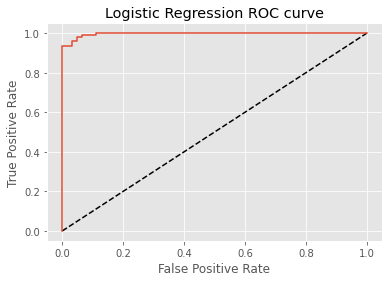

In [165]:
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC curve')
plt.show()

## Logistic Regression on `PIMA Indian diabetes` dataset

In [166]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

diabetes = pd.read_csv('/tmp/diabetes.csv')
diabetes.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [167]:
X = diabetes.drop('diabetes', axis=1)
y = diabetes['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    stratify=y)

log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

# Confusion matrix
print(confusion_matrix(y_true=y_test, y_pred=y_pred))

# Classification report
print(classification_report(y_true=y_test, y_pred=y_pred))

[[133  17]
 [ 37  44]]
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       150
           1       0.72      0.54      0.62        81

    accuracy                           0.77       231
   macro avg       0.75      0.71      0.73       231
weighted avg       0.76      0.77      0.76       231



/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Plotting the ROC curve

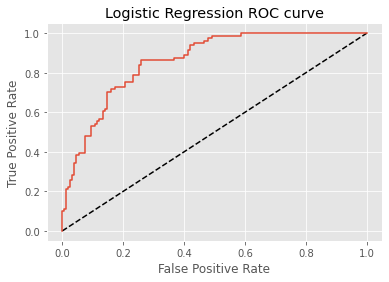

In [168]:
y_pred_proba = log_reg.predict_proba(X_test)[:, 1] # predict_proba returns two columns. We require the second column only

fpr, tpr, threshold = roc_curve(y_test, y_pred_proba)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC curve')
plt.show()

----

## Precision- Recall curve
When looking at your ROC curve, you may have noticed that the y-axis (True positive rate) is also known as recall. Indeed, in addition to the ROC curve, there are other ways to visually evaluate model performance. One such way is the precision-recall curve, which is generated by plotting the precision and recall for different thresholds. As a reminder, precision and recall are defined as:

$$Precision=\frac{TP}{TP+FP}$$

$$Recall=\frac{TP}{TP+FN}$$

### For Binary classifier

In [169]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

X, y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

In [170]:
clf = LinearSVC(random_state=42)

clf.fit(X_train, y_train)

y_score = clf.decision_function(X_test)
print(y_score)

[  1.14840858  -2.91584796  -0.16964623   2.29485313   2.20833958
  -1.77664568  -3.34449825   0.64515412   2.12951049   1.80753899
   1.66164376  -0.2255518    1.9808673    1.5713237    1.98263768
   1.12978525   2.20136971   2.09008775   1.43077075  -1.08209605
   1.18760106   1.65023714  -2.18412995   1.62599728   1.80782564
   2.55040922   2.17286192   1.80960453   1.96527208  -2.67170595
   1.90270438   2.02459139   1.35678283   1.4124217    1.87789686
   1.75150071  -0.11498207   1.61377056  -1.43304912   1.55214249
   1.85293485  -0.12052847   2.18731972   1.63496586   2.13987502
   1.4183053    1.80694183   1.35355394   1.42868796   2.11900893
  -1.0088412   -2.00270753   1.83659227   2.31772893   2.18660382
   1.56538148   1.92319442  -3.22899291   1.35810611   2.17031819
   1.78195008  -1.18278756  -2.39397901   1.81574005   1.8118319
   1.50937971  -0.74244341  -0.28983602   1.97045523   1.81397656
   0.63706903  -1.08428127   2.0584781    1.56120378   1.0849396
   2.1306489

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Compute the precision score

In [171]:
from sklearn.metrics import average_precision_score

average_precision = average_precision_score(y_true=y_test, y_score=y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.99


Plotting the Precision-Recall curve

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.99')

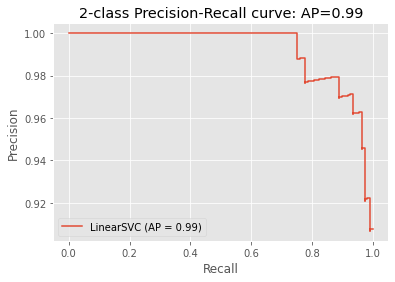

In [172]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(estimator=clf, X=X_test, y=y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

### For multiclass classifier

In [173]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
import numpy as np

X, y = load_iris(return_X_y=True)

In [174]:
# Use label_binarize to be multi-label like settings
y = label_binarize(y=y, classes=[0,1,2])

n_classes = y.shape[1]
n_classes

3

In [175]:
# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=42)

clf = OneVsRestClassifier(estimator=LinearSVC(random_state=42))

clf.fit(X_train, y_train)

# Computing y_score on test set
y_score = clf.decision_function(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Calculating Precision value for multi-class setting

In [176]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

# For each class
precision = dict()
recall = dict()
average_precision = dict()

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),
    y_score.ravel())
average_precision["micro"] = average_precision_score(y_test, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 0.96


Plot the micro-averaged Precision-Recall curve

Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.96')

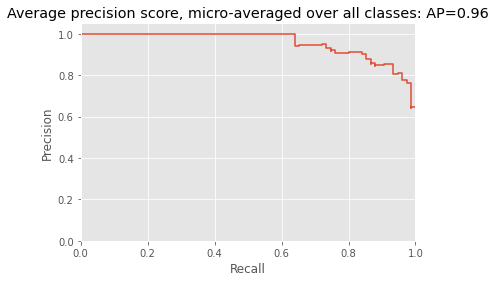

In [177]:
plt.step(recall['micro'], precision['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))

---

## Area under the ROC curve
[VIDEO](https://videos.datacamp.com/transcoded/1939_supervised_learning_w_scikit_learn/v9/hls-1939_ch3_3.master.m3u8)

**NOTE::** Larger the area under the ROC curve, better our model is!

In [178]:
from sklearn.metrics import roc_auc_score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X, y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

log_reg = LogisticRegression(random_state=42)

log_reg.fit(X_train, y_train)

# Predict probabilities on test set
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


COputing the AUC score

In [179]:
roc_auc_score(y_true=y_test, y_score=y_pred_proba)

0.9966196355085244

### AUC score using cross validation
- AUC score can also be computed using cross validation
- Ensure to set the `scoring` parameter to `roc_auc`

In [183]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(estimator=log_reg, X=X_train, y=y_train, cv=5, 
                            scoring='roc_auc')

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [181]:
print(cv_scores) # This prints the AUC scores

[0.984      0.97333333 0.998      0.99862069 0.96870748]


---

## AUC score computation on `PIMA Indians diabetes` dataset

In [188]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

diabetes = pd.read_csv('/tmp/diabetes.csv')
diabetes.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [193]:
X = diabetes.drop('diabetes', axis=1)
y = diabetes['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    stratify=y)

log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# Compute and print AUC score
#print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(log_reg, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))


AUC scores computed using 5-fold cross-validation: [0.80814815 0.80777778 0.82666667 0.87528302 0.83377358]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


---

## Hyperparameter Tuning
VIDEO

- We try a bunch of different values for the hyperparameters
- Fit all of them separately
- See how each one performs
- Choose the best performing one

**NOTE:** It is essential to use **cross validation** while performing hyperparameter tuning, else we risk overfitting the model

### Grid Search Cross Validation
- We choose a grid of possible values of hyperparameter that we wish to try out for our model


In [194]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X, y = load_digits(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    stratify=y)

# Parametyer grid for hyperparameter tunign using Grid Search
param_grid = {'n_neighbors': np.arange(1,50)}

knn = KNeighborsClassifier()

knn_cv = GridSearchCV(knn, param_grid, cv=5)

knn_cv.fit(X_train, y_train)

labels = knn_cv.predict(X_test)

print('Accuracy:', accuracy_score(y_test, labels))

Accuracy: 0.9916666666666667


Checking the best parameter values Grid Search came up with...

In [195]:
knn_cv.best_params_

{'n_neighbors': 3}

Best score obtained using the best parameters

In [196]:
knn_cv.best_score_

0.9874758033294618

## Grid Search on `PIMA Indians diabetes` dataset


In [197]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

diabetes = pd.read_csv('/tmp/diabetes.csv')
diabetes.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [199]:
X = diabetes.drop('diabetes', axis=1)
y = diabetes['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42)

logreg = LogisticRegression()

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X,y)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08])},
             pre_dispatch='2*n_jobs', refit=True, r

In [200]:
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.05179474679231213}
Best score is 0.7747644512350395


---

## Hyperparameter tuning using RandomizedSearchCV
`GridSearchCV` can be computationally expensive, especially if we are searching over a large hyperparameter space and dealing with multiple hyperparameters. A solution to this is to use `RandomizedSearchCV`, in which not all hyperparameter values are tried out. Instead, a fixed number of hyperparameter settings is sampled from specified probability distributions.

In [203]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import numpy as np

diabetes = pd.read_csv('/tmp/diabetes.csv')
diabetes.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [213]:
import random

random.randint(1,9)

2

In [214]:
X = diabetes.drop('diabetes', axis=1)
y = diabetes['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": range(1,10),
              "min_samples_leaf": range(1, 10),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'min_samples_leaf': 6, 'max_features': 5, 'max_depth': 3, 'criterion': 'entropy'}
Best score is 0.7396400984636278


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: max_features must be in (0, n_features]

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this t

## Hold-out set for final evaluation
VIDEO

- Using all data for cross validation is not ideal
- Split out the data into training and hold-out set in the beginning
- Perform cross validation on the training set
- Choose the best hyperparameters and evaluate on hold out set


In [217]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

diabetes = pd.read_csv('/tmp/diabetes.csv')
diabetes.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [219]:
X = diabetes.drop('diabetes', axis=1)
y = diabetes['diabetes']

# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=42)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the training data
logreg_cv.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_m

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-05, 8.48342898e-05, 7.19685673e-04, 6.10540230e-03,
       5.17947468e-02, 4.39397056e-01, 3.72759372e+00, 3.16227766e+01,
       2.68269580e+02, 2.27584593e+03, 1.93069773e+04, 1.63789371e+05,
       1.38949549e+06, 1.17876863e+07, 1.00000000e+08]),
                         'penalty': ['l1', 'l2']},
 

In [220]:
# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameter: {'C': 163789.3706954068, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.7782608695652173


---

## Hold-out set in practice II: Regression
**Lasso** used the L1 penalty to regularize, while **ridge** used the L2 penalty. There is another type of regularized regression known as the **elastic net**. In elastic net regularization, the penalty term is a linear combination of the L1 and L2 penalties:

$$a∗L1+b∗L2$$

In scikit-learn, this term is represented by the **`l1_ratio`** parameter: An `l1_ratio` of 1 corresponds to an L1 penalty, and anything lower is a combination of L1 and L2.

We will use GridSearchCV to tune the `l1_ratio` of an elastic net model trained on the Gapminder data.

In [221]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

gapminder = pd.read_csv('/tmp/gm_2008_region.csv')
gapminder.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [224]:
X = gapminder.drop(['Region', 'life'], axis=1)
y = gapminder['life']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=42)

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Regressor
elastic_net = ElasticNet()

# Setup the GridSearchCV object
elastic_net_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Fitting the data performing cross validation
elastic_net_cv.fit(X_train, y_train)

# Predict on the test set and compute metrics
y_pred = elastic_net_cv.predict(X_test)
r2 = elastic_net_cv.score(X_test, y_test)
mse = mean_squared_error(y_pred, y_test)
print("Tuned ElasticNet l1 ratio: {}".format(elastic_net_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 282.4862175850645, tolerance: 0.558941590909091
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 309.8466391486292, tolerance: 0.5893071666666668
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 255.5034400806133, tolerance: 0.5890250303030303
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 287.672841

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.20689655172413793}
Tuned ElasticNet R squared: 0.8668305372460283
Tuned ElasticNet MSE: 10.057914133398441


---
---

# Part 4: Preprocessing and Pipelines
[SLIDES](https://s3.amazonaws.com/assets.datacamp.com/production/course_1939/slides/chapter4.pdf)

## Preprocessing Data
VIDEO

### Dealing with categorical features
- One hot encoding
  - `OneHotEncoder()` in sklearn
  - `get_dummies()` in Pandas
- Label encoding


In [226]:
import pandas as pd

auto = pd.read_csv('/tmp/auto.csv')
auto.head()

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


**`origin`** is a categorical column and has to be preprocessed before it can be used by the Scikit-learn `.fit()` API

In [227]:
auto['origin'].value_counts()

US        245
Asia       79
Europe     68
Name: origin, dtype: int64

Using Pandas **`.get_dummies()`**

In [232]:
auto_origin = pd.get_dummies(auto)
auto_origin.head()

,mpg,displ,hp,weight,accel,size,origin_Asia,origin_Europe,origin_US
0,18.0,250.0,88,3139,14.5,15.0,0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,0,1
2,36.1,91.0,60,1800,16.4,10.0,1,0,0
3,18.5,250.0,98,3525,19.0,15.0,0,0,1
4,34.3,97.0,78,2188,15.8,10.0,0,1,0


**NOTE:** Now we have three columns for each of the feature values US, Europe and Asia. However, we know that if a car doesn't belong to Europe or US, then it has to belong to the Asia category. Hence, we don't need all the three columns- `origin_Asia`, `origin_Europe` and `origin_US`, as any two columns alone can convey the required information sufficiently. Hence, we'll drop the `.origin_Asia` column as having columns with redundant infomation may have detrimental effects on the model.

In [233]:
auto_origin = auto_origin.drop('origin_Asia', axis=1)

Fitting a regression model to the data

In [234]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [235]:
X = auto_origin.drop('mpg', axis=1)
y = auto_origin['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

ridge = Ridge(alpha=0.5, normalize=True)

ridge.fit(X_train, y_train)

ridge.score(X_test, y_test)

0.7190645190217895

## Exploring categorical features
The Gapminder dataset that we worked with in previous chapters also contained a categorical `Region` feature, which we dropped previously.

In [238]:
import pandas as pd
import matplotlib.pyplot as plt

gapminder = pd.read_csv('/tmp/gm_2008_region.csv')
gapminder.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


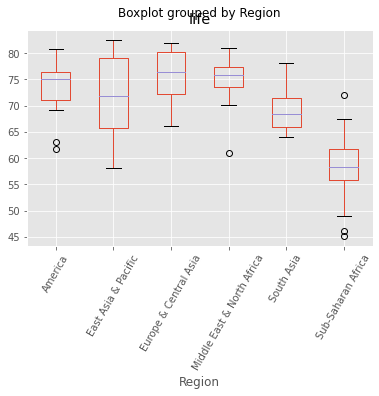

In [242]:
# Create a boxplot of life expectancy per region
gapminder.boxplot('life', 'Region', rot=60)
plt.show()

### Creating dummy variables
Scikit-learn does not accept non-numerical features. The `Region` feature contains very useful information that can predict life expectancy. For example, Sub-Saharan Africa has a lower life expectancy compared to Europe and Central Asia. Therefore, if we are trying to predict life expectancy, it would be preferable to retain the `Region` feature.

In [244]:
gapminder_region = pd.get_dummies(gapminder)

print(gapminder_region.columns)

# Create dummy variables with drop_first=True: df_region
gapminder_region = pd.get_dummies(gapminder, drop_first=True)

# Print the new columns of df_region
print(gapminder_region.columns)

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_America',
       'Region_East Asia & Pacific', 'Region_Europe & Central Asia',
       'Region_Middle East & North Africa', 'Region_South Asia',
       'Region_Sub-Saharan Africa'],
      dtype='object')
Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_East Asia & Pacific',
       'Region_Europe & Central Asia', 'Region_Middle East & North Africa',
       'Region_South Asia', 'Region_Sub-Saharan Africa'],
      dtype='object')


## Regression with categorical features
Having created the dummy variables from the `Region` feature, we can build regression models as we did before. Here, we'll use ridge regression to perform 5-fold cross-validation.

In [245]:
X = gapminder_region.drop('life', axis=1)
y = gapminder_region['life']

In [246]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [247]:
ridge = Ridge(alpha=0.5, normalize=True)

ridge_cv = cross_val_score(ridge, X, y, cv=5)
print(ridge_cv)

[0.86808336 0.80623545 0.84004203 0.7754344  0.87503712]


--- 

## Handling missing data
VIDEO

In [248]:
import pandas as pd
import numpy as np

diabetes = pd.read_csv('/tmp/diabetes.csv')
diabetes.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435 entries, 0 to 434
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   party              435 non-null    object
 1   infants            435 non-null    int64 
 2   water              435 non-null    int64 
 3   budget             435 non-null    int64 
 4   physician          435 non-null    int64 
 5   salvador           435 non-null    int64 
 6   religious          435 non-null    int64 
 7   satellite          435 non-null    int64 
 8   aid                435 non-null    int64 
 9   missile            435 non-null    int64 
 10  immigration        435 non-null    int64 
 11  synfuels           435 non-null    int64 
 12  education          435 non-null    int64 
 13  superfund          435 non-null    int64 
 14  crime              435 non-null    int64 
 15  duty_free_exports  435 non-null    int64 
 16  eaa_rsa            435 non-null    int64 
dt

From `diabetes.info()` it seems that there are no missing values. However, missing values can be encoded into a number of different formats. For example, `diabetes.head()` shows that `insulin`, and `triceps` have zeros, which is not possible.

So we replace these values with NaNs.


In [250]:
diabetes['insulin'].replace(0, np.nan, inplace=True)
diabetes['triceps'].replace(0, np.nan, inplace=True)
diabetes['bmi'].replace(0, np.nan, inplace=True)

diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      541 non-null    float64
 4   insulin      394 non-null    float64
 5   bmi          757 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 54.1 KB


### Handling missing data by dropping records that have missing feature values

In [251]:
df = diabetes.dropna()
df.shape

(393, 9)

Dropping NaNs, we see that we lose half of our dataset! This is unaccpetable.

### Impute missing data
- Make an educated guess about the missing values
- Example, using mean of non-missing entries

## Handling missing data in the `voting` dataset

In [255]:
import pandas as pd

votes = pd.read_csv('/tmp/house-votes-84.csv', names=['party','infants','water',
                                                      'budget','physician','salvador',
                                                      'religious','satellite','aid',
                                                      'missile','immigration',
                                                      'synfuels','education','superfund',
                                                      'crime','duty_free_exports','eaa_rsa'])
votes.head()

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [276]:
 # Convert '?' to NaN
votes[votes == '?'] = np.nan

# Print the number of NaNs
print(votes.isnull().sum())

# Print shape of original DataFrame
print("Shape of Original DataFrame: {}".format(votes.shape))

# Drop missing values and print shape of new DataFrame
votes = votes.dropna()

# Print shape of new DataFrame
print("Shape of DataFrame After Dropping All Rows with Missing Values: {}".format(votes.shape))

party                  0
infants               12
water                 48
budget                11
physician             11
salvador              15
religious             11
satellite             14
aid                   15
missile               22
immigration            7
synfuels              21
education             31
superfund             25
crime                 17
duty_free_exports     28
eaa_rsa              104
dtype: int64
Shape of Original DataFrame: (435, 17)
Shape of DataFrame After Dropping All Rows with Missing Values: (232, 17)


When many values in a dataset are missing, if we drop them, we may end up throwing away valuable information along with the missing data. It's better instead to develop an imputation strategy. This is where domain knowledge is useful, but in the absence of it, we can impute missing values with the mean or the median of the row or column that the missing value is in.

## Imputing missing data in a ML Pipeline
There are many steps to building a model, from creating training and test sets, to fitting a classifier or regressor, to tuning its parameters, to evaluating its performance on new data. Imputation can be seen as the first step of this machine learning process, the entirety of which can be viewed within the context of a pipeline. Scikit-learn provides a pipeline constructor that allows you to piece together these steps into one process and thereby simplify the workflow.

In [277]:
X = votes.drop('party', axis=1)
y = votes['party']

In [284]:
# Import the Imputer module
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# One hot encoder transformer
ohe = OneHotEncoder()

# Setup the Imputation transformer: imp
imp = SimpleImputer(missing_values='NaN', strategy='most_frequent')

# Instantiate the SVC classifier: clf
clf = SVC()

# Setup the pipeline with the required steps: steps
steps = [('one-hot', ohe), ('imputation', imp), ('SVM', clf)]

In [286]:
pipeline = Pipeline(steps)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=42)

# Fit the pipeline to the train set
pipeline.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = pipeline.predict(X_test)

# Classification report
print(classification_report(Y_test, y_pred))

ValueError: ignored

--- 

## Centering and scaling
VIDEO



In [294]:
import pandas as pd

wine = pd.read_csv('/tmp/winequality-red.csv', sep=';')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [295]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


- Many models use a distance metric
- Features on larger scales can unduly influence the model
- Eg. KNN uses distance explicitly while making predictions
- We want features on a similar scale
- We perform normalizing and scaling

## Standardization
- 0 mean and unit standard deviation
- Subtract mean and divide by standard deviation

## 
- All values between 0 and 1
- Subtract mean and divide by range


##
- Normalize such that values are between -1 and +1

In [296]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline

In [297]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [298]:
wine.loc[wine['quality'] < 5, 'quality'] = 0
wine.loc[wine['quality'] >= 5, 'quality'] = 1

In [300]:
wine['quality'].value_counts()

1    1536
0      63
Name: quality, dtype: int64

In [303]:
X = wine.drop('quality', axis=1).values
y = wine['quality']

In [304]:
# Import scale
from sklearn.preprocessing import scale

# Scale the features: X_scaled
X_scaled = scale(X)

# Print the mean and standard deviation of the unscaled features
print("Mean of Unscaled Features: {}".format(np.mean(X))) 
print("Standard Deviation of Unscaled Features: {}".format(np.std(X)))

# Print the mean and standard deviation of the scaled features
print("Mean of Scaled Features: {}".format(np.mean(X_scaled))) 
print("Standard Deviation of Scaled Features: {}".format(np.std(X_scaled)))

Mean of Unscaled Features: 8.134219224515322
Standard Deviation of Unscaled Features: 16.726533979432848
Mean of Scaled Features: 2.546626531486538e-15
Standard Deviation of Scaled Features: 1.0


## Centering and scaling in a pipeline

In [305]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
import pandas as pd

wine = pd.read_csv('/tmp/winequality-red.csv', sep=';')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [306]:
wine.loc[wine['quality'] < 5, 'quality'] = 0
wine.loc[wine['quality'] >= 5, 'quality'] = 1

X = wine.drop('quality', axis=1).values
y = wine['quality']

In [311]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

clf = KNeighborsClassifier(n_neighbors=5)

pipeline = Pipeline([('scaling', scaler), ('classfier', clf)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42)

knn_scaled = pipeline.fit(X_train, y_train)

knn_unscaled = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test, y_test)))

Accuracy with Scaling: 0.965625
Accuracy without Scaling: 0.965625


## Bringing it all together I: Pipeline for classification
It is time now to piece together everything we have learned so far into a pipeline for classification! We'll build a pipeline that includes scaling and hyperparameter tuning to classify wine quality.

We'll use the SVM classifier wherein hyperparameters we will tune are `C` and `gamma`. `C` controls the regularization strength. It is analogous to the `C` we tuned for logistic regression, while `gamma` controls the kernel coefficient.

In [313]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=21)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline, parameters)

# Fit to the training set
cv.fit(X_train,y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.946875
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       0.95      1.00      0.97       303

    accuracy                           0.95       320
   macro avg       0.47      0.50      0.49       320
weighted avg       0.90      0.95      0.92       320

Tuned Model Parameters: {'SVM__C': 1, 'SVM__gamma': 0.1}


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [315]:
# Setup the pipeline steps: steps
steps = [('imputation', SimpleImputer(missing_values='NaN', strategy='mean')),
         ('scaler', StandardScaler()),
         ('elasticnet', ElasticNet())]

# Create the pipeline: pipeline 
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'elasticnet__l1_ratio':np.linspace(0,1,30)}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=42)

# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline, parameters)

# Fit to the training set
gm_cv.fit(X_train, y_train)

# Compute and print the metrics
r2 = gm_cv.score(X_test, y_test)
print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: 'X' and 'missing_values' types are expected to be both numerical. Got X.dtype=float64 and  type(missing_values)=<class 'str'>.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: 'X' and 'missing_values' types are expected to be both numerical. Got X.dtype=float64 and  type(missing_values)=<class 'str'>.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: 'X' and 'missing_values' type

ValueError: ignored

---
---
---